# Analysing OSM history data for Kyiv before the bombing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sqlalchemy import create_engine, text

In [2]:
# creating connection to PostreSQL and querying database 
import psycopg2
 
# declare the connection string specifying the  hostname, database name, user name, and password
conn_string = "host='localhost' dbname='Ukraine'\
user='postgres' password='Open@close'"
 
# using the connection string to establish the connection
conn = psycopg2.connect(conn_string)

#creating engine 
engine = create_engine('postgresql+psycopg2://', creator=lambda: conn)

In [3]:
#querying postgres to fetch data of Kyiv for the 6 months before the bombing 
query1 = "SELECT * FROM merged1 WHERE timestamp <TO_DATE('2022-02-24','yyyy-mm-dd') AND timestamp >TO_DATE('2021-08-24','yyyy-mm-dd') AND latitude BETWEEN 49.1787440 AND 51.5531668 AND longitude BETWEEN 29.2675489 AND 32.1610264;"

In [4]:
#storing in a dataframe
kyiv_1= pd.read_sql(query1, con=engine)
kyiv_1.head()

id  changeset deleted                  timestamp      uid  \
0  9263937939  113944478   false  2021-11-18 13:16:06+00:00  8983588   
1   659807207  112962396   false  2021-10-25 19:51:34+01:00  5092132   
2   659807207  112962396   false  2021-10-25 19:51:34+01:00  5092132   
3  9423741819  116229717   false  2022-01-16 21:34:34+00:00  3249611   
4  9429079174  116310256   false  2022-01-18 18:04:39+00:00  5092132   

        user  version visibility    tp   extra   latitude  longitude  
0    shargat        1       true  node  301250  49.429365  32.096442  
1  Nikolaїch        2       true  node   35547  49.943586  30.101511  
2  Nikolaїch        2       true  node   35547  49.943734  30.100138  
3  Вальдимар        1       true  node   40371  49.233012  31.445749  
4  Nikolaїch        1       true  node  109186  49.343057  30.864712

In [5]:
#removing duplicate raws 
kyiv_1=kyiv_1.drop_duplicates(subset=['id', 'changeset'],keep='first',ignore_index=True)
kyiv_1.head()

id  changeset deleted                  timestamp       uid  \
0  9263937939  113944478   false  2021-11-18 13:16:06+00:00   8983588   
1   659807207  112962396   false  2021-10-25 19:51:34+01:00   5092132   
2  9423741819  116229717   false  2022-01-16 21:34:34+00:00   3249611   
3  9429079174  116310256   false  2022-01-18 18:04:39+00:00   5092132   
4  9430357683  116331371   false  2022-01-19 08:50:22+00:00  12100948   

              user  version visibility    tp   extra   latitude  longitude  
0          shargat        1       true  node  301250  49.429365  32.096442  
1        Nikolaїch        2       true  node   35547  49.943586  30.101511  
2        Вальдимар        1       true  node   40371  49.233012  31.445749  
3        Nikolaїch        1       true  node  109186  49.343057  30.864712  
4  kate_rocketdata        1       true  node  124761  50.400823  30.365103

In [6]:
#splitting date only from timestamp and adding to the daraframe
kyiv_1['date'] = kyiv_1.loc[:, 'timestamp'].astype(str).str.split().str[0]
kyiv_1.head()

id  changeset deleted                  timestamp       uid  \
0  9263937939  113944478   false  2021-11-18 13:16:06+00:00   8983588   
1   659807207  112962396   false  2021-10-25 19:51:34+01:00   5092132   
2  9423741819  116229717   false  2022-01-16 21:34:34+00:00   3249611   
3  9429079174  116310256   false  2022-01-18 18:04:39+00:00   5092132   
4  9430357683  116331371   false  2022-01-19 08:50:22+00:00  12100948   

              user  version visibility    tp   extra   latitude  longitude  \
0          shargat        1       true  node  301250  49.429365  32.096442   
1        Nikolaїch        2       true  node   35547  49.943586  30.101511   
2        Вальдимар        1       true  node   40371  49.233012  31.445749   
3        Nikolaїch        1       true  node  109186  49.343057  30.864712   
4  kate_rocketdata        1       true  node  124761  50.400823  30.365103   

         date  
0  2021-11-18  
1  2021-10-25  
2  2022-01-16  
3  2022-01-18  
4  2022-01-19

In [7]:
kyiv_1

id  changeset deleted                  timestamp       uid  \
0       9263937939  113944478   false  2021-11-18 13:16:06+00:00   8983588   
1        659807207  112962396   false  2021-10-25 19:51:34+01:00   5092132   
2       9423741819  116229717   false  2022-01-16 21:34:34+00:00   3249611   
3       9429079174  116310256   false  2022-01-18 18:04:39+00:00   5092132   
4       9430357683  116331371   false  2022-01-19 08:50:22+00:00  12100948   
...            ...        ...     ...                        ...       ...   
912244  9254418748  113821235   false  2021-11-15 20:04:07+00:00  14460668   
912245  9249725581  113753002   false  2021-11-14 07:20:51+00:00  11425841   
912246  9207260887  113072584   false  2021-10-28 10:10:04+01:00   8983588   
912247  3170258725  115137370   false  2021-12-19 19:31:31+00:00   5092132   
912248  9034891070  110229052   false  2021-08-25 13:10:51+01:00  11425841   

                      user  version visibility    tp   extra   latitude  \
0                  shargat        1       true  node  301250  49.429365   
1                Nikolaїch        2       true  node   35547  49.943586   
2                Вальдимар        1       true  node   40371  49.233012   
3                Nikolaїch        1       true  node  109186  49.343057   
4          kate_rocketdata        1       true  node  124761  50.400823   
...                    ...      ...        ...   ...     ...        ...   
912244         _old_usiko_        1       true  node  237003  50.374546   
912245  BikeForestExplorer        1       true  node  175125  49.450057   
912246             shargat        1       true  node      27  49.446657   
912247           Nikolaїch        2       true  node  293009  49.282898   
912248  BikeForestExplorer        1       true  node   74082  49.484998   

        longitude        date  
0       32.096442  2021-11-18  
1       30.101511  2021-10-25  
2       31.445749  2022-01-16  
3       30.864712  2022-01-18  
4       30.365103  2022-01-19  
...           ...         ...  
912244  30.323682  2021-11-15  
912245  32.061998  2021-11-14  
912246  32.076485  2021-10-28  
912247  30.932388  2021-12-19  
912248  31.976458  2021-08-25  

[912249 rows x 13 columns]

### *Assigning Human and Bot categories to changesets* 

In [8]:
#taking only useful columns
kyiv1=kyiv_1.drop(['latitude','longitude','extra'],axis=1)
kyiv1.head()

id  changeset deleted                  timestamp       uid  \
0  9263937939  113944478   false  2021-11-18 13:16:06+00:00   8983588   
1   659807207  112962396   false  2021-10-25 19:51:34+01:00   5092132   
2  9423741819  116229717   false  2022-01-16 21:34:34+00:00   3249611   
3  9429079174  116310256   false  2022-01-18 18:04:39+00:00   5092132   
4  9430357683  116331371   false  2022-01-19 08:50:22+00:00  12100948   

              user  version visibility    tp        date  
0          shargat        1       true  node  2021-11-18  
1        Nikolaїch        2       true  node  2021-10-25  
2        Вальдимар        1       true  node  2022-01-16  
3        Nikolaїch        1       true  node  2022-01-18  
4  kate_rocketdata        1       true  node  2022-01-19

In [9]:
#counting number of edits in each changeset and then assigning a category [humna/bot] based on the counts
#for this classification, it is assumed that a changeset having more than 1000 edits in one time is contributed by automated script

df1=kyiv1.drop(['deleted','timestamp','uid','user','version','visibility','tp'],axis=1)
df1=df1.groupby(['date','changeset']).count()
df1

id
date       changeset      
2021-08-24 110145562     7
           110145723     3
           110147159     5
           110148221   119
           110152702    30
...                    ...
2022-02-23 117782131     1
           117783983     1
           117784983     3
           117785571  1696
           117790349     1

[12300 rows x 1 columns]

In [10]:
df1['category']=df1['id'].apply(lambda x:'human' if x <1000 else 'bot')
df1

id category
date       changeset               
2021-08-24 110145562     7    human
           110145723     3    human
           110147159     5    human
           110148221   119    human
           110152702    30    human
...                    ...      ...
2022-02-23 117782131     1    human
           117783983     1    human
           117784983     3    human
           117785571  1696      bot
           117790349     1    human

[12300 rows x 2 columns]

In [11]:
#total changesets contribued by each -bot and human
df1.groupby(['category']).count()

id
category       
bot          80
human     12220

In [12]:
#adding category to the original dataframe 
kyiv1=kyiv1.merge(df1['category'], on='changeset', how='left')
kyiv1.head(7)

id  changeset deleted                  timestamp       uid  \
0  9263937939  113944478   false  2021-11-18 13:16:06+00:00   8983588   
1   659807207  112962396   false  2021-10-25 19:51:34+01:00   5092132   
2  9423741819  116229717   false  2022-01-16 21:34:34+00:00   3249611   
3  9429079174  116310256   false  2022-01-18 18:04:39+00:00   5092132   
4  9430357683  116331371   false  2022-01-19 08:50:22+00:00  12100948   
5  9430819656  116339209   false  2022-01-19 11:56:20+00:00   5092132   
6  9438469918  116453447   false  2022-01-22 02:42:13+00:00   1538111   

              user  version visibility    tp        date category  
0          shargat        1       true  node  2021-11-18    human  
1        Nikolaїch        2       true  node  2021-10-25    human  
2        Вальдимар        1       true  node  2022-01-16    human  
3        Nikolaїch        1       true  node  2022-01-18    human  
4  kate_rocketdata        1       true  node  2022-01-19    human  
5        Nikolaїch        1       true  node  2022-01-19    human  
6        avinet_ua        1       true  node  2022-01-22    human

In [13]:
kyiv1

id  changeset deleted                  timestamp       uid  \
0       9263937939  113944478   false  2021-11-18 13:16:06+00:00   8983588   
1        659807207  112962396   false  2021-10-25 19:51:34+01:00   5092132   
2       9423741819  116229717   false  2022-01-16 21:34:34+00:00   3249611   
3       9429079174  116310256   false  2022-01-18 18:04:39+00:00   5092132   
4       9430357683  116331371   false  2022-01-19 08:50:22+00:00  12100948   
...            ...        ...     ...                        ...       ...   
912249  9254418748  113821235   false  2021-11-15 20:04:07+00:00  14460668   
912250  9249725581  113753002   false  2021-11-14 07:20:51+00:00  11425841   
912251  9207260887  113072584   false  2021-10-28 10:10:04+01:00   8983588   
912252  3170258725  115137370   false  2021-12-19 19:31:31+00:00   5092132   
912253  9034891070  110229052   false  2021-08-25 13:10:51+01:00  11425841   

                      user  version visibility    tp        date category  
0                  shargat        1       true  node  2021-11-18    human  
1                Nikolaїch        2       true  node  2021-10-25    human  
2                Вальдимар        1       true  node  2022-01-16    human  
3                Nikolaїch        1       true  node  2022-01-18    human  
4          kate_rocketdata        1       true  node  2022-01-19    human  
...                    ...      ...        ...   ...         ...      ...  
912249         _old_usiko_        1       true  node  2021-11-15    human  
912250  BikeForestExplorer        1       true  node  2021-11-14    human  
912251             shargat        1       true  node  2021-10-28    human  
912252           Nikolaїch        2       true  node  2021-12-19    human  
912253  BikeForestExplorer        1       true  node  2021-08-25    human  

[912254 rows x 11 columns]

### *Comparing the contribution done by Humans and Bots*

In [14]:
# date-wise grouping based on categories
df2=kyiv1.groupby(['date','category']).count()
df2.head(10)

id  changeset  deleted  timestamp   uid  user  version  \
date       category                                                             
2021-08-24 human     2554       2554     2554       2554  2554  2554     2554   
2021-08-25 human     1214       1214     1214       1214  1214  1214     1214   
2021-08-26 human     1472       1472     1472       1472  1472  1472     1472   
2021-08-27 human     1222       1222     1222       1222  1222  1222     1222   
2021-08-28 human     3532       3532     3532       3532  3532  3532     3532   
2021-08-29 human     1831       1831     1831       1831  1831  1831     1831   
2021-08-30 human     3327       3327     3327       3327  3327  3327     3327   
2021-08-31 human      687        687      687        687   687   687      687   
2021-09-01 human     1573       1573     1573       1573  1573  1573     1573   
2021-09-02 human     1289       1289     1289       1289  1289  1289     1289   

                     visibility    tp  
date       category                    
2021-08-24 human           2554  2554  
2021-08-25 human           1214  1214  
2021-08-26 human           1472  1472  
2021-08-27 human           1222  1222  
2021-08-28 human           3532  3532  
2021-08-29 human           1831  1831  
2021-08-30 human           3327  3327  
2021-08-31 human            687   687  
2021-09-01 human           1573  1573  
2021-09-02 human           1289  1289

In [15]:
#creating two sepearte datafarmes each having daily total contribution by human and bot respectively for the 6 months 
df3=df2.xs('human', level='category')
df4=df2.xs('bot', level='category')

In [16]:
df3.head(3)

id  changeset  deleted  timestamp   uid  user  version  \
date                                                                   
2021-08-24  2554       2554     2554       2554  2554  2554     2554   
2021-08-25  1214       1214     1214       1214  1214  1214     1214   
2021-08-26  1472       1472     1472       1472  1472  1472     1472   

            visibility    tp  
date                          
2021-08-24        2554  2554  
2021-08-25        1214  1214  
2021-08-26        1472  1472

In [17]:
df4.head(3)

id  changeset  deleted  timestamp   uid  user  version  \
date                                                                   
2021-09-21  2153       2153     2153       2153  2153  2153     2153   
2021-09-22  7627       7627     7627       7627  7627  7627     7627   
2021-09-23  1058       1058     1058       1058  1058  1058     1058   

            visibility    tp  
date                          
2021-09-21        2153  2153  
2021-09-22        7627  7627  
2021-09-23        1058  1058

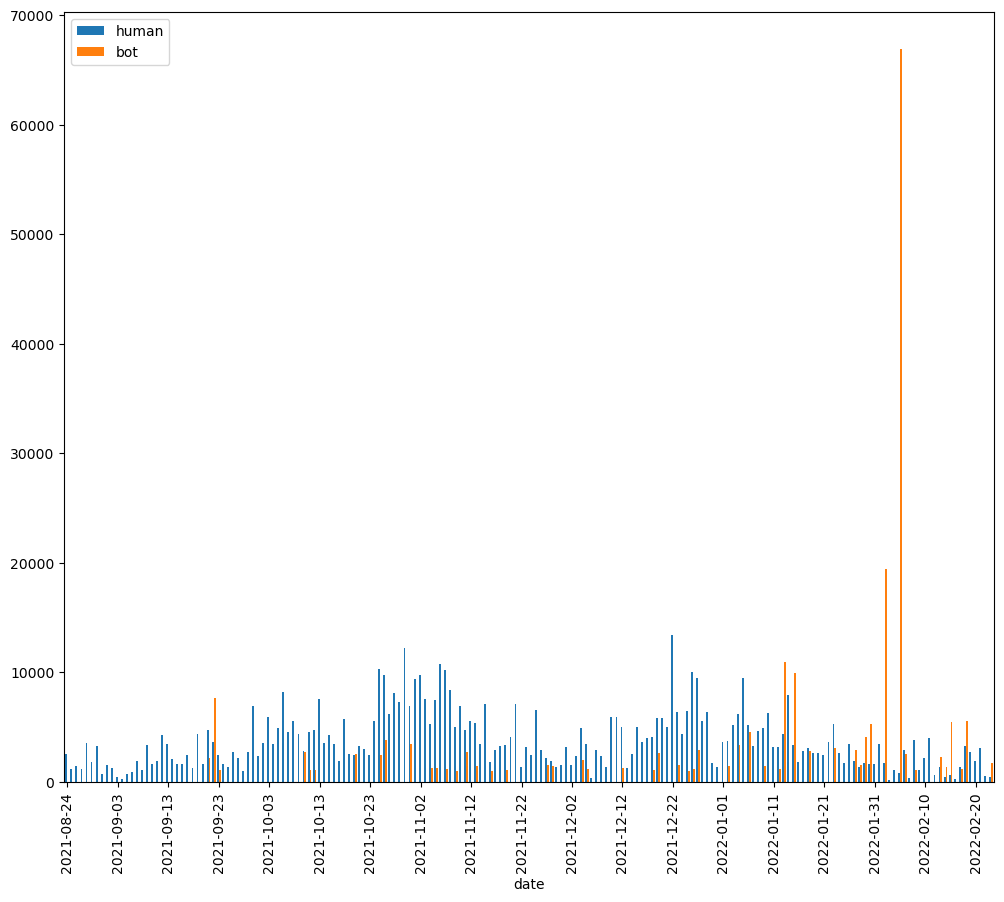

In [18]:
#plotting number of edits by both- human and bot category

x= df3.index
y=df3['changeset']
z=df4['changeset']

df5 = pd.DataFrame({
    'date': x,
    'human': y,
    'bot':z
})
df5 = df5.reset_index(drop=True)

step_size = 10 
ax = df5.plot(x="date", y=["human", "bot"],width=0.75, kind="bar", rot=90,figsize=(12, 10))
x_ticks = ax.get_xticks()
x_tick_labels = ax.get_xticklabels()

# to set x-axis labels based on the step size
ax.set_xticks(x_ticks[::step_size])
ax.set_xticklabels(x_tick_labels[::step_size])

plt.show()

### *Analysis of data for 1 week before the bombing*

In [19]:
#counting number of ediits per day for this week and plotting on bar graph
df6= kyiv1.loc[(kyiv1['date']>='2022-02-17') & (kyiv1['date']<'2022-02-26'),:]
df6=df6.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
df6=df6.groupby(['date']).count()
df6.head(3)

id
date            
2022-02-17  2588
2022-02-18  8846
2022-02-19  2716

In [20]:
#statistic measures of edits
df6.describe()

id
count     7.000000
mean   3113.428571
std    2652.755791
min     586.000000
25%    1994.000000
50%    2588.000000
75%    2893.000000
max    8846.000000

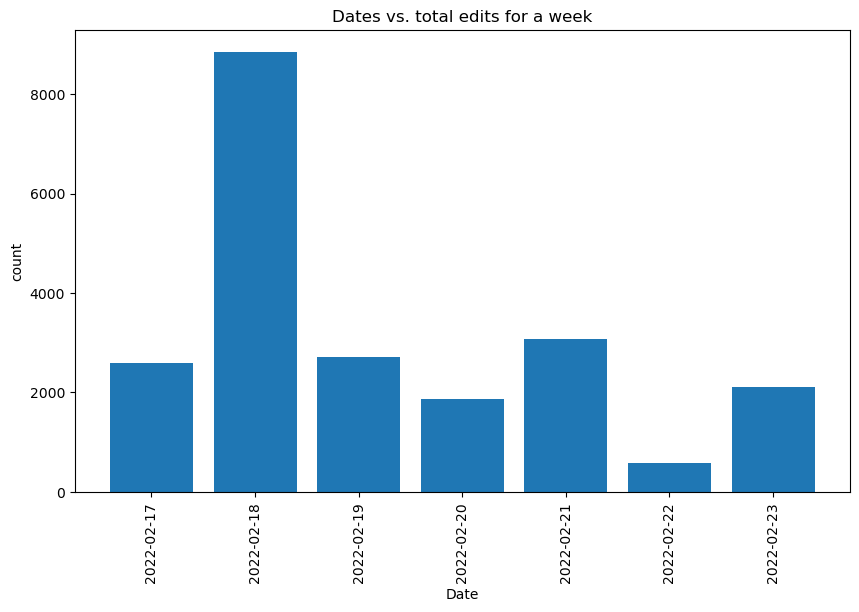

In [21]:
#using bar graph to plot the editing frequency

df6.index = pd.to_datetime(df6.index)
plt.figure(figsize=(10, 6))  
plt.bar(df6.index, df6['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for a week')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the month before the bombing*

In [22]:
#counting number of ediits per day for 1 month and plotting on bar graph
df7= kyiv1.loc[(kyiv1['date']>='2022-01-24') & (kyiv1['date']<'2022-02-24'),:]
df7=df7.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
df7=df7.groupby(['date']).count()
df7.head()

id
date            
2022-01-24  2661
2022-01-25  1742
2022-01-26  3460
2022-01-27  4867
2022-01-28  2889

In [23]:
df7.describe() #statistic measures of edits

id
count     31.000000
mean    5676.483871
std    12156.445725
min      139.000000
25%     1699.500000
50%     2716.000000
75%     4913.500000
max    67763.000000

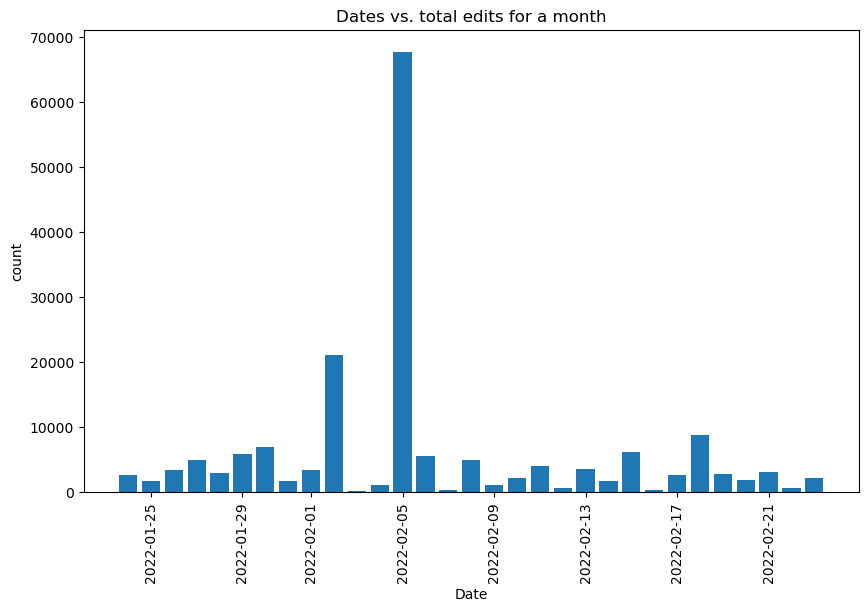

In [24]:
df7.index = pd.to_datetime(df7.index)
plt.figure(figsize=(10, 6))  
plt.bar(df7.index, df7['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for a month')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the 3 months before the bombing*

In [25]:
#counting number of ediits per day for the 3 months before bombing and plotting on bar graph
df8= kyiv1.loc[(kyiv1['date']>'2021-11-25') & (kyiv1['date']<'2022-02-24'),:]
df8=df8.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
df8=df8.groupby(['date']).count()
df8.head()

id
date            
2021-11-26  2932
2021-11-27  3728
2021-11-28  3366
2021-11-29  1388
2021-11-30  1594

In [26]:
df8.describe() #statistic measures of edits

id
count     90.000000
mean    5383.644444
std     7564.370208
min      139.000000
25%     2376.750000
50%     3649.000000
75%     6088.000000
max    67763.000000

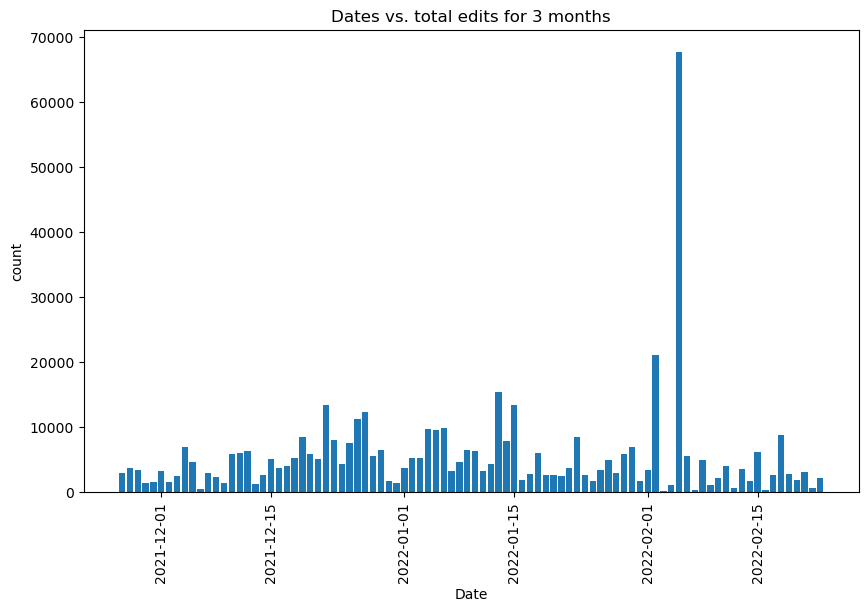

In [27]:
df8.index = pd.to_datetime(df8.index)
plt.figure(figsize=(10, 6))  
plt.bar(df8.index, df8['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for 3 months')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the 6 months before the bombing*

In [28]:
#counting number of ediits per day for the 6 months before bombing and plotting on bar graph

df9=kyiv1.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
df9=df9.groupby(['date']).count()
df9.describe()

id
count    184.000000
mean    4957.902174
std     5737.736775
min      139.000000
25%     2171.750000
50%     3593.000000
75%     6331.000000
max    67763.000000

In [29]:
#analysing frequency of edits for each month during these 6 months period
dfsep= kyiv1.loc[(kyiv1['date']>='2021-08-24') & (kyiv1['date']<'2021-09-24'),:]
dfsep=dfsep.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfsep=dfsep.groupby(['date']).count()
dfsep=dfsep.reset_index()

In [30]:
dfoct= kyiv1.loc[(kyiv1['date']>='2021-09-24') & (kyiv1['date']<'2021-10-24'),:]
dfoct=dfoct.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfoct=dfoct.groupby(['date']).count()
dfoct=dfoct.reset_index()

In [31]:
dfnov= kyiv1.loc[(kyiv1['date']>='2021-10-24') & (kyiv1['date']<'2021-11-24'),:]
dfnov=dfnov.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfnov=dfnov.groupby(['date']).count()
dfnov=dfnov.reset_index()

In [32]:
dfdec= kyiv1.loc[(kyiv1['date']>='2021-11-24') & (kyiv1['date']<'2021-12-24'),:]
dfdec=dfdec.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfdec=dfdec.groupby(['date']).count()
dfdec=dfdec.reset_index()

In [33]:
dfjan= kyiv1.loc[(kyiv1['date']>='2021-12-24') & (kyiv1['date']<'2022-01-24'),:]
dfjan=dfjan.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfjan=dfjan.groupby(['date']).count()
dfjan=dfjan.reset_index()


In [34]:
dffeb= kyiv1.loc[(kyiv1['date']>='2022-01-24') & (kyiv1['date']<'2022-02-24'),:]
dffeb=dffeb.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dffeb=dffeb.groupby(['date']).count()
dffeb=dffeb.reset_index()


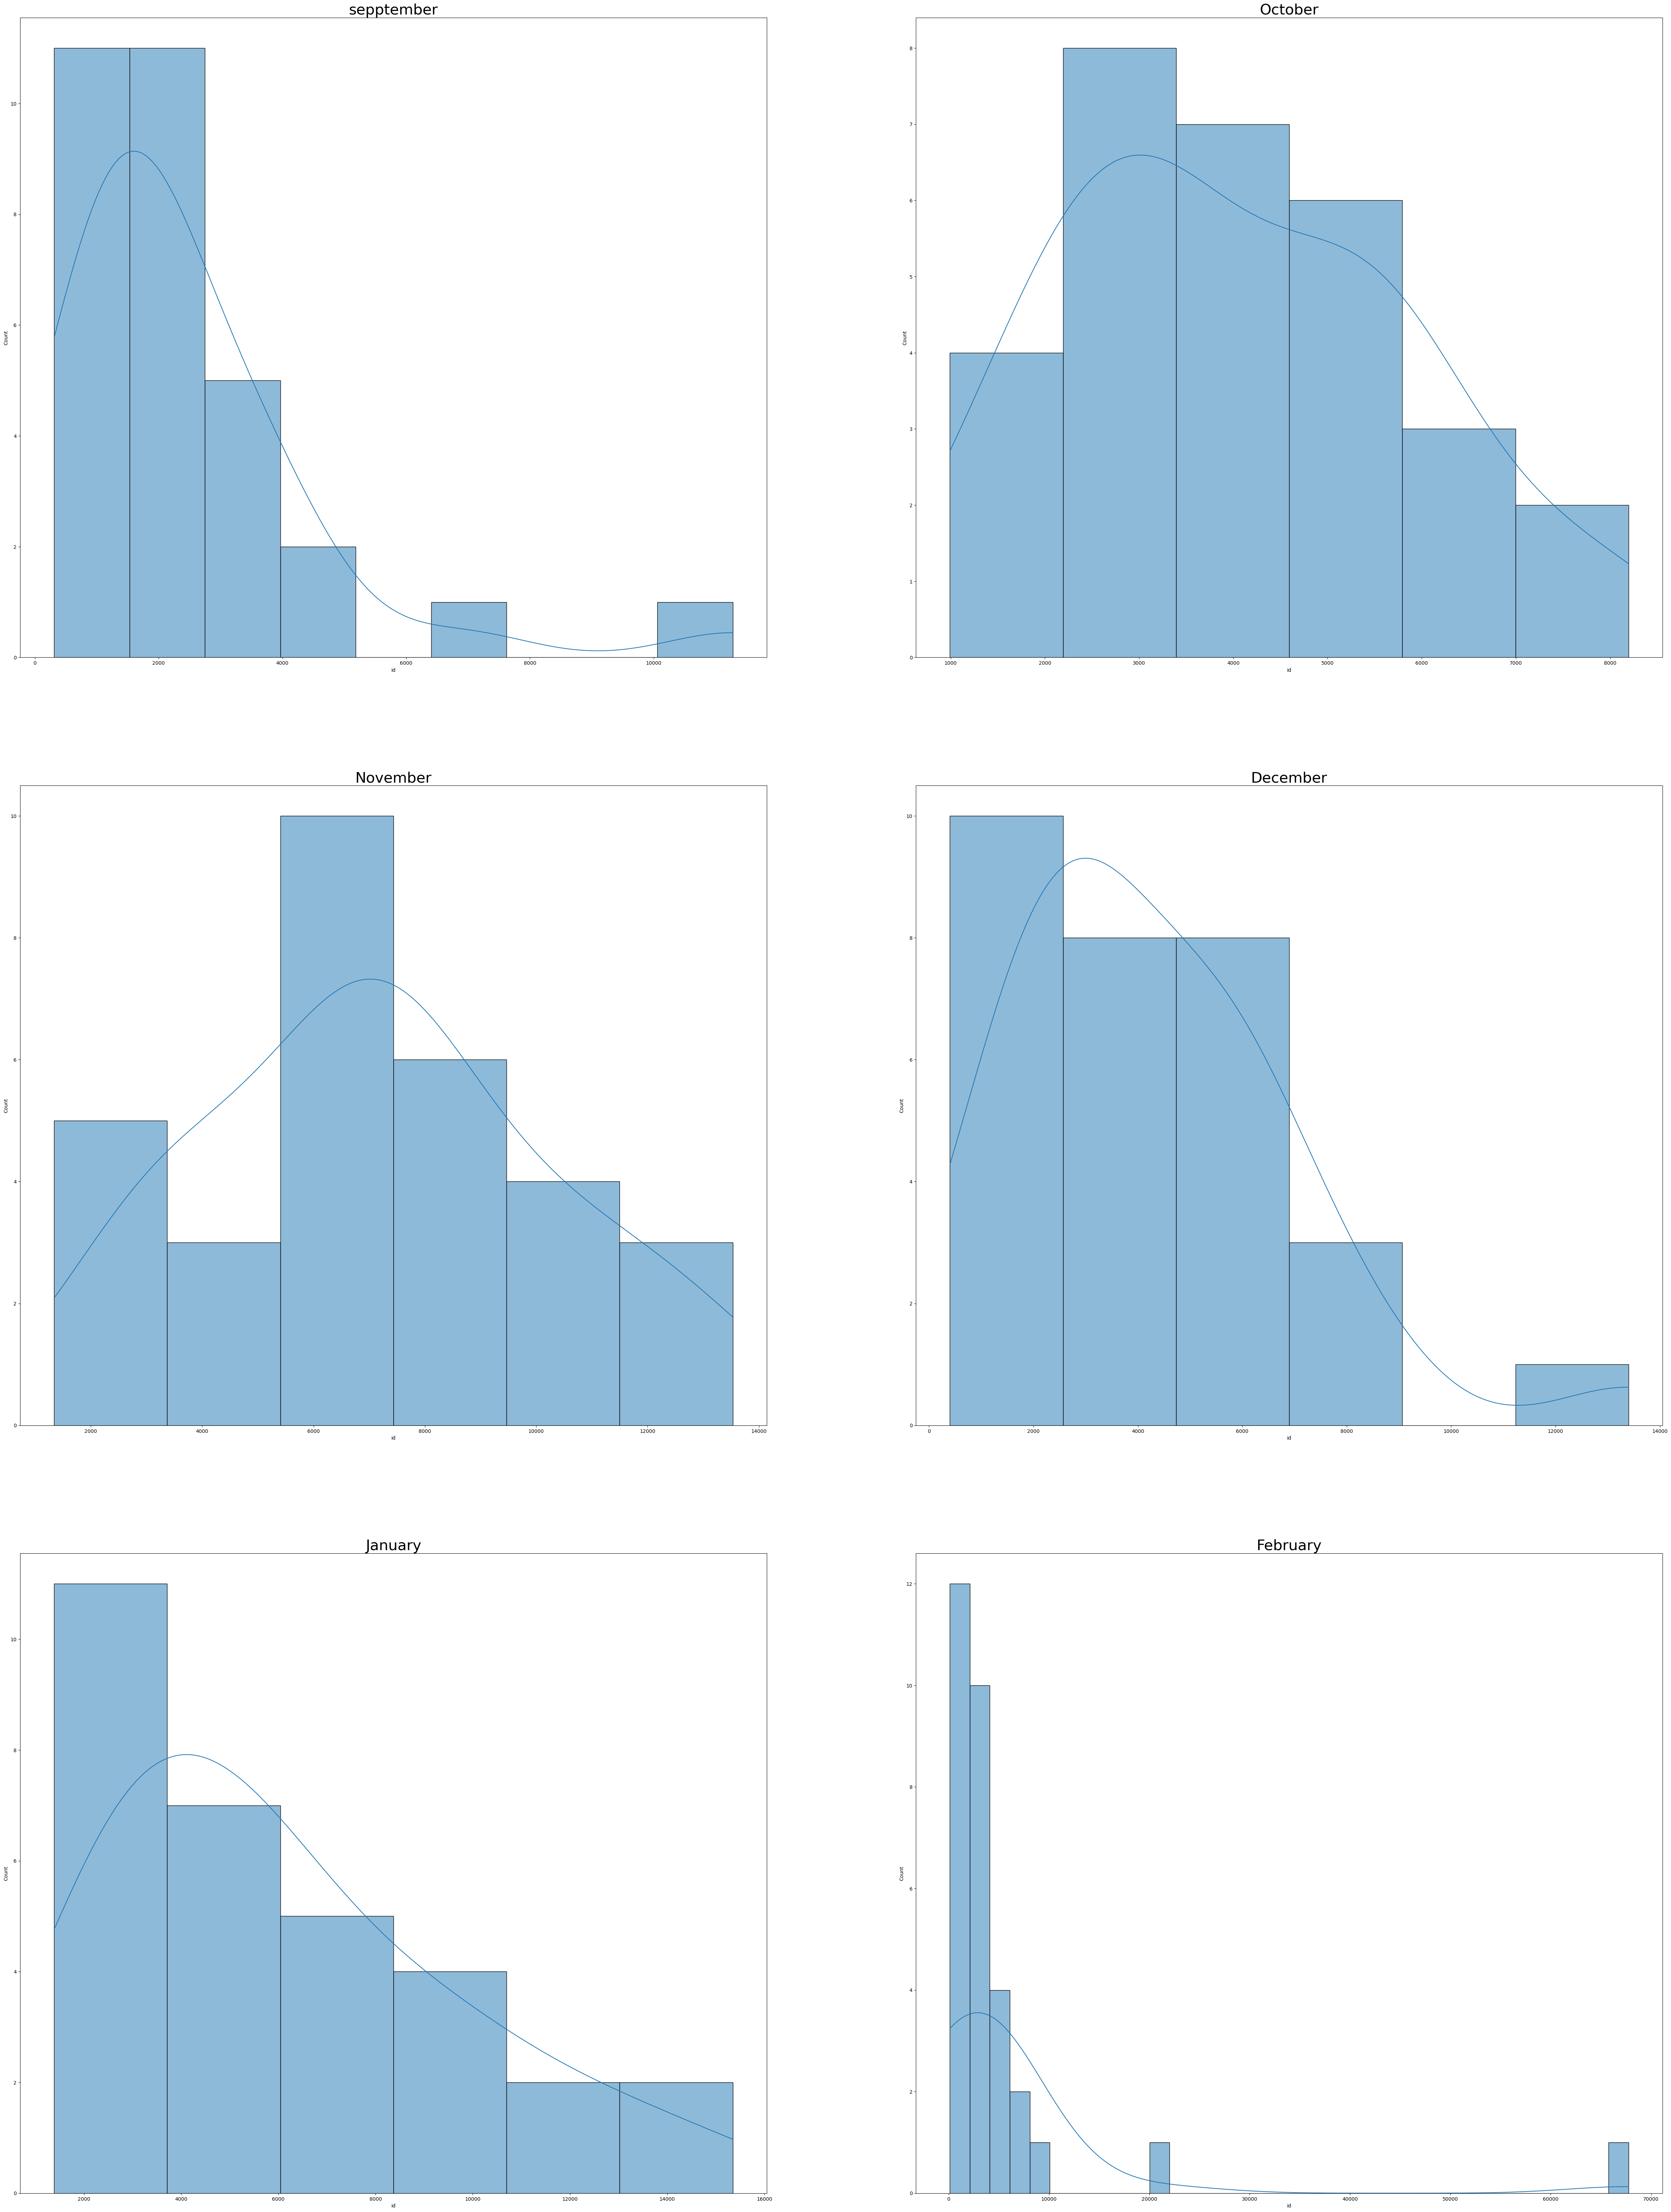

In [35]:
#histogram for frequency distributin 

fig,axes= plt.subplots(3,2,figsize=(60, 80))

axes = axes.flatten()

s=sb.histplot(data=dfsep, x='id',bins='auto',kde=True,ax=axes[0]).set_title('sepptember',fontsize = 30)
s=sb.histplot(data=dfoct, x='id',bins='auto',kde=True,ax=axes[1]).set_title('October',fontsize = 30)
s=sb.histplot(data=dfnov, x='id',bins='auto',kde=True,ax=axes[2]).set_title('November',fontsize = 30)
s=sb.histplot(data=dfdec, x='id',bins='auto',kde=True,ax=axes[3]).set_title('December',fontsize = 30)
s=sb.histplot(data=dfjan, x='id',bins='auto',kde=True,ax=axes[4]).set_title('January',fontsize = 30)
s=sb.histplot(data=dffeb, x='id',bins='auto',kde=True,ax=axes[5]).set_title('February',fontsize = 30)




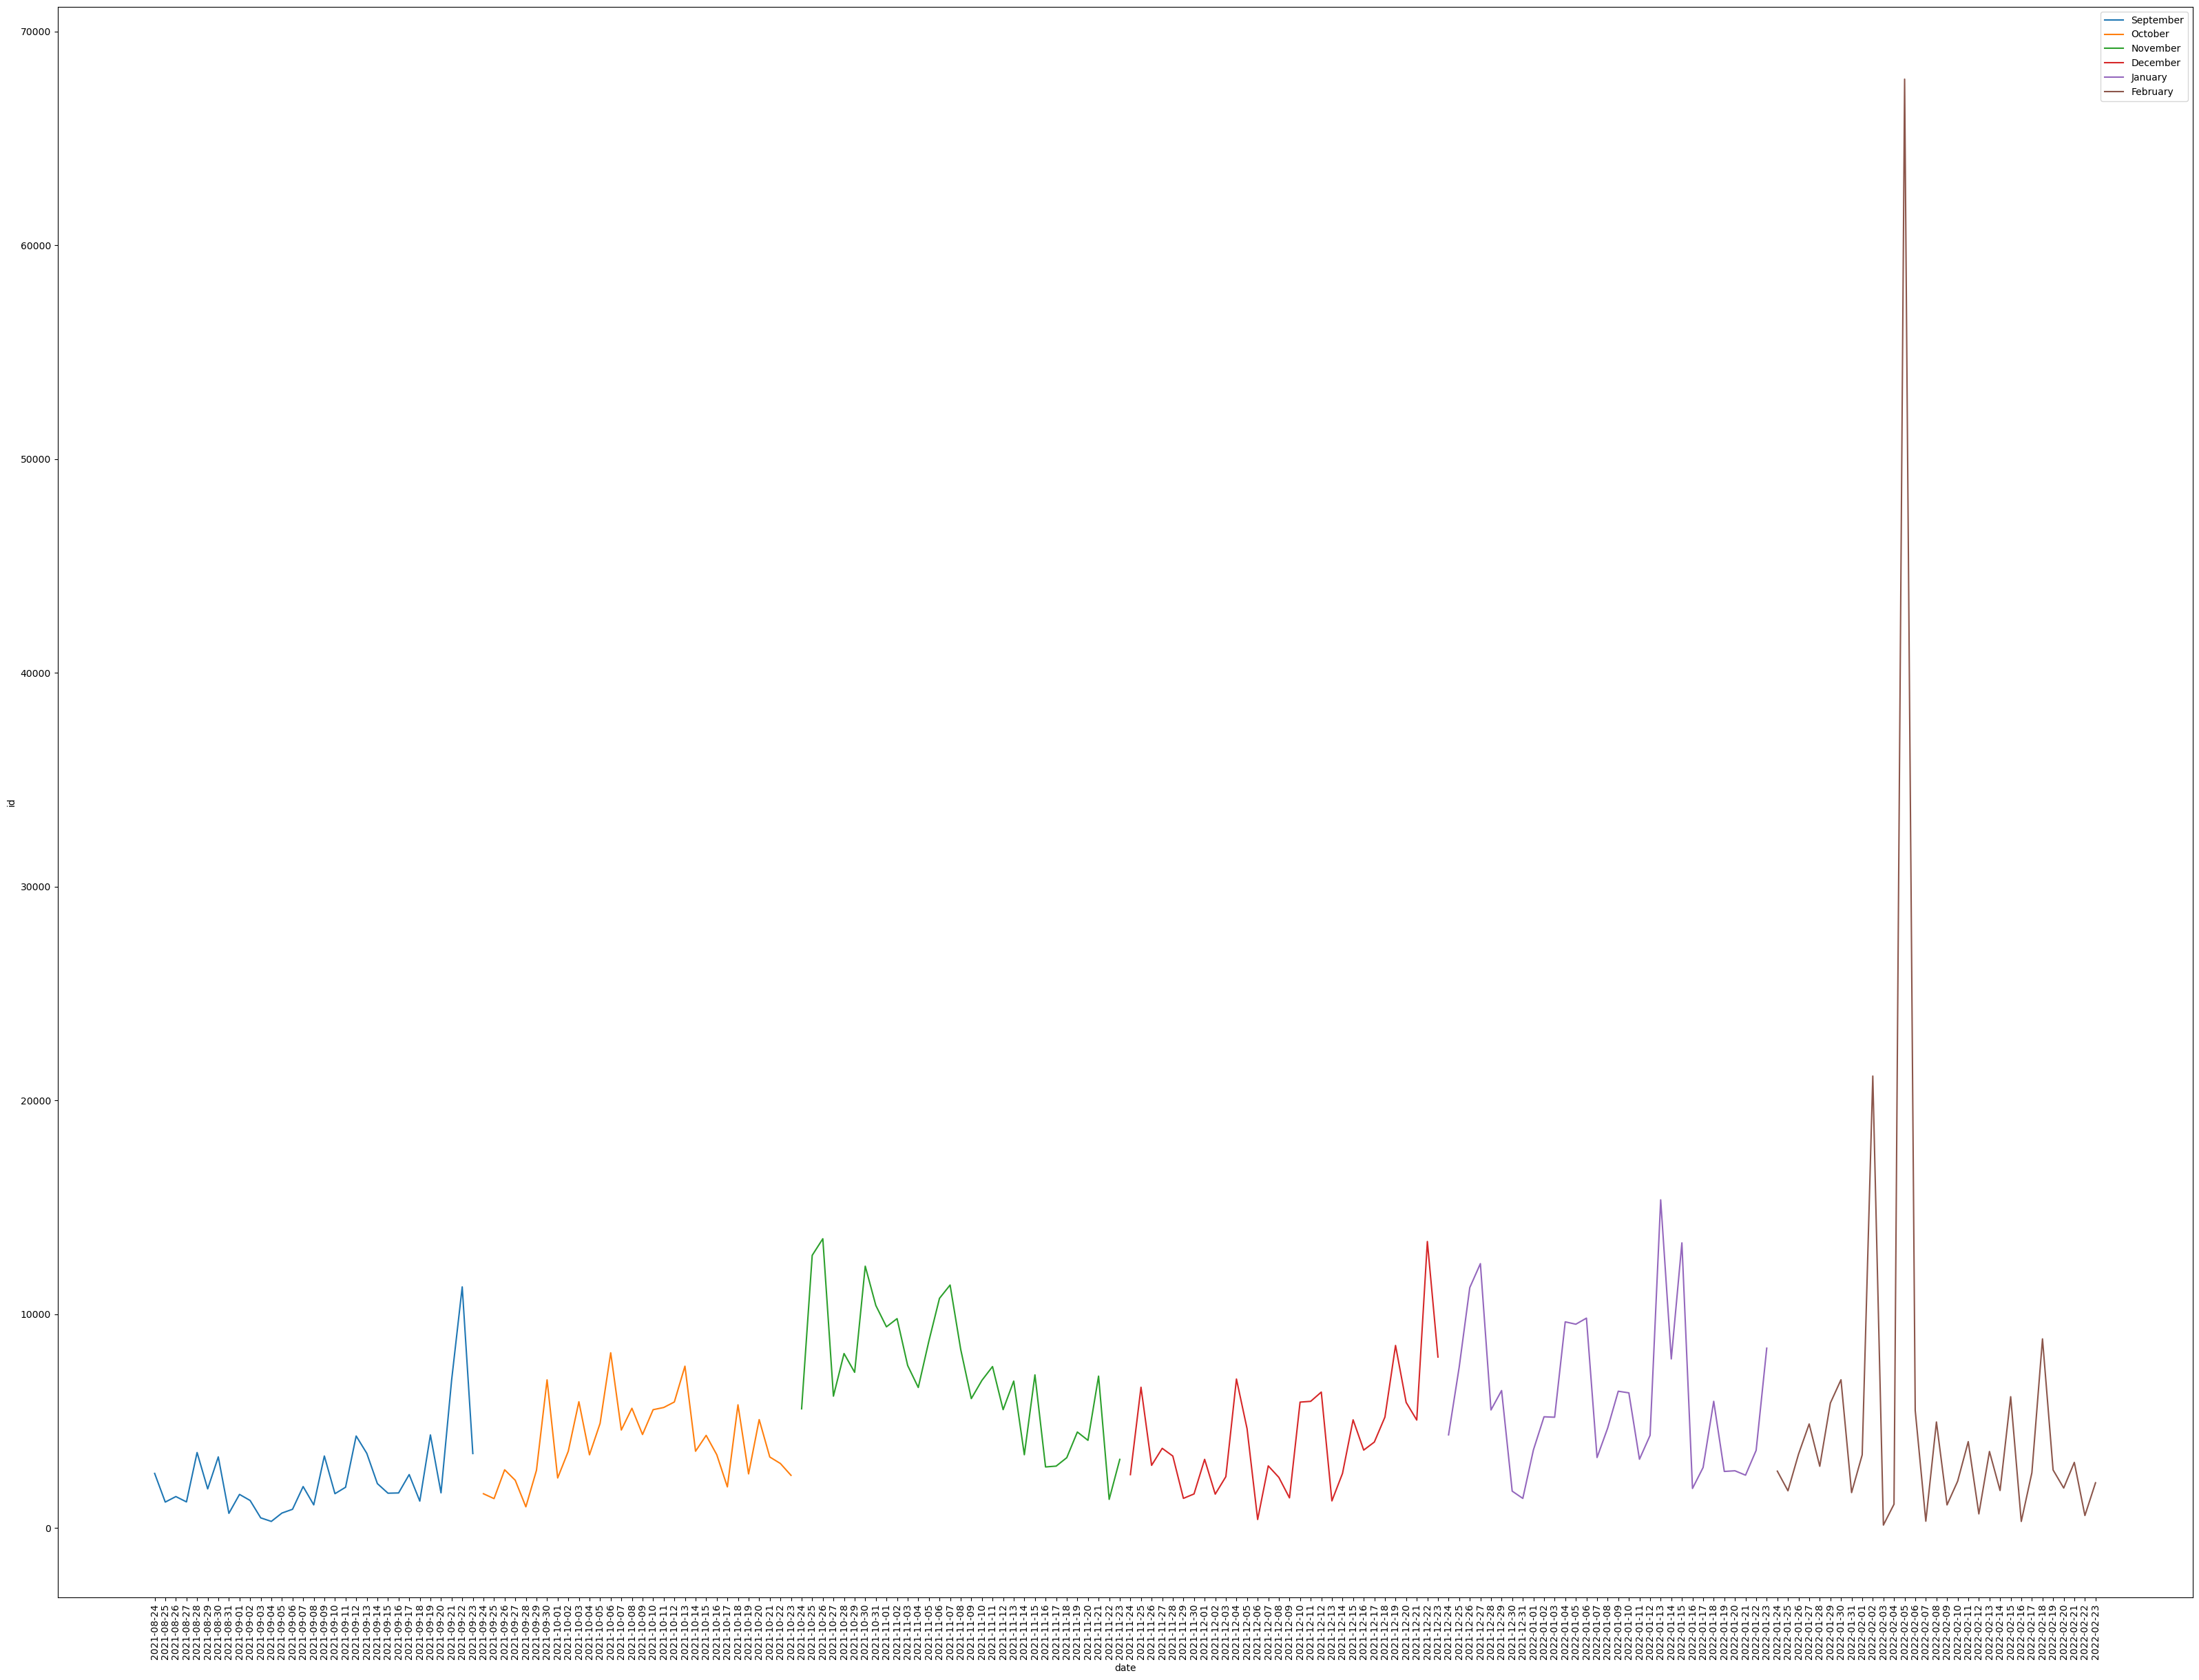

In [36]:
#trend chart to understand the editting pattern during 6 months befire bombing

fig = plt.subplots(figsize=(40, 30))
s=sb.lineplot(x='date', y='id', data=dfsep,label='September')
s=sb.lineplot(x='date', y='id', data=dfoct,label='October')
s=sb.lineplot(x='date', y='id', data=dfnov,label='November')
s=sb.lineplot(x='date', y='id', data=dfdec,label='December')
s=sb.lineplot(x='date', y='id', data=dfjan,label='January')
s=sb.lineplot(x='date', y='id', data=dffeb,label='February')
plt.xticks(rotation=90)

plt.show()

### *Analysing editing frequency at contributor level*

In [37]:
#working on number of changesets and number of edits by each user during the 6 months

#df10=kyiv1.drop(['deleted','timestamp','uid','version','visibility','tp','extra','date'], axis=1)
df10=kyiv1.loc[kyiv1['category']=='human']
df11=kyiv1.loc[kyiv1['category']=='bot']

df10=df10.drop(['deleted','timestamp','user','version','visibility','tp','date'], axis=1)
df11=df11.drop(['deleted','timestamp','user','version','visibility','tp','date'], axis=1)


In [38]:
#counting unique changesets added by each user during 6 months

df12=df10.groupby('uid')['changeset'].nunique()
df13=df11.groupby('uid')['changeset'].nunique()

In [39]:
#number of unique changesets posted by each contributors

changesets = df12.reset_index()
changesets

uid  changeset
0        5359          7
1       11238          1
2       13154          1
3       15110          1
4       15809          1
..        ...        ...
736  15044036          5
737  15094067          1
738  15140429          1
739  15148805          1
740  15155332          5

[741 rows x 2 columns]

In [40]:
#counting the changesets added bu software bots during the period
changesets_bot= df13.reset_index()
changesets_bot

uid  changeset
0     112151          1
1     345544          2
2    1232421          1
3    1538111          2
4    1872841          1
5    2021722          8
6    2471547          1
7    3244221          1
8    3249611          3
9    6334867          1
10   6546485         17
11   7272786          2
12   8372533         22
13   8983588          2
14  10791758          8
15  10857625          2
16  11163113          3
17  13938467          2
18  14460668          1

In [41]:
#the uid suggests that the automated scripts were added by the same users as those listed in 'human' category 
#further analysis wont consider categories seperately
changesets_bot['uid'].isin(changesets_bot['uid'])

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
Name: uid, dtype: bool

In [42]:
#grouping data on user and counting the total contribution made by each user during the whole period
df14=df10.drop(['changeset','category'],axis=1)
id_counts=df14.groupby(['uid']).count()

id_counts=id_counts.reset_index()
id_counts

uid   id
0        5359    9
1       11238  212
2       13154    1
3       15110    4
4       15809    1
..        ...  ...
736  15044036   17
737  15094067   11
738  15140429    4
739  15148805    6
740  15155332   25

[741 rows x 2 columns]

In [43]:
# Grouping users based on total contribution using the values of 25% and 75% values of quantiles 
# inactive mapper: less than 2000 edits 
# casual mapper: 2000 - 6000 edits
# committed mappers : more than 6000 edits [values based on the quartile values of 6 months months]

id_counts['contribution level']=id_counts['id'].apply(lambda x: 'inactive' if x < 2000 else ('casual mapper' if 2000 <= x < 6000 else 'committed'))

#id_counts.reset_index() 
id_counts.head()

uid   id contribution level
0   5359    9           inactive
1  11238  212           inactive
2  13154    1           inactive
3  15110    4           inactive
4  15809    1           inactive

In [44]:
#count of contributors in each category

contribution= id_counts.drop('id', axis=1)

contribution=contribution.groupby('contribution level').count()

print(contribution)

                    uid
contribution level     
casual mapper        32
committed            16
inactive            693


In [45]:
id_counts.head()

uid   id contribution level
0   5359    9           inactive
1  11238  212           inactive
2  13154    1           inactive
3  15110    4           inactive
4  15809    1           inactive

In [46]:
#adding contribution level to the dataframe 


temp=id_counts.drop('id',axis=1)
temp=temp.set_index('uid')


In [47]:

kyiv1=kyiv1.merge(temp['contribution level'], on='uid', how='left')
kyiv1

id  changeset deleted                  timestamp       uid  \
0       9263937939  113944478   false  2021-11-18 13:16:06+00:00   8983588   
1        659807207  112962396   false  2021-10-25 19:51:34+01:00   5092132   
2       9423741819  116229717   false  2022-01-16 21:34:34+00:00   3249611   
3       9429079174  116310256   false  2022-01-18 18:04:39+00:00   5092132   
4       9430357683  116331371   false  2022-01-19 08:50:22+00:00  12100948   
...            ...        ...     ...                        ...       ...   
912249  9254418748  113821235   false  2021-11-15 20:04:07+00:00  14460668   
912250  9249725581  113753002   false  2021-11-14 07:20:51+00:00  11425841   
912251  9207260887  113072584   false  2021-10-28 10:10:04+01:00   8983588   
912252  3170258725  115137370   false  2021-12-19 19:31:31+00:00   5092132   
912253  9034891070  110229052   false  2021-08-25 13:10:51+01:00  11425841   

                      user  version visibility    tp        date category  \
0                  shargat        1       true  node  2021-11-18    human   
1                Nikolaїch        2       true  node  2021-10-25    human   
2                Вальдимар        1       true  node  2022-01-16    human   
3                Nikolaїch        1       true  node  2022-01-18    human   
4          kate_rocketdata        1       true  node  2022-01-19    human   
...                    ...      ...        ...   ...         ...      ...   
912249         _old_usiko_        1       true  node  2021-11-15    human   
912250  BikeForestExplorer        1       true  node  2021-11-14    human   
912251             shargat        1       true  node  2021-10-28    human   
912252           Nikolaїch        2       true  node  2021-12-19    human   
912253  BikeForestExplorer        1       true  node  2021-08-25    human   

       contribution level  
0               committed  
1               committed  
2               committed  
3               committed  
4                inactive  
...                   ...  
912249      casual mapper  
912250          committed  
912251          committed  
912252          committed  
912253          committed  

[912254 rows x 12 columns]

In [48]:
#counting the number of deleted nodes for each user
df_deleted=kyiv1.loc[:,['uid','deleted']]
df_deleted
df_deleted=df_deleted.groupby(['uid','deleted'])['deleted'].count()
df_del=pd.DataFrame(df_deleted)
df_del= df_del.rename(columns={'deleted': 'deleted nodes'})
df_del=df_del.reset_index()
df_del=df_del.loc[df_del['deleted']=='true']


In [49]:
df_del=df_del.set_index('uid')
df_del

deleted  deleted nodes
uid                            
11238       true              8
44157       true              6
65284       true              3
79922       true              8
94578       true              8
...          ...            ...
14973074    true             54
14975485    true              4
14994480    true             30
15014555    true             29
15094067    true              5

[326 rows x 2 columns]

###  *Analysis of version history on contributor level*

In [50]:
#anaysing version history on contributor level
kyiv1=kyiv1.sort_values(['id', 'version'], ascending=[True,True])
kyiv1

id  changeset deleted                  timestamp      uid  \
247381    10980711  110187788   false  2021-08-24 19:02:59+01:00   195702   
804337    26051776  115533647   false  2021-12-29 18:51:10+00:00  1676637   
804462    26051776  115533649   false  2021-12-29 18:51:11+00:00  1676637   
423905    26069019  117573624   false  2022-02-18 16:51:29+00:00  7272786   
183569    26069039  113201543   false  2021-10-31 17:01:23+00:00  8372533   
...            ...        ...     ...                        ...      ...   
207271  9530802965  117785571   false  2022-02-23 20:02:46+00:00  6546485   
542426  9530802966  117785571   false  2022-02-23 20:02:46+00:00  6546485   
21314   9530802967  117785571   false  2022-02-23 20:02:46+00:00  6546485   
229912  9530802968  117785571   false  2022-02-23 20:02:46+00:00  6546485   
247527  9530802969  117785571   false  2022-02-23 20:02:46+00:00  6546485   

                  user  version visibility    tp        date category  \
247381    Sergіy Kozyr       10       true  node  2021-08-24    human   
804337        Kilkenni       17       true  node  2021-12-29    human   
804462        Kilkenni       18       true  node  2021-12-29    human   
423905        Viterall        5       true  node  2022-02-18      bot   
183569  Андрей Федяков        4       true  node  2021-10-31    human   
...                ...      ...        ...   ...         ...      ...   
207271      Ivan Gurov        1       true  node  2022-02-23      bot   
542426      Ivan Gurov        1       true  node  2022-02-23      bot   
21314       Ivan Gurov        1       true  node  2022-02-23      bot   
229912      Ivan Gurov        1       true  node  2022-02-23      bot   
247527      Ivan Gurov        1       true  node  2022-02-23      bot   

       contribution level  
247381           inactive  
804337      casual mapper  
804462      casual mapper  
423905          committed  
183569          committed  
...                   ...  
207271      casual mapper  
542426      casual mapper  
21314       casual mapper  
229912      casual mapper  
247527      casual mapper  

[912254 rows x 12 columns]

In [51]:
#Extract the list of editing version for each of the contributors 

version=kyiv1.groupby('uid')['version'].apply(list)
version_list=pd.DataFrame(version)
version_list.head()

version
uid                                                     
5359                         [6, 6, 9, 5, 9, 2, 2, 2, 2]
11238  [6, 6, 3, 4, 5, 4, 3, 4, 5, 4, 4, 2, 2, 2, 2, ...
13154                                                [6]
15110                                       [2, 2, 2, 2]
15809                                                [8]

In [52]:
# This will count the number of new nodes vs number of edits 
#version=1 is considered new node, rest of the versions as edited nodes

# Function to count the frequency of new nodes(version=1) in a list
def count_ones(lst):
    return lst.count(1)

# Function to count the frequency of edited nodes in a list
def edits(lst):
    count=0
    for i in lst:
        if i != 1:
            count=count+1
    return count

# Apply the functions to the 'version' column
version_list['new nodes'] = version_list['version'].apply(count_ones)
version_list['edited nodes'] = version_list['version'].apply(edits)                                                    
version_list.head(16)
        

version  new nodes  \
uid                                                                   
5359                         [6, 6, 9, 5, 9, 2, 2, 2, 2]          0   
11238  [6, 6, 3, 4, 5, 4, 3, 4, 5, 4, 4, 2, 2, 2, 2, ...        180   
13154                                                [6]          0   
15110                                       [2, 2, 2, 2]          0   
15809                                                [8]          0   
18069                                       [6, 9, 1, 1]          2   
20517                                          [1, 1, 1]          3   
32741  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...         17   
38930  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...         24   
44157  [6, 6, 4, 4, 5, 5, 4, 5, 4, 2, 5, 5, 2, 2, 2, ...          4   
45270  [9, 8, 5, 5, 9, 5, 6, 3, 5, 4, 2, 2, 2, 2, 2, ...         38   
52797                                 [7, 8, 3, 3, 3, 3]          0   
65284  [3, 2, 4, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...         90   
69607                                                [2]          0   
71862                                             [6, 4]          0   
78656                                       [2, 2, 2, 2]          0   

       edited nodes  
uid                  
5359              9  
11238            32  
13154             1  
15110             4  
15809             1  
18069             2  
20517             0  
32741             0  
38930             0  
44157            23  
45270            38  
52797             6  
65284             6  
69607             1  
71862             2  
78656             4

###  *Calculating the total active days for each user*

In [53]:
df_lifespan= kyiv1.loc[:,['uid','date']]
df_lifespan['date'] = df_lifespan.date.astype('datetime64[ns]')

In [54]:
df_lifespan=df_lifespan.sort_values(['uid','date'],ascending=[True,True])#sorting the database to get the first day of contribution

In [55]:
# grouping on uid and then for each user, retrieving the first and last day of contribution time perdiod
df_lifespan=df_lifespan.groupby('uid')
first_row= df_lifespan.min()
last_row=df_lifespan.max()
#print('first_row')
timeframe1=pd.DataFrame(first_row).reset_index()
timeframe2=pd.DataFrame(last_row).reset_index()

In [56]:
# first day when the conributor made an activty
timeframe1.head(10)

uid       date
0   5359 2021-10-30
1  11238 2021-09-08
2  13154 2021-12-18
3  15110 2022-02-13
4  15809 2021-09-05
5  18069 2021-10-06
6  20517 2021-10-06
7  32741 2022-01-03
8  38930 2021-11-17
9  44157 2021-12-21

In [57]:
timeframe2.head(10) # last day when the conributor made an activty

uid       date
0   5359 2022-02-19
1  11238 2021-09-08
2  13154 2021-12-18
3  15110 2022-02-13
4  15809 2021-09-05
5  18069 2021-10-06
6  20517 2021-10-31
7  32741 2022-01-03
8  38930 2021-11-17
9  44157 2021-12-22

In [58]:
#calculating the difference between two dats

result=(timeframe2['date']-timeframe1['date'])
day=pd.to_timedelta(1, unit='d')
timeframe1['active days']=result+day
timeframe1=timeframe1.drop(['date'],axis=1)
timeframe1.head(6)

uid active days
0   5359    113 days
1  11238      1 days
2  13154      1 days
3  15110      1 days
4  15809      1 days
5  18069      1 days

## *Importing and analysing tag data for the 6 months period*

In [59]:
#to fetch the tags data for all the nodes fetched in previous query for 6 months

query2 = "SELECT * FROM node_tags WHERE id IN (SELECT id FROM user_info WHERE id IN (SELECT id FROM node_locations WHERE latitude BETWEEN 49.1787440 AND 51.5531668 AND longitude BETWEEN 29.2675489 AND 32.1610264) AND timestamp <TO_DATE('2022-02-24','yyyy-mm-dd') AND timestamp >TO_DATE('2021-08-24','yyyy-mm-dd'));"

In [60]:
kyiv2 = pd.read_sql(query2, con=engine)

In [61]:
pd.set_option('max_colwidth', None)
kyiv2

id tags
0          26260140   {}
1          26260140   {}
2          26260140   {}
3          26260140   {}
4          26260140   {}
...             ...  ...
1385023  6454739226   {}
1385024  6454739226   {}
1385025  6457400291   {}
1385026  6457400291   {}
1385027  6457400291   {}

[1385028 rows x 2 columns]

In [62]:
#count of empty tags

df15=kyiv2[kyiv2['tags']=='{}'].count()
df15

id      1251291
tags    1251291
dtype: int64

In [63]:
#only taking the records having non-null values in tags

df15=kyiv2[kyiv2['tags']!='{}']

df15

id  \
5          26260140   
6          26260140   
7          26260140   
16         26273082   
17         26273082   
...             ...   
1384992  6437780507   
1384993  6437780507   
1384994  6437780507   
1384995  6437780513   
1384996  6437780513   

                                                                                                              tags  
5                                             {'crossing': 'zebra', 'highway': 'crossing', 'tactile_paving': 'no'}  
6                                             {'crossing': 'zebra', 'highway': 'crossing', 'tactile_paving': 'no'}  
7        {'check_date:crossing': '2021-11-03', 'crossing': 'zebra', 'highway': 'crossing', 'tactile_paving': 'no'}  
16                                                                                  {'highway': 'traffic_signals'}  
17                                                                                  {'highway': 'traffic_signals'}  
...                                                                                                            ...  
1384992                                                     {'amenity': 'bench', 'material': 'wood', 'seats': '2'}  
1384993                                  {'amenity': 'bench', 'backrest': 'yes', 'material': 'wood', 'seats': '2'}  
1384994                                  {'amenity': 'bench', 'backrest': 'yes', 'material': 'wood', 'seats': '2'}  
1384995                                  {'amenity': 'bench', 'backrest': 'yes', 'material': 'wood', 'seats': '2'}  
1384996                                  {'amenity': 'bench', 'backrest': 'yes', 'material': 'wood', 'seats': '2'}  

[133737 rows x 2 columns]

In [64]:
# append the tags column to previous dataframe having user details 
pd.set_option('max_colwidth', 30)
df16=df15.merge(kyiv1, on='id', how='left')
df16

id                           tags  changeset deleted  \
0         26260140  {'crossing': 'zebra', 'hig...  113305176   false   
1         26260140  {'crossing': 'zebra', 'hig...  113305176   false   
2         26260140  {'check_date:crossing': '2...  113305176   false   
3         26273082  {'highway': 'traffic_signa...  113272606   false   
4         26273082  {'highway': 'traffic_signa...  113272606   false   
...            ...                            ...        ...     ...   
184003  6437780507  {'amenity': 'bench', 'mate...  114337760   false   
184004  6437780507  {'amenity': 'bench', 'back...  114337760   false   
184005  6437780507  {'amenity': 'bench', 'back...  114337760   false   
184006  6437780513  {'amenity': 'bench', 'back...  114337760   false   
184007  6437780513  {'amenity': 'bench', 'back...  114337760   false   

                        timestamp       uid         user  version visibility  \
0       2021-11-02 22:51:34+00:00  12104017   student_ua        8       true   
1       2021-11-02 22:51:34+00:00  12104017   student_ua        8       true   
2       2021-11-02 22:51:34+00:00  12104017   student_ua        8       true   
3       2021-11-02 09:04:56+00:00  10857625  muchichka_s       16       true   
4       2021-11-02 09:04:56+00:00  10857625  muchichka_s       16       true   
...                           ...       ...          ...      ...        ...   
184003  2021-11-28 21:18:03+00:00   2021722     darkonus        3       true   
184004  2021-11-28 21:18:03+00:00   2021722     darkonus        3       true   
184005  2021-11-28 21:18:03+00:00   2021722     darkonus        3       true   
184006  2021-11-28 21:18:03+00:00   2021722     darkonus        2       true   
184007  2021-11-28 21:18:03+00:00   2021722     darkonus        2       true   

          tp        date category contribution level  
0       node  2021-11-02    human           inactive  
1       node  2021-11-02    human           inactive  
2       node  2021-11-02    human           inactive  
3       node  2021-11-02    human      casual mapper  
4       node  2021-11-02    human      casual mapper  
...      ...         ...      ...                ...  
184003  node  2021-11-28      bot          committed  
184004  node  2021-11-28      bot          committed  
184005  node  2021-11-28      bot          committed  
184006  node  2021-11-28      bot          committed  
184007  node  2021-11-28      bot          committed  

[184008 rows x 13 columns]

In [65]:
# convrting tags from dictionary format into table format where each column is a unique key and stores its value

from ast import literal_eval
df16['tags'] = df16['tags'].apply(literal_eval)
extracted_data=[]

for index, row in df16.iterrows():
    tag_dict = row['tags']
    extracted_row = {"id": row['id']}  # Add the 'id' column
    extracted_row.update(tag_dict)  # Add the rest of the dictionary data
    extracted_data.append(extracted_row)


# Create a new DataFrame from the extracted data
pd.set_option('display.max_columns', None)

webhook_data = {'created_by': 'JOSM'}

def parse_webhook(webhook_data):
    data = ast.literal_eval(str(webhook_data))
    return data
df17 = pd.DataFrame(extracted_data)


In [66]:
id_to_value1 = df16.set_index('id')['uid'].to_dict()
df17['uid'] = df17['id'].map(id_to_value1) #adding uid column to the dataframe
df17.head()

id crossing          highway tactile_paving check_date:crossing  \
0  26260140    zebra         crossing             no                 NaN   
1  26260140    zebra         crossing             no                 NaN   
2  26260140    zebra         crossing             no          2021-11-03   
3  26273082      NaN  traffic_signals            NaN                 NaN   
4  26273082      NaN  traffic_signals            NaN                 NaN   

  traffic_signals:direction created_by name  bus public_transport place is_in  \
0                       NaN        NaN  NaN  NaN              NaN   NaN   NaN   
1                       NaN        NaN  NaN  NaN              NaN   NaN   NaN   
2                       NaN        NaN  NaN  NaN              NaN   NaN   NaN   
3                       NaN        NaN  NaN  NaN              NaN   NaN   NaN   
4                       NaN        NaN  NaN  NaN              NaN   NaN   NaN   

  is_in:country is_in:country_code is_in:province is_in:state name:en name:ru  \
0           NaN                NaN            NaN         NaN     NaN     NaN   
1           NaN                NaN            NaN         NaN     NaN     NaN   
2           NaN                NaN            NaN         NaN     NaN     NaN   
3           NaN                NaN            NaN         NaN     NaN     NaN   
4           NaN                NaN            NaN         NaN     NaN     NaN   

  population name:sr addr:postcode koatuu name:uk wikipedia wikipedia:ru  \
0        NaN     NaN           NaN    NaN     NaN       NaN          NaN   
1        NaN     NaN           NaN    NaN     NaN       NaN          NaN   
2        NaN     NaN           NaN    NaN     NaN       NaN          NaN   
3        NaN     NaN           NaN    NaN     NaN       NaN          NaN   
4        NaN     NaN           NaN    NaN     NaN       NaN          NaN   

  name:cs name:de name:pl name:ro name:fr name:lt name:prefix is_in:district  \
0     NaN     NaN     NaN     NaN     NaN     NaN         NaN            NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN         NaN            NaN   
2     NaN     NaN     NaN     NaN     NaN     NaN         NaN            NaN   
3     NaN     NaN     NaN     NaN     NaN     NaN         NaN            NaN   
4     NaN     NaN     NaN     NaN     NaN     NaN         NaN            NaN   

  name:hu name:be name:eo wikidata name:et name:nl name:ko katotth  \
0     NaN     NaN     NaN      NaN     NaN     NaN     NaN     NaN   
1     NaN     NaN     NaN      NaN     NaN     NaN     NaN     NaN   
2     NaN     NaN     NaN      NaN     NaN     NaN     NaN     NaN   
3     NaN     NaN     NaN      NaN     NaN     NaN     NaN     NaN   
4     NaN     NaN     NaN      NaN     NaN     NaN     NaN     NaN   

  postal_code name:ckb name:ml name:he name:hr alt_name:cs name:it name:es  \
0         NaN      NaN     NaN     NaN     NaN         NaN     NaN     NaN   
1         NaN      NaN     NaN     NaN     NaN         NaN     NaN     NaN   
2         NaN      NaN     NaN     NaN     NaN         NaN     NaN     NaN   
3         NaN      NaN     NaN     NaN     NaN         NaN     NaN     NaN   
4         NaN      NaN     NaN     NaN     NaN         NaN     NaN     NaN   

  railway crossing_ref button_operated traffic_signals:sound crossing:island  \
0     NaN          NaN             NaN                   NaN             NaN   
1     NaN          NaN             NaN                   NaN             NaN   
2     NaN          NaN             NaN                   NaN             NaN   
3     NaN          NaN             NaN                   NaN             NaN   
4     NaN          NaN             NaN                   NaN             NaN   

  amenity operator cash_in wheelchair brand brand:en brand:ru brand:uk  \
0     NaN      NaN     NaN        NaN   NaN      NaN      NaN      NaN   
1     NaN      NaN     NaN        NaN   NaN      NaN      NaN      NaN   
2     NaN      NaN     NaN        NaN   NaN    

In [67]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184008 entries, 0 to 184007
Columns: 1125 entries, id to uid
dtypes: int64(2), object(1123)
memory usage: 1.5+ GB


In [68]:
#counting total counts of each tags

non_null_counts = df17.count()
counts=pd.DataFrame(non_null_counts)
counts= counts.reset_index()
counts.columns = ["tags", "total counts"]
counts=counts.sort_values(['total counts'], ascending=False)
counts.head(7)

tags  total counts
0          id        184008
1124      uid        184008
7        name         89715
2     highway         55947
22    name:uk         48279
17    name:ru         46476
54    amenity         44946

In [69]:
#selecting the value of tags for further analysis, only tags having more than 5000 entries are considered

df18= counts.loc[counts['total counts']>5000]
df18

tags  total counts
0                     id        184008
1124                 uid        184008
7                   name         89715
2                highway         55947
22               name:uk         48279
17               name:ru         46476
54               amenity         44946
16               name:en         42556
80         opening_hours         30717
55              operator         25056
10                 place         24817
23             wikipedia         20768
18            population         19748
21                koatuu         19552
20         addr:postcode         16931
58                 brand         16383
92                   ref         16251
31           name:prefix         15830
62        brand:wikidata         15543
63       brand:wikipedia         14952
24          wikipedia:ru         14089
99           addr:street         13477
81                 phone         13354
189                power         13349
76                  shop         13048
1               crossing         12745
59              brand:en         12743
36              wikidata         11878
98      addr:housenumber         11848
9       public_transport         11595
93           description         11344
85       contact:website         11200
61              brand:uk          9863
73               website          9411
230               source          8936
86      contact:facebook          8002
57            wheelchair          7996
87     contact:instagram          7899
71     operator:wikidata          7639
97           operator:uk          7403
72    operator:wikipedia          7314
88               shelter          6774
256          source:pkey          6756
70           operator:ru          6666
108              barrier          6528
95       contact:youtube          6341
41           postal_code          6208
84         contact:phone          5843
94       contact:twitter          5567
69           operator:en          5474
89                 bench          5470
83         contact:email          5378
8                    bus          5166
91              entrance          5008

<Axes: xlabel='total counts', ylabel='Count'>

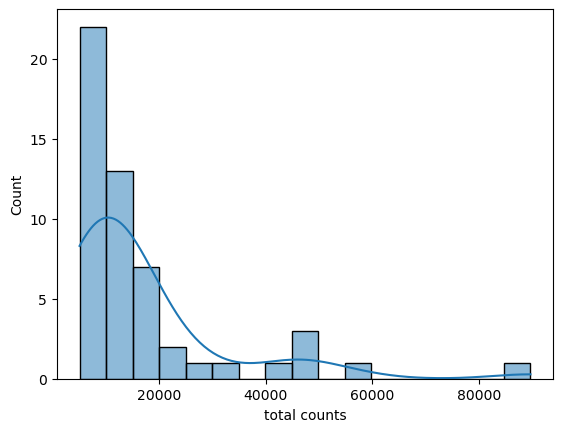

In [70]:
#frequency distribution of tag counts

df_plot=df18.loc[(df18['tags']!='id') & (df18['tags']!='uid'),:]
sb.histplot(data=df_plot, x='total counts',bins='auto',kde=True)

In [71]:
#list of tags for further analysis

column_keep=df18["tags"].tolist()
column_keep


['id',
 'uid',
 'name',
 'highway',
 'name:uk',
 'name:ru',
 'amenity',
 'name:en',
 'opening_hours',
 'operator',
 'place',
 'wikipedia',
 'population',
 'koatuu',
 'addr:postcode',
 'brand',
 'ref',
 'name:prefix',
 'brand:wikidata',
 'brand:wikipedia',
 'wikipedia:ru',
 'addr:street',
 'phone',
 'power',
 'shop',
 'crossing',
 'brand:en',
 'wikidata',
 'addr:housenumber',
 'public_transport',
 'description',
 'contact:website',
 'brand:uk',
 'website',
 'source',
 'contact:facebook',
 'wheelchair',
 'contact:instagram',
 'operator:wikidata',
 'operator:uk',
 'operator:wikipedia',
 'shelter',
 'source:pkey',
 'operator:ru',
 'barrier',
 'contact:youtube',
 'postal_code',
 'contact:phone',
 'contact:twitter',
 'operator:en',
 'bench',
 'contact:email',
 'bus',
 'entrance']

In [72]:
df19=df17.loc[:,column_keep]
df19.head()

id       uid name          highway name:uk name:ru amenity name:en  \
0  26260140  12104017  NaN         crossing     NaN     NaN     NaN     NaN   
1  26260140  12104017  NaN         crossing     NaN     NaN     NaN     NaN   
2  26260140  12104017  NaN         crossing     NaN     NaN     NaN     NaN   
3  26273082  10857625  NaN  traffic_signals     NaN     NaN     NaN     NaN   
4  26273082  10857625  NaN  traffic_signals     NaN     NaN     NaN     NaN   

  opening_hours operator place wikipedia population koatuu addr:postcode  \
0           NaN      NaN   NaN       NaN        NaN    NaN           NaN   
1           NaN      NaN   NaN       NaN        NaN    NaN           NaN   
2           NaN      NaN   NaN       NaN        NaN    NaN           NaN   
3           NaN      NaN   NaN       NaN        NaN    NaN           NaN   
4           NaN      NaN   NaN       NaN        NaN    NaN           NaN   

  brand  ref name:prefix brand:wikidata brand:wikipedia wikipedia:ru  \
0   NaN  NaN         NaN            NaN             NaN          NaN   
1   NaN  NaN         NaN            NaN             NaN          NaN   
2   NaN  NaN         NaN            NaN             NaN          NaN   
3   NaN  NaN         NaN            NaN             NaN          NaN   
4   NaN  NaN         NaN            NaN             NaN          NaN   

  addr:street phone power shop crossing brand:en wikidata addr:housenumber  \
0         NaN   NaN   NaN  NaN    zebra      NaN      NaN              NaN   
1         NaN   NaN   NaN  NaN    zebra      NaN      NaN              NaN   
2         NaN   NaN   NaN  NaN    zebra      NaN      NaN              NaN   
3         NaN   NaN   NaN  NaN      NaN      NaN      NaN              NaN   
4         NaN   NaN   NaN  NaN      NaN      NaN      NaN              NaN   

  public_transport description contact:website brand:uk website source  \
0              NaN         NaN             NaN      NaN     NaN    NaN   
1              NaN         NaN             NaN      NaN     NaN    NaN   
2              NaN         NaN             NaN      NaN     NaN    NaN   
3              NaN         NaN             NaN      NaN     NaN    NaN   
4              NaN         NaN             NaN      NaN     NaN    NaN   

  contact:facebook wheelchair contact:instagram operator:wikidata operator:uk  \
0              NaN        NaN               NaN               NaN         NaN   
1              NaN        NaN               NaN               NaN         NaN   
2              NaN        NaN               NaN               NaN         NaN   
3              NaN        NaN               NaN               NaN         NaN   
4              NaN        NaN               NaN               NaN         NaN   

  operator:wikipedia shelter source:pkey operator:ru barrier contact:youtube  \
0                NaN     NaN         NaN         NaN     NaN             NaN   
1                NaN     NaN         NaN         NaN     NaN             NaN   
2                NaN     NaN         NaN         NaN     NaN             NaN   
3                NaN     NaN         NaN         NaN     NaN             NaN   
4                NaN     NaN         NaN         NaN     NaN             NaN   

  postal_code contact:phone contact:twitter operator:en bench contact:email  \
0         NaN           NaN             NaN         NaN   NaN           NaN   
1         NaN           NaN             NaN         NaN   NaN           NaN   
2         NaN           NaN             NaN         NaN   NaN           NaN   
3         NaN           NaN             NaN         NaN   NaN           NaN   
4         NaN           NaN             NaN         NaN   NaN           NaN   

   bus entrance  
0  NaN      NaN  
1  NaN      NaN  
2  NaN      NaN  
3  NaN      NaN  
4  NaN      NaN

In [73]:
#calculating the frequency of unique values under each tags column

remove=['id','uid']

result_dict1 = {}
for column_name in df19.columns:
    if column_name not in remove:
        unique_value_counts = df19[column_name].value_counts()
        result_dict1[column_name] = unique_value_counts

sorted(result_dict1.items())

[('addr:housenumber',
  1         358
  2         281
  4         265
  3         230
  10        224
           ... 
  525/1       1
  102є        1
  5/7         1
  10 В        1
  1а, к5      1
  Name: addr:housenumber, Length: 1261, dtype: int64),
 ('addr:postcode',
  08600            298
  11600            262
  01000-06999      238
  03150            220
  07800            168
                  ... 
  1001               1
  02096              1
  09000 - 09003      1
  08299              1
  09248              1
  Name: addr:postcode, Length: 1520, dtype: int64),
 ('addr:street',
  Київська вулиця                258
  Антоновича вулиця              236
  Перемоги проспект              212
  Соборна вулиця                 181
  Велика Васильківська вулиця    180
                                ... 
  Bozhenko str                     1
  Мінське шосе                     1
  Гризодубової провулок            1
  пр-т. Соборності                 1
  Миколи Амосова                   1

In [74]:
#displayong the list of unique tags stored by each contributor 

uid_column_name = 'uid'
grouped = df19.groupby(uid_column_name)

# Initialize an empty dictionary to store the results
result_dict2 = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in df19.columns:
    if column_name != uid_column_name:
        # Apply the unique() function to the current column within each group
        unique_values = grouped[column_name].unique().apply(list)
        
        # Store the unique values in the result_dict with the column_name as the key
        result_dict2[column_name] = unique_values

In [75]:
#storing dictionary into table 
uniquetags=pd.DataFrame.from_dict(result_dict2)
uniquetags=uniquetags.drop(['id'],axis=1)
uniquetags.head()

name highway                        name:uk  \
uid                                                                           
5359   [nan, ЗРЛС Дуга, ЗРЛС Дуга...   [nan]  [nan, ЗРЛС Дуга-1, Райффай...   
11238                          [nan]   [nan]                          [nan]   
13154                    [Гастроном]   [nan]  [nan, Гастроном, Box експр...   
15110                    [Скарбниця]   [nan]                          [nan]   
18069  [Хрещатик, Майдан Незалежн...   [nan]  [Хрещатик, Майдан Незалежн...   

                             name:ru               amenity  \
uid                                                          
5359          [nan, Райффайзен Банк]  [nan, pharmacy, atm]   
11238                          [nan]      [drinking_water]   
13154                          [nan]                 [nan]   
15110                          [nan]                 [nan]   
18069  [Крещатик, Майдан Незалежн...                 [nan]   

                             name:en                  opening_hours  \
uid                                                                   
5359   [nan, Duga-3 (Western) OTH...  [nan, Mo-Su 00:00-24:00, 2...   
11238                          [nan]                          [nan]   
13154      [nan, Box express market]            [Mo-Su 08:00-22:00]   
15110                          [nan]  [24/7, Mo-Su 08:00-22:00, ...   
18069  [Khreschatyk, Independence...                          [nan]   

                            operator  place                      wikipedia  \
uid                                                                          
5359   [nan, ПриватБанк, Райффайз...  [nan]           [nan, en:Duga radar]   
11238                          [nan]  [nan]                          [nan]   
13154                          [nan]  [nan]                          [nan]   
15110                          [nan]  [nan]                          [nan]   
18069  [КП «Київський метрополітен»]  [nan]  [uk:Хрещатик (станція метр...   

      population koatuu addr:postcode                   brand  \
uid                                                             
5359       [nan]  [nan]         [nan]  [nan, Райффайзен Банк]   
11238      [nan]  [nan]         [nan]                   [nan]   
13154      [nan]  [nan]         [nan]                   [nan]   
15110      [nan]  [nan]         [nan]                   [nan]   
18069      [nan]  [nan]         [nan]                   [nan]   

                   ref name:prefix   brand:wikidata  \
uid                                                   
5359   [nan, CAKI2526]       [nan]  [nan, Q4389243]   
11238            [nan]       [nan]            [nan]   
13154            [nan]       [nan]            [nan]   
15110            [nan]       [nan]            [nan]   
18069  [120, nan, 217]       [nan]            [nan]   

                     brand:wikipedia wikipedia:ru  \
uid                                                 
5359   [nan, uk:Райффайзен_Банк_А...        [nan]   
11238                          [nan]        [nan]   
13154                          [nan]        [nan]   
15110                          [nan]        [nan]   
18069                          [nan]        [nan]   

                         addr:street                 phone  power  \
uid                                                                 
5359   [Кузьми Скрябіна провулок,...                 [nan]  [nan]   
11238                          [nan]                 [nan]  [nan]   
13154                          [nan]                 [nan]  [nan]   
15110                          [nan]  [+380800500555, nan]  [nan]   
18069                          [nan]                 [nan]  [nan]   

                                shop crossing                brand:en  \
uid                                                                     
5359                           [nan]    [nan]  [nan, Raiffeisen Bank]   
11238                          [nan]    [nan]                   [nan]   
13154   

In [76]:
#count unique values for each of these tags that are added by contributors 
uid_column_name = 'uid'
result_dict = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in df19.columns:
    if column_name != uid_column_name:
        # Get the unique values for the current column within each group
        unique_values = grouped[column_name].unique()
        
        #  count the total number of unique values
        total_unique_count = len(set([item for sublist in unique_values for item in sublist]))
        
        # Store the total unique count in the result_dict with the column_name as the key
        result_dict[column_name] = total_unique_count

In [77]:
result_dict

{'id': 62091,
 'name': 9998,
 'highway': 27,
 'name:uk': 5001,
 'name:ru': 4026,
 'amenity': 110,
 'name:en': 3233,
 'opening_hours': 1669,
 'operator': 501,
 'place': 16,
 'wikipedia': 3165,
 'population': 1209,
 'koatuu': 2255,
 'addr:postcode': 1521,
 'brand': 246,
 'ref': 1084,
 'name:prefix': 13,
 'brand:wikidata': 134,
 'brand:wikipedia': 159,
 'wikipedia:ru': 2429,
 'addr:street': 1042,
 'phone': 1907,
 'power': 9,
 'shop': 155,
 'crossing': 11,
 'brand:en': 38,
 'wikidata': 2420,
 'addr:housenumber': 1262,
 'public_transport': 9,
 'description': 1356,
 'contact:website': 467,
 'brand:uk': 38,
 'website': 1217,
 'source': 59,
 'contact:facebook': 148,
 'wheelchair': 7,
 'contact:instagram': 155,
 'operator:wikidata': 20,
 'operator:uk': 16,
 'operator:wikipedia': 28,
 'shelter': 4,
 'source:pkey': 378,
 'operator:ru': 12,
 'barrier': 27,
 'contact:youtube': 25,
 'postal_code': 1368,
 'contact:phone': 642,
 'contact:twitter': 17,
 'operator:en': 14,
 'bench': 3,
 'contact:email':

In [78]:
# countinng the frequency of each tags added by each of the contributors 
#this will be further used to create contributor-base
grouped = df19.groupby(uid_column_name)

# Initialize an empty dictionary to store the results
result_dict3 = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in df19.columns:
    if column_name != uid_column_name:
        # Apply the unique() function to the current column within each group
        unique_values = grouped[column_name].nunique()
        
        # Store the unique values in the result_dict with the column_name as the key
        result_dict3[column_name] = unique_values

In [79]:
#converting the resulting dictionary into dataframe

contributor_base=pd.DataFrame.from_dict(result_dict3)
contributor_base.reset_index()
contributor_base=contributor_base.drop(['id'],axis=1)
contributor_base

name  highway  name:uk  name:ru  amenity  name:en  opening_hours  \
uid                                                                          
5359         4        0        2        1        2        3              2   
11238        0        0        0        0        1        0              0   
13154        1        0        2        0        0        1              1   
15110        1        0        0        0        0        0              3   
18069        2        0        2        2        0        2              0   
...        ...      ...      ...      ...      ...      ...            ...   
14994480   115        3        2        4       14        1              8   
15000002     1        0        0        0        0        0              4   
15014555     1        2        0        0        1        0              2   
15044036     3        0        2        3        1        2              2   
15155332     5        0        0        0        1        0              0   

          operator  place  wikipedia  population  koatuu  addr:postcode  \
uid                                                                       
5359             3      0          1           0       0              0   
11238            0      0          0           0       0              0   
13154            0      0          0           0       0              0   
15110            0      0          0           0       0              0   
18069            1      0          2           0       0              0   
...            ...    ...        ...         ...     ...            ...   
14994480         5      0          0           0       0              2   
15000002         0      0          0           0       0              3   
15014555         1      0          0           0       0              0   
15044036         1      0          0           0       0              0   
15155332         0      0          0           0       0              1   

          brand  ref  name:prefix  brand:wikidata  brand:wikipedia  \
uid                                                                  
5359          1    1            0               1                2   
11238         0    0            0               0                0   
13154         0    0            0               0                0   
15110         0    0            0               0                0   
18069         0    2            0               0                0   
...         ...  ...          ...             ...              ...   
14994480      2    0            0               2                2   
15000002      0    0            0               0                0   
15014555      0    0            0               0                0   
15044036      0    0            0               0                0   
15155332      0    0            0               0                0   

          wikipedia:ru  addr:street  phone  power  shop  crossing  brand:en  \
uid                                                                           
5359                 0            1      0      0     0         0         1   
11238                0            0      0      0     0         0         0   
13154                0            0      0      0     2         0         0   
15110                0            0      1      0     2         0         0   
18069                0            0      0      0     0         0         0   
...                ...          ...    ...    ...   ...       ...       ...   
14994480             0            6      2      0    31         0         2   
15000002             0            3      1      0     1         0         0   
15014555             0            0      0      0     1         2         0   
15044036             0            1      0      0     1         0         0   
15155332             0            1      0      0     0         0         0   

          wikidata  addr:housenumber  public_transport  description  \
uid      

In [80]:
#creating user profile based on previously derived features of all contributors

contributor_base=timeframe1.merge(contributor_base, how='left',on='uid')

In [81]:
contributor_base=changesets.merge(contributor_base, how='left',on='uid')


In [82]:
contributor_base=version_list.merge(contributor_base, how='left',on='uid')
contributor_base['version'] = contributor_base['version'].str[:6]

In [83]:
contributor_base=contributor_base.merge(df_del.loc[:,'deleted nodes'], how='left',on='uid')

In [84]:
contributor_base=id_counts.merge(contributor_base, how='left',on='uid')

In [85]:
#final contributor_base that contributed during the 6 months before bombing

contributor_base.head(5)

uid   id contribution level             version  new nodes  edited nodes  \
0   5359    9           inactive  [6, 6, 9, 5, 9, 2]          0             9   
1  11238  212           inactive  [6, 6, 3, 4, 5, 4]        180            32   
2  13154    1           inactive                 [6]          0             1   
3  15110    4           inactive        [2, 2, 2, 2]          0             4   
4  15809    1           inactive                 [8]          0             1   

   changeset active days  name  highway  name:uk  name:ru  amenity  name:en  \
0          7    113 days   4.0      0.0      2.0      1.0      2.0      3.0   
1          1      1 days   0.0      0.0      0.0      0.0      1.0      0.0   
2          1      1 days   1.0      0.0      2.0      0.0      0.0      1.0   
3          1      1 days   1.0      0.0      0.0      0.0      0.0      0.0   
4          1      1 days   NaN      NaN      NaN      NaN      NaN      NaN   

   opening_hours  operator  place  wikipedia  population  koatuu  \
0            2.0       3.0    0.0        1.0         0.0     0.0   
1            0.0       0.0    0.0        0.0         0.0     0.0   
2            1.0       0.0    0.0        0.0         0.0     0.0   
3            3.0       0.0    0.0        0.0         0.0     0.0   
4            NaN       NaN    NaN        NaN         NaN     NaN   

   addr:postcode  brand  ref  name:prefix  brand:wikidata  brand:wikipedia  \
0            0.0    1.0  1.0          0.0             1.0              2.0   
1            0.0    0.0  0.0          0.0             0.0              0.0   
2            0.0    0.0  0.0          0.0             0.0              0.0   
3            0.0    0.0  0.0          0.0             0.0              0.0   
4            NaN    NaN  NaN          NaN             NaN              NaN   

   wikipedia:ru  addr:street  phone  power  shop  crossing  brand:en  \
0           0.0          1.0    0.0    0.0   0.0       0.0       1.0   
1           0.0          0.0    0.0    0.0   0.0       0.0       0.0   
2           0.0          0.0    0.0    0.0   2.0       0.0       0.0   
3           0.0          0.0    1.0    0.0   2.0       0.0       0.0   
4           NaN          NaN    NaN    NaN   NaN       NaN       NaN   

   wikidata  addr:housenumber  public_transport  description  contact:website  \
0       1.0               3.0               0.0          1.0              0.0   
1       0.0               0.0               0.0          0.0              0.0   
2       0.0               0.0               0.0          0.0              0.0   
3       0.0               0.0               0.0          0.0              0.0   
4       NaN               NaN               NaN          NaN              NaN   

   brand:uk  website  source  contact:facebook  wheelchair  contact:instagram  \
0       1.0      1.0     0.0               0.0         0.0                0.0   
1       0.0      0.0     0.0               0.0         0.0                0.0   
2       0.0      0.0     0.0               0.0         1.0                0.0   
3       0.0      1.0     0.0               0.0         0.0                0.0   
4       NaN      NaN     NaN               NaN         NaN                NaN   

   operator:wikidata  operator:uk  operator:wikipedia  shelter  source:pkey  \
0                1.0          0.0                 1.0      0.0          0.0   
1                0.0          0.0                 0.0      0.0          0.0   
2                0.0          0.0                 0.0      0.0          0.0   
3                0.0          0.0                 0.0      0.0          0.0   
4                NaN          NaN                 NaN      NaN          NaN   

   operator:ru  barrier  contact:youtube  postal_code  contact:phone  \
0          1.0      0.0              0.0          0.0            0.0   
1          0.0      0.0              0.0          0.0            0.0   
2          0.0      0.0              0.0          0.0            0.

In [86]:
contributor_base

uid   id contribution level              version  new nodes  \
0        5359    9           inactive   [6, 6, 9, 5, 9, 2]          0   
1       11238  212           inactive   [6, 6, 3, 4, 5, 4]        180   
2       13154    1           inactive                  [6]          0   
3       15110    4           inactive         [2, 2, 2, 2]          0   
4       15809    1           inactive                  [8]          0   
..        ...  ...                ...                  ...        ...   
736  15044036   17           inactive  [13, 2, 1, 1, 1, 1]         15   
737  15094067   11           inactive   [2, 2, 2, 2, 2, 2]          0   
738  15140429    4           inactive         [1, 1, 1, 1]          4   
739  15148805    6           inactive   [2, 1, 1, 1, 1, 1]          5   
740  15155332   25           inactive   [5, 3, 1, 1, 1, 1]         22   

     edited nodes  changeset active days  name  highway  name:uk  name:ru  \
0               9          7    113 days   4.0      0.0      2.0      1.0   
1              32          1      1 days   0.0      0.0      0.0      0.0   
2               1          1      1 days   1.0      0.0      2.0      0.0   
3               4          1      1 days   1.0      0.0      0.0      0.0   
4               1          1      1 days   NaN      NaN      NaN      NaN   
..            ...        ...         ...   ...      ...      ...      ...   
736             2          5      1 days   3.0      0.0      2.0      3.0   
737            11          1      1 days   NaN      NaN      NaN      NaN   
738             0          1      1 days   NaN      NaN      NaN      NaN   
739             1          1      1 days   NaN      NaN      NaN      NaN   
740             3          5      1 days   5.0      0.0      0.0      0.0   

     amenity  name:en  opening_hours  operator  place  wikipedia  population  \
0        2.0      3.0            2.0       3.0    0.0        1.0         0.0   
1        1.0      0.0            0.0       0.0    0.0        0.0         0.0   
2        0.0      1.0            1.0       0.0    0.0        0.0         0.0   
3        0.0      0.0            3.0       0.0    0.0        0.0         0.0   
4        NaN      NaN            NaN       NaN    NaN        NaN         NaN   
..       ...      ...            ...       ...    ...        ...         ...   
736      1.0      2.0            2.0       1.0    0.0        0.0         0.0   
737      NaN      NaN            NaN       NaN    NaN        NaN         NaN   
738      NaN      NaN            NaN       NaN    NaN        NaN         NaN   
739      NaN      NaN            NaN       NaN    NaN        NaN         NaN   
740      1.0      0.0            0.0       0.0    0.0        0.0         0.0   

     koatuu  addr:postcode  brand  ref  name:prefix  brand:wikidata  \
0       0.0            0.0    1.0  1.0          0.0             1.0   
1       0.0            0.0    0.0  0.0          0.0             0.0   
2       0.0            0.0    0.0  0.0          0.0             0.0   
3       0.0            0.0    0.0  0.0          0.0             0.0   
4       NaN            NaN    NaN  NaN          NaN             NaN   
..      ...            ...    ...  ...          ...             ...   
736     0.0            0.0    0.0  0.0          0.0             0.0   
737     NaN            NaN    NaN  NaN          NaN             NaN   
738     NaN            NaN    NaN  NaN          NaN             NaN   
739     NaN            NaN    NaN  NaN          NaN             NaN   
740     0.0            1.0    0.0  0.0          0.0             0.0   

     brand:wikipedia  wikipedia:ru  addr:street  phone  power  shop  crossing  \
0                2.0           0.0          1.0    0.0    0.0   0.0       0.0   
1                0.0           0.0          0.0    0.0    0.0   0.0       0.0   
2                0.0           0.0          0.0    0.0    0.0   2.0       0.0   
3                0.0           0.0          0.0    1.0    0.0   2.0   

In [87]:
uid_list=contributor_base['uid'].to_list()
print(len(uid_list)) #total contributors active before the event

741


## *Analysing location data for the 6 months period*

In [88]:
#fetching locations to analyse spatial data
kyiv3=kyiv_1.drop(['deleted','version','visibility','tp','extra'],axis=1)
kyiv3

id  changeset                  timestamp       uid  \
0       9263937939  113944478  2021-11-18 13:16:06+00:00   8983588   
1        659807207  112962396  2021-10-25 19:51:34+01:00   5092132   
2       9423741819  116229717  2022-01-16 21:34:34+00:00   3249611   
3       9429079174  116310256  2022-01-18 18:04:39+00:00   5092132   
4       9430357683  116331371  2022-01-19 08:50:22+00:00  12100948   
...            ...        ...                        ...       ...   
912244  9254418748  113821235  2021-11-15 20:04:07+00:00  14460668   
912245  9249725581  113753002  2021-11-14 07:20:51+00:00  11425841   
912246  9207260887  113072584  2021-10-28 10:10:04+01:00   8983588   
912247  3170258725  115137370  2021-12-19 19:31:31+00:00   5092132   
912248  9034891070  110229052  2021-08-25 13:10:51+01:00  11425841   

                      user   latitude  longitude        date  
0                  shargat  49.429365  32.096442  2021-11-18  
1                Nikolaїch  49.943586  30.101511  2021-10-25  
2                Вальдимар  49.233012  31.445749  2022-01-16  
3                Nikolaїch  49.343057  30.864712  2022-01-18  
4          kate_rocketdata  50.400823  30.365103  2022-01-19  
...                    ...        ...        ...         ...  
912244         _old_usiko_  50.374546  30.323682  2021-11-15  
912245  BikeForestExplorer  49.450057  32.061998  2021-11-14  
912246             shargat  49.446657  32.076485  2021-10-28  
912247           Nikolaїch  49.282898  30.932388  2021-12-19  
912248  BikeForestExplorer  49.484998  31.976458  2021-08-25  

[912249 rows x 8 columns]

In [89]:
# grouing by uid and calculating mean value of latitudes
df20=kyiv3.groupby(['uid'])['latitude'].mean()
df20=df20.reset_index()
df20

uid   latitude
0        5359  50.251768
1       11238  50.061981
2       13154  50.464407
3       15110  50.445544
4       15809  50.550994
..        ...        ...
736  15044036  50.515056
737  15094067  50.510181
738  15140429  50.159344
739  15148805  50.561762
740  15155332  50.440349

[741 rows x 2 columns]

In [90]:
# grouing by uid and calculating mean value of longitude

df21=kyiv3.groupby(['uid'])['longitude'].mean()
df21=df21.reset_index()
df20

uid   latitude
0        5359  50.251768
1       11238  50.061981
2       13154  50.464407
3       15110  50.445544
4       15809  50.550994
..        ...        ...
736  15044036  50.515056
737  15094067  50.510181
738  15140429  50.159344
739  15148805  50.561762
740  15155332  50.440349

[741 rows x 2 columns]

In [91]:
mean_loc=df20.merge(df21, on='uid')

In [92]:
#dataframe ontaining mean value of latitudes and longitudes mapped by individual contributors

mean_loc

uid   latitude  longitude
0        5359  50.251768  31.072194
1       11238  50.061981  31.449676
2       13154  50.464407  30.327170
3       15110  50.445544  30.531084
4       15809  50.550994  30.260332
..        ...        ...        ...
736  15044036  50.515056  30.240841
737  15094067  50.510181  30.252942
738  15140429  50.159344  29.484524
739  15148805  50.561762  30.091117
740  15155332  50.440349  30.940534

[741 rows x 3 columns]

In [93]:
#Finding the locations of the first node contributed by each user

df22=kyiv3.sort_values(['uid', 'date'], ascending=[True,True])
df22

id  changeset                  timestamp       uid       user  \
413139  3461327054  113150721  2021-10-30 08:44:36+01:00      5359  user_5359   
188989  9309047138  114605615  2021-12-06 07:14:40+00:00      5359  user_5359   
215514  9309047140  114605615  2021-12-06 07:14:40+00:00      5359  user_5359   
254305  9309047139  114605615  2021-12-06 07:14:40+00:00      5359  user_5359   
225604  9383524267  115661124  2022-01-02 09:08:07+00:00      5359  user_5359   
...            ...        ...                        ...       ...        ...   
809489  7772826385  117773936  2022-02-23 14:40:32+00:00  15155332    dyurghi   
837847  9530098070  117773741  2022-02-23 14:35:36+00:00  15155332    dyurghi   
851592  9530116692  117774027  2022-02-23 14:43:05+00:00  15155332    dyurghi   
851593  9530116692  117774061  2022-02-23 14:44:11+00:00  15155332    dyurghi   
881022  9530098057  117773741  2022-02-23 14:35:36+00:00  15155332    dyurghi   

         latitude  longitude        date  
413139  50.452396  30.445440  2021-10-30  
188989  49.447603  32.035056  2021-12-06  
215514  49.448208  32.034059  2021-12-06  
254305  49.448185  32.034108  2021-12-06  
225604  50.522293  30.504133  2022-01-02  
...           ...        ...         ...  
809489  50.444758  30.947188  2022-02-23  
837847  50.438781  30.940705  2022-02-23  
851592  50.434279  30.933227  2022-02-23  
851593  50.434279  30.933227  2022-02-23  
881022  50.440485  30.942780  2022-02-23  

[912249 rows x 8 columns]

In [94]:
df23=df22.groupby('uid')

first_row= df23.first()
first_record=pd.DataFrame(first_row).reset_index()

In [95]:
first_record

uid          id  changeset                  timestamp  \
0        5359  3461327054  113150721  2021-10-30 08:44:36+01:00   
1       11238  9073398182  110909115  2021-09-08 11:20:39+01:00   
2       13154  4268817391  115086890  2021-12-18 08:55:22+00:00   
3       15110  9275146082  117348644  2022-02-13 10:51:58+00:00   
4       15809  4338217567  110736839  2021-09-05 07:02:56+01:00   
..        ...         ...        ...                        ...   
736  15044036  4086359491  117173969  2022-02-08 19:11:05+00:00   
737  15094067  6916334475  117444606  2022-02-15 17:06:54+00:00   
738  15140429  9525390679  117698827  2022-02-21 19:55:11+00:00   
739  15148805  9528356394  117745339  2022-02-22 21:44:27+00:00   
740  15155332  9530098074  117773741  2022-02-23 14:35:36+00:00   

                              user   latitude  longitude        date  
0                        user_5359  50.452396  30.445440  2021-10-30  
1                          fahrrad  50.061457  31.445155  2021-09-08  
2                            Cheba  50.464407  30.327170  2021-12-18  
3                            vt100  50.505308  30.450449  2022-02-13  
4                          dudarev  50.550994  30.260332  2021-09-05  
..                             ...        ...        ...         ...  
736                       MkBuialo  50.510949  30.242482  2022-02-08  
737                       MIMO 4X4  50.509848  30.251317  2022-02-15  
738  Uber Temporary Invalid 190...  50.159291  29.484494  2022-02-21  
739                       Karakurt  50.561841  30.091194  2022-02-22  
740                        dyurghi  50.440923  30.939814  2022-02-23  

[741 rows x 8 columns]

In [96]:
#finding the median value of the latitude and longitude contributed by each user


df25=kyiv3.groupby(['uid'])['latitude'].median()
df26=kyiv3.groupby(['uid'])['longitude'].median()

In [97]:
df25=df25.reset_index()
df26=df26.reset_index()
median_loc=df25.merge(df26, on='uid')

In [98]:
median_loc

uid   latitude  longitude
0        5359  50.452396  30.665267
1       11238  50.061970  31.447164
2       13154  50.464407  30.327170
3       15110  50.438539  30.527782
4       15809  50.550994  30.260332
..        ...        ...        ...
736  15044036  50.515650  30.240635
737  15094067  50.510079  30.253400
738  15140429  50.159344  29.484524
739  15148805  50.561770  30.091312
740  15155332  50.440774  30.940486

[741 rows x 3 columns]

### *Plotting all three measures of location data to understand the activity*

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from matplotlib.colors import LinearSegmentedColormap

In [100]:
#plotting the location of first node created by each user using geopandas
crs={'init':'epsg:4326'}
geometry1=[Point(xy) for xy in zip(first_record["longitude"], first_record["latitude"])]

In [101]:
geodata1=gpd.GeoDataFrame(first_record,crs=crs, geometry=geometry1)

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

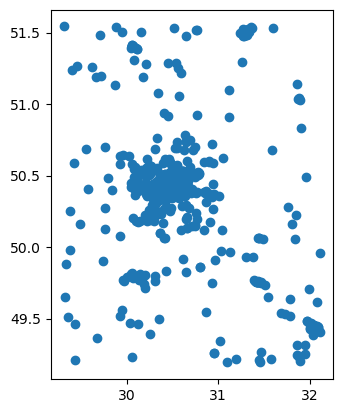

In [102]:
geodata1.plot()

In [103]:
#plotting the median value location of nodes created by each usercrs={'init':'epsg:4326'}
geometry2=[Point(xy) for xy in zip(median_loc["longitude"], median_loc["latitude"])]

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

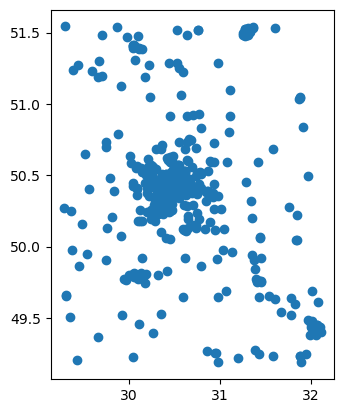

In [104]:
geodata2=gpd.GeoDataFrame(median_loc,crs=crs, geometry=geometry2)
geodata2.plot()

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

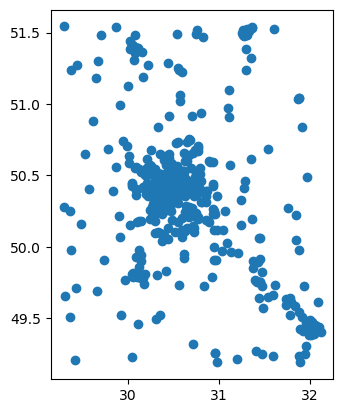

In [105]:
#plotting the mean value of locations

crs={'init':'epsg:4326'}
geometry3=[Point(xy) for xy in zip(mean_loc["longitude"], mean_loc["latitude"])]
geodata3=gpd.GeoDataFrame(mean_loc,crs=crs, geometry=geometry3)
geodata3.plot()

In [106]:
#importing shapefile of Ukraine

shapefile = gpd.read_file("C:/Users/Shruti/CST4090/ukr_admbnda_sspe_20230201_shp/ukr_admbnda_sspe_20230201_SHP/ukr_admbnda_adm1_sspe_20230201.shp")

Text(0.5, 0.98, 'kyiv mapping pattern')

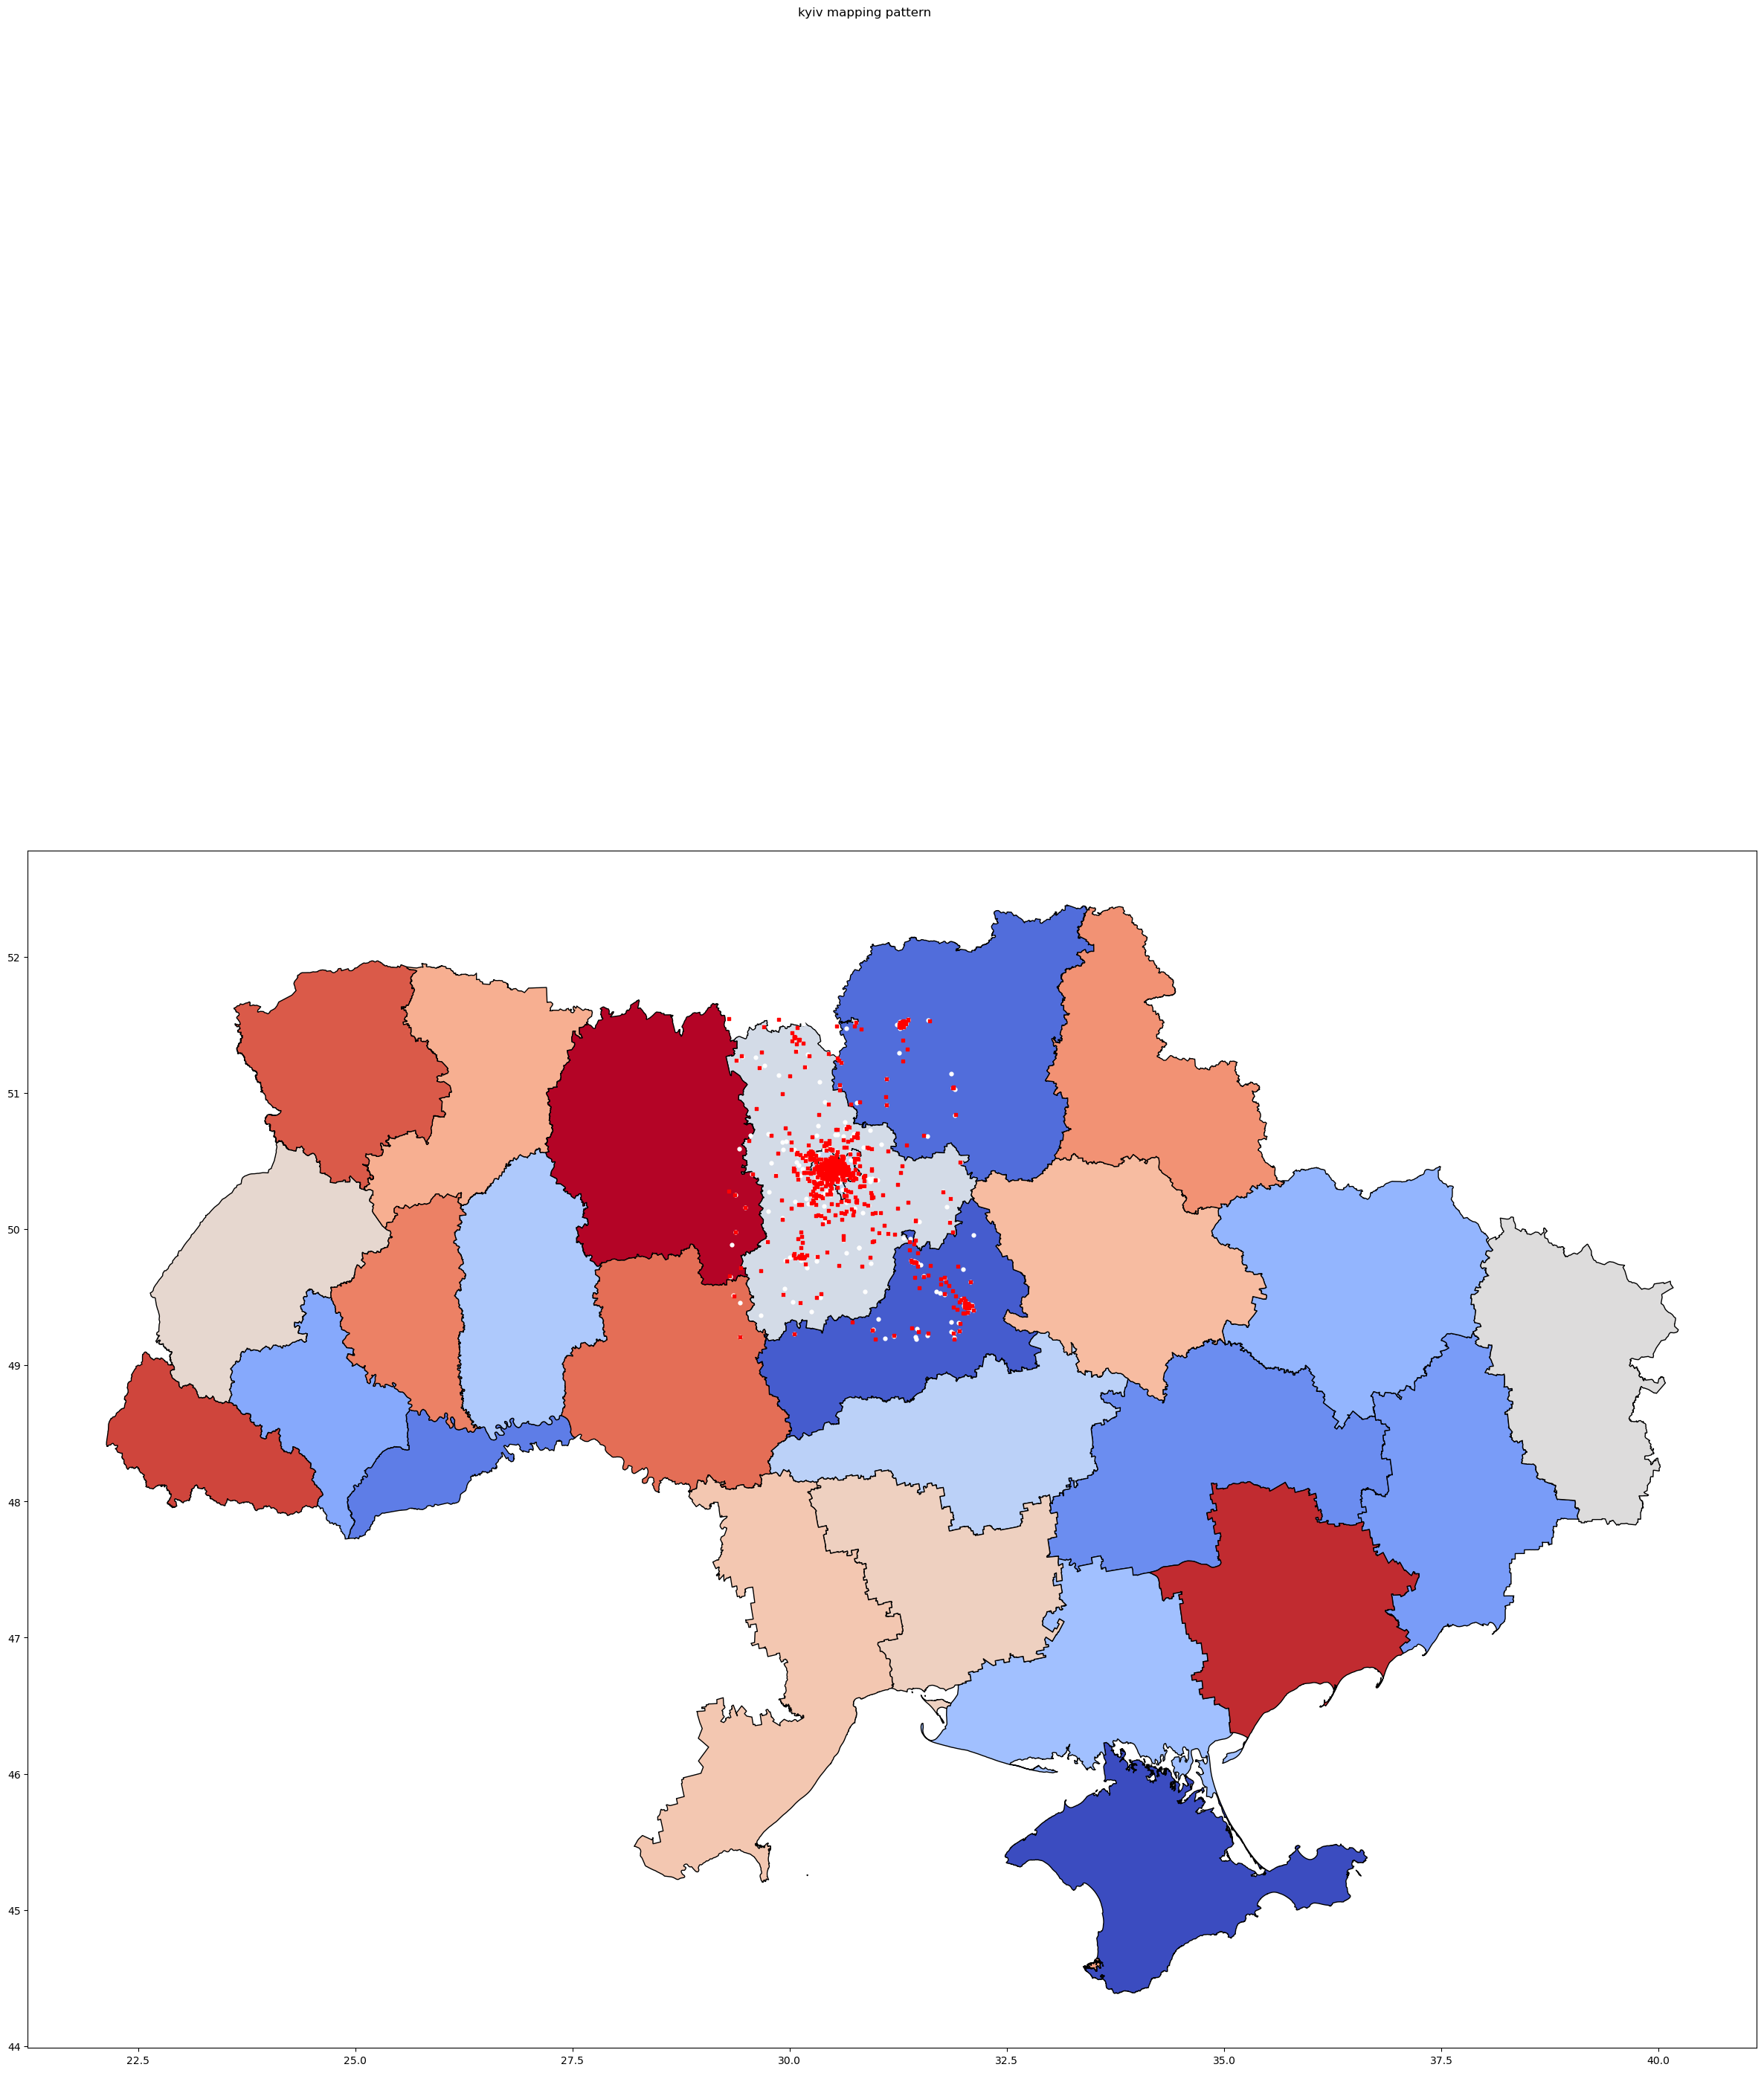

In [107]:
#creating plot with Ukraine's map  with locations of first node and mean point 


fig,ax = plt.subplots(figsize=(30, 40))


color = 'blue'

cmapblue = LinearSegmentedColormap.from_list('custom_cmap', [(0, color), (1, color)], N=256)
shapefile.plot(facecolor='white', edgecolor='k',alpha=1,linewidth=1,cmap='coolwarm',ax=ax)


g=geodata1.plot(ax=ax,color='white', marker='o',markersize=12,legend=True);
g=geodata3.plot(ax=ax,color='red',marker='s',markersize=12,legend=True);

fig.suptitle('kyiv mapping pattern', fontsize=12)


### *Analysing dispersion of mapping using Statistical measure*

In [108]:
import statistics as st
df27=kyiv3.loc[:,['uid','latitude','longitude']]
df27.head()

uid   latitude  longitude
0   8983588  49.429365  32.096442
1   5092132  49.943586  30.101511
2   3249611  49.233012  31.445749
3   5092132  49.343057  30.864712
4  12100948  50.400823  30.365103

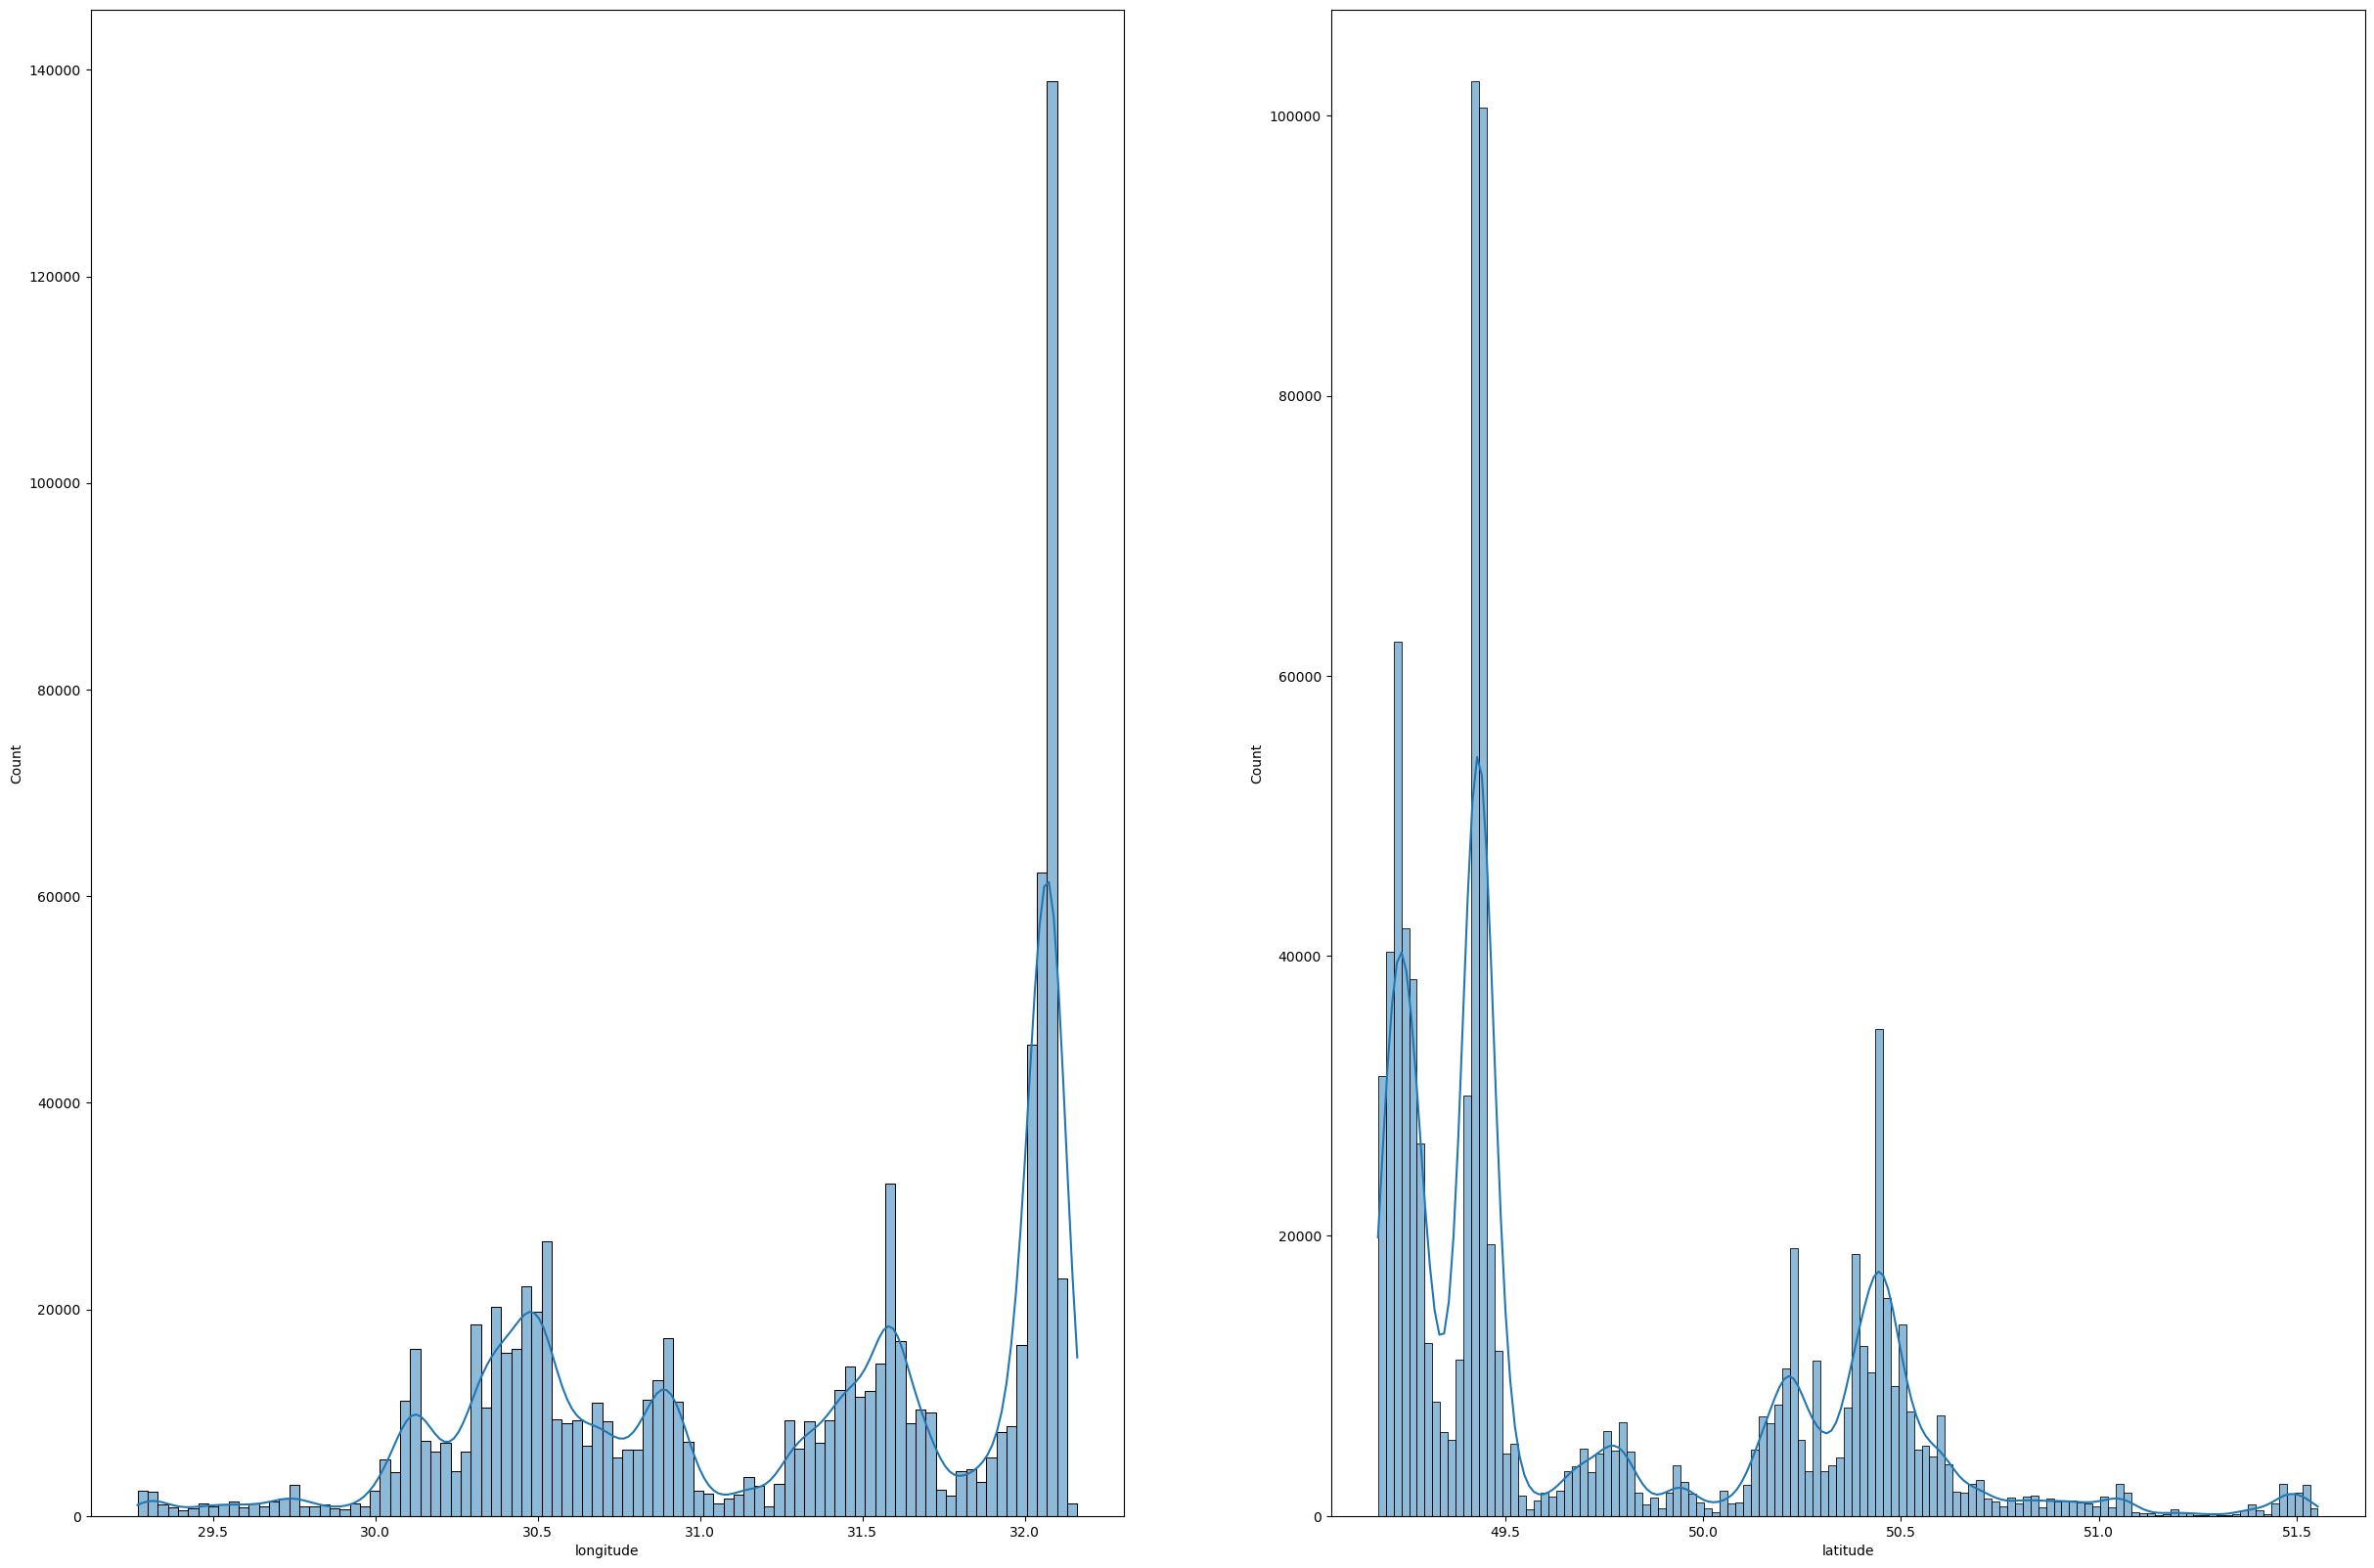

In [109]:
# frequency distribution of latitude and longitude measures

fig,axes= plt.subplots(1,2,figsize=(30, 20))

axes = axes.flatten()

s=sb.histplot(data=df27, x='longitude',bins='auto',kde=True,ax=axes[0])
s=sb.histplot(data=df27, x='latitude',bins='auto',kde=True,ax=axes[1])




In [110]:
#calculating standard deviation of complete dataset 

p_std_lat= st.pstdev(df27['latitude'])
p_std_lon= st.pstdev(df27['longitude'])


In [111]:
print('Population std for latitude: ',p_std_lat)
print('Population std for longitude: ',p_std_lon)

Population std for latitude:  0.546510710369044
Population std for longitude:  0.7551235013276191


In [112]:
#calculating mean of each dataset

p_mean_lat=df27['latitude'].mean()
p_mean_lon=df27['longitude'].mean()

In [113]:
print('Population mean for latitude: ',p_mean_lat)
print('Population mean for latitude: ',p_mean_lon)

Population mean for latitude:  49.73095974430982
Population mean for latitude:  31.244635102438266


In [114]:
#calculation for Coefficient of variance to understand the variability in mapping

cv_lat=(p_std_lat/p_mean_lat)*100
cv_lon=(p_std_lon/p_mean_lon)*100
print('CV for latitude: ',cv_lat)
print('CV for longitude: ',cv_lon)

CV for latitude:  1.0989345735109715
CV for longitude:  2.416810114286439


In [115]:
#calculating std for each contributor group

df28=df27.groupby('uid').agg('std',numeric_only='True')
df28=df28.reset_index()

In [116]:
df28

uid  latitude  longitude
0        5359  0.659289   0.799708
1       11238  0.000574   0.007036
2       13154       NaN        NaN
3       15110  0.044952   0.088927
4       15809       NaN        NaN
..        ...       ...        ...
736  15044036  0.002113   0.000771
737  15094067  0.000840   0.001043
738  15140429  0.000050   0.000063
739  15148805  0.000095   0.000669
740  15155332  0.002290   0.003013

[741 rows x 3 columns]

In [117]:
df29=df28.merge(mean_loc,on='uid',how='left')

In [118]:
df29
df29= df29.rename(columns={'latitude_x': 'latitude'})
df29= df29.rename(columns={'longitude_x': 'longitude'})
df29= df29.rename(columns={'latitude_y': 'mean_lat'})
df29= df29.rename(columns={'longitude_y': 'mean_long'})
df29

uid  latitude  longitude   mean_lat  mean_long
0        5359  0.659289   0.799708  50.251768  31.072194
1       11238  0.000574   0.007036  50.061981  31.449676
2       13154       NaN        NaN  50.464407  30.327170
3       15110  0.044952   0.088927  50.445544  30.531084
4       15809       NaN        NaN  50.550994  30.260332
..        ...       ...        ...        ...        ...
736  15044036  0.002113   0.000771  50.515056  30.240841
737  15094067  0.000840   0.001043  50.510181  30.252942
738  15140429  0.000050   0.000063  50.159344  29.484524
739  15148805  0.000095   0.000669  50.561762  30.091117
740  15155332  0.002290   0.003013  50.440349  30.940534

[741 rows x 5 columns]

In [119]:
#calculation for CV applied to each group

df29['CV_lat']=(df29['latitude']/df29['mean_lat']*100)
df29

uid  latitude  longitude   mean_lat  mean_long    CV_lat
0        5359  0.659289   0.799708  50.251768  31.072194  1.311971
1       11238  0.000574   0.007036  50.061981  31.449676  0.001147
2       13154       NaN        NaN  50.464407  30.327170       NaN
3       15110  0.044952   0.088927  50.445544  30.531084  0.089111
4       15809       NaN        NaN  50.550994  30.260332       NaN
..        ...       ...        ...        ...        ...       ...
736  15044036  0.002113   0.000771  50.515056  30.240841  0.004184
737  15094067  0.000840   0.001043  50.510181  30.252942  0.001663
738  15140429  0.000050   0.000063  50.159344  29.484524  0.000101
739  15148805  0.000095   0.000669  50.561762  30.091117  0.000188
740  15155332  0.002290   0.003013  50.440349  30.940534  0.004541

[741 rows x 6 columns]

In [120]:
df29['CV_lon']=(df29['longitude']/df29['mean_long'])*100
df29

uid  latitude  longitude   mean_lat  mean_long    CV_lat    CV_lon
0        5359  0.659289   0.799708  50.251768  31.072194  1.311971  2.573708
1       11238  0.000574   0.007036  50.061981  31.449676  0.001147  0.022372
2       13154       NaN        NaN  50.464407  30.327170       NaN       NaN
3       15110  0.044952   0.088927  50.445544  30.531084  0.089111  0.291266
4       15809       NaN        NaN  50.550994  30.260332       NaN       NaN
..        ...       ...        ...        ...        ...       ...       ...
736  15044036  0.002113   0.000771  50.515056  30.240841  0.004184  0.002548
737  15094067  0.000840   0.001043  50.510181  30.252942  0.001663  0.003447
738  15140429  0.000050   0.000063  50.159344  29.484524  0.000101  0.000212
739  15148805  0.000095   0.000669  50.561762  30.091117  0.000188  0.002222
740  15155332  0.002290   0.003013  50.440349  30.940534  0.004541  0.009737

[741 rows x 7 columns]

# Analysing OSM history data for Kyiv Aftere the bombing

In [121]:
#querying postgres to fetch data of Kyiv for the 6 months after the bombing 
query3 = "SELECT * FROM merged2 WHERE timestamp >=TO_DATE('2022-02-24','yyyy-mm-dd') AND timestamp <TO_DATE('2022-08-26','yyyy-mm-dd') AND latitude BETWEEN 49.1787440 AND 51.5531668 AND longitude BETWEEN 29.2675489 AND 32.1610264;"

In [122]:
#storing in a dataframe
kyiv_2 = pd.read_sql(query3, con=engine)
kyiv_2.head()

id  changeset deleted                  timestamp       uid  \
0  7401758073  124180950    true  2022-07-28 12:10:23+01:00  11459624   
1  5911127049  122265129    true  2022-06-12 06:36:26+01:00  11425841   
2  1066228494  120940137   false  2022-05-13 15:44:37+01:00    345544   
3  1066228494  120940137   false  2022-05-13 15:44:37+01:00    345544   
4  1066228494  120940137   false  2022-05-13 15:44:37+01:00    345544   

                 user  version visibility    tp   extra   latitude  longitude  
0            Kozinsky        2      false  node  241040  50.418986  30.437151  
1  BikeForestExplorer        2      false  node    5149  49.936620  31.416376  
2       Approksimator        3       true  node   10374  50.527111  30.618546  
3       Approksimator        3       true  node   10374  50.527060  30.618564  
4       Approksimator        3       true  node   10374  50.527059  30.618566

In [123]:
#removing duplicate columns 
kyiv_2=kyiv_2.drop_duplicates(subset=['id', 'changeset'],keep='first',ignore_index=True)
kyiv_2.head()

id  changeset deleted                  timestamp       uid  \
0  7401758073  124180950    true  2022-07-28 12:10:23+01:00  11459624   
1  5911127049  122265129    true  2022-06-12 06:36:26+01:00  11425841   
2  1066228494  120940137   false  2022-05-13 15:44:37+01:00    345544   
3  2151758528  123853493   false  2022-07-20 15:13:48+01:00   3023916   
4  6364323505  122312814   false  2022-06-13 09:25:13+01:00   1538111   

                 user  version visibility    tp   extra   latitude  longitude  
0            Kozinsky        2      false  node  241040  50.418986  30.437151  
1  BikeForestExplorer        2      false  node    5149  49.936620  31.416376  
2       Approksimator        3       true  node   10374  50.527111  30.618546  
3          neviksasha        4       true  node  103612  49.637283  31.393785  
4           avinet_ua        3       true  node   85592  49.460965  31.320250

In [124]:
#splitting date only from timestamp and adding to the daraframe
kyiv_2['date'] = kyiv_2.loc[:, 'timestamp'].astype(str).str.split().str[0]
kyiv_2

id  changeset deleted                  timestamp       uid  \
0       7401758073  124180950    true  2022-07-28 12:10:23+01:00  11459624   
1       5911127049  122265129    true  2022-06-12 06:36:26+01:00  11425841   
2       1066228494  120940137   false  2022-05-13 15:44:37+01:00    345544   
3       2151758528  123853493   false  2022-07-20 15:13:48+01:00   3023916   
4       6364323505  122312814   false  2022-06-13 09:25:13+01:00   1538111   
...            ...        ...     ...                        ...       ...   
527425  9533313207  117827228   false  2022-02-24 20:42:50+00:00   9630102   
527426  9534478935  117846448   false  2022-02-25 11:52:47+00:00   6518056   
527427  9534479066  117846448   false  2022-02-25 11:52:47+00:00   6518056   
527428  9534479175  117846448   false  2022-02-25 11:52:47+00:00   6518056   
527429  9534734789  117850798   false  2022-02-25 14:09:53+00:00  14852793   

                      user  version visibility    tp   extra   latitude  \
0                 Kozinsky        2      false  node  241040  50.418986   
1       BikeForestExplorer        2      false  node    5149  49.936620   
2            Approksimator        3       true  node   10374  50.527111   
3               neviksasha        4       true  node  103612  49.637283   
4                avinet_ua        3       true  node   85592  49.460965   
...                    ...      ...        ...   ...     ...        ...   
527425             muninnn        1       true  node  305135  49.862075   
527426           RochellaD        1       true  node  310554  51.034889   
527427           RochellaD        1       true  node  310685  51.033119   
527428           RochellaD        1       true  node  310794  51.029443   
527429       Hannah Newton        1       true  node  312179  50.489471   

        longitude        date  
0       30.437151  2022-07-28  
1       31.416376  2022-06-12  
2       30.618546  2022-05-13  
3       31.393785  2022-07-20  
4       31.320250  2022-06-13  
...           ...         ...  
527425  30.361949  2022-02-24  
527426  30.647597  2022-02-25  
527427  30.654225  2022-02-25  
527428  30.654557  2022-02-25  
527429  30.576308  2022-02-25  

[527430 rows x 13 columns]

### *Assigning Human and Bot categories to changesets*

In [125]:
#taking only useful columns
kyiv4=kyiv_2.drop(['latitude','longitude','extra'],axis=1)
kyiv4.head()

id  changeset deleted                  timestamp       uid  \
0  7401758073  124180950    true  2022-07-28 12:10:23+01:00  11459624   
1  5911127049  122265129    true  2022-06-12 06:36:26+01:00  11425841   
2  1066228494  120940137   false  2022-05-13 15:44:37+01:00    345544   
3  2151758528  123853493   false  2022-07-20 15:13:48+01:00   3023916   
4  6364323505  122312814   false  2022-06-13 09:25:13+01:00   1538111   

                 user  version visibility    tp        date  
0            Kozinsky        2      false  node  2022-07-28  
1  BikeForestExplorer        2      false  node  2022-06-12  
2       Approksimator        3       true  node  2022-05-13  
3          neviksasha        4       true  node  2022-07-20  
4           avinet_ua        3       true  node  2022-06-13

In [126]:
#counting number of edits in each changeset and then assigning a category [humna/bot] based on the counts
#for this classification, it is assumed that a changeset having more than 1000 edits in one time is contributed by automated script

db1=kyiv4.drop(['deleted','timestamp','uid','user','version','visibility','tp'],axis=1)
db1=db1.groupby(['date','changeset']).count()
db1

id
date       changeset    
2022-02-24 117794252  16
           117802940   1
           117803793   1
           117812198  42
           117815672   1
...                   ..
2022-08-25 125377785   1
           125377848   1
           125378047   1
           125378733  18
           125381364   1

[7269 rows x 1 columns]

In [127]:
db1['category']=db1['id'].apply(lambda x:'human' if x <1000 else 'bot')
db1

id category
date       changeset             
2022-02-24 117794252  16    human
           117802940   1    human
           117803793   1    human
           117812198  42    human
           117815672   1    human
...                   ..      ...
2022-08-25 125377785   1    human
           125377848   1    human
           125378047   1    human
           125378733  18    human
           125381364   1    human

[7269 rows x 2 columns]

In [128]:
#total changesets contribued by each -bot and human
db1.groupby(['category']).count()

id
category      
bot         65
human     7204

In [129]:
#adding category to the original dataframe 
kyiv4=kyiv4.merge(db1['category'], on='changeset', how='left')
kyiv4.head(7)

id  changeset deleted                  timestamp       uid  \
0  7401758073  124180950    true  2022-07-28 12:10:23+01:00  11459624   
1  5911127049  122265129    true  2022-06-12 06:36:26+01:00  11425841   
2  1066228494  120940137   false  2022-05-13 15:44:37+01:00    345544   
3  2151758528  123853493   false  2022-07-20 15:13:48+01:00   3023916   
4  6364323505  122312814   false  2022-06-13 09:25:13+01:00   1538111   
5   317357395  121378434   false  2022-05-23 17:12:18+01:00    345544   
6  4839663191  120164759    true  2022-04-25 13:35:58+01:00   5092132   

                 user  version visibility    tp        date category  
0            Kozinsky        2      false  node  2022-07-28    human  
1  BikeForestExplorer        2      false  node  2022-06-12    human  
2       Approksimator        3       true  node  2022-05-13    human  
3          neviksasha        4       true  node  2022-07-20    human  
4           avinet_ua        3       true  node  2022-06-13    human  
5       Approksimator        3       true  node  2022-05-23    human  
6           Nikolaїch        3      false  node  2022-04-25    human

### *Comparing the contribution done by Humans and Bots*

In [130]:
# date-wise grouping based on categories
db2=kyiv4.groupby(['date','category']).count()
db2.head(10)

id  changeset  deleted  timestamp   uid  user  version  \
date       category                                                             
2022-02-24 human     4371       4371     4371       4371  4371  4371     4371   
2022-02-25 human     3352       3352     3352       3352  3352  3352     3352   
2022-02-26 bot       1165       1165     1165       1165  1165  1165     1165   
           human     3915       3915     3915       3915  3915  3915     3915   
2022-02-27 bot       3984       3984     3984       3984  3984  3984     3984   
           human     6741       6741     6741       6741  6741  6741     6741   
2022-02-28 human      340        340      340        340   340   340      340   
2022-03-01 human     1984       1984     1984       1984  1984  1984     1984   
2022-03-02 human     1809       1809     1809       1809  1809  1809     1809   
2022-03-03 human      174        174      174        174   174   174      174   

                     visibility    tp  
date       category                    
2022-02-24 human           4371  4371  
2022-02-25 human           3352  3352  
2022-02-26 bot             1165  1165  
           human           3915  3915  
2022-02-27 bot             3984  3984  
           human           6741  6741  
2022-02-28 human            340   340  
2022-03-01 human           1984  1984  
2022-03-02 human           1809  1809  
2022-03-03 human            174   174

In [131]:
#creating two sepearte datafarmes each having daily total contribution by human and bot respectively for the 6 months 
db3=db2.xs('human', level='category')
db4=db2.xs('bot', level='category')

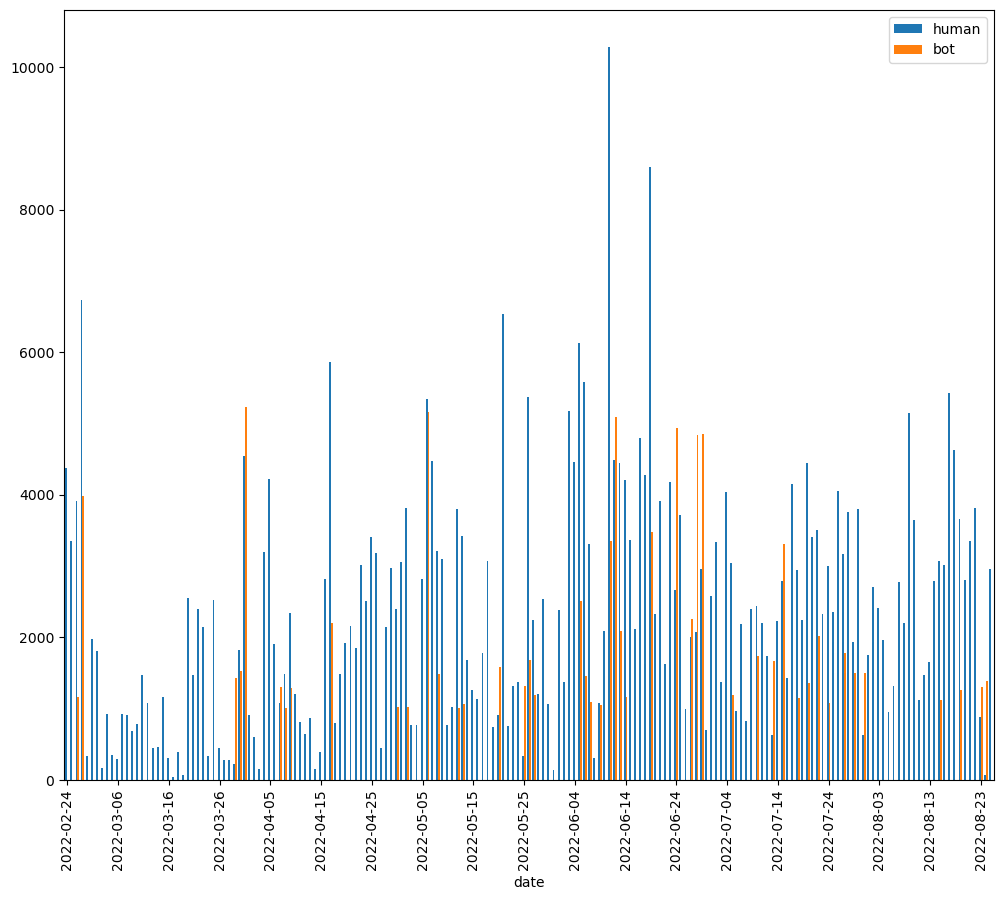

In [132]:
#plotting number of edits by both- human and bot category

x= db3.index
y=db3['changeset']
z=db4['changeset']

db5 = pd.DataFrame({
    'date': x,
    'human': y,
    'bot':z
})
db5 = db5.reset_index(drop=True)

step_size = 10 
ax = db5.plot(x="date", y=["human", "bot"],width=0.75, kind="bar", rot=90,figsize=(12, 10))
x_ticks = ax.get_xticks()
x_tick_labels = ax.get_xticklabels()

# to set x-axis labels based on the step size
ax.set_xticks(x_ticks[::step_size])
ax.set_xticklabels(x_tick_labels[::step_size])

plt.show()

### *Analysis of data for 1 week after the bombing*

In [133]:
#counting number of ediits per day for this week and plotting on bar graph
db6= kyiv4.loc[(kyiv4['date']>='2022-02-24') & (kyiv4['date']<'2022-03-03'),:]
db6=db6.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
db6=db6.groupby(['date']).count()
db6.head(3)

id
date            
2022-02-24  4371
2022-02-25  3352
2022-02-26  5080

In [134]:
#statistic measures of edits
db6.describe()

id
count      7.000000
mean    3951.571429
std     3395.916413
min      340.000000
25%     1896.500000
50%     3352.000000
75%     4725.500000
max    10725.000000

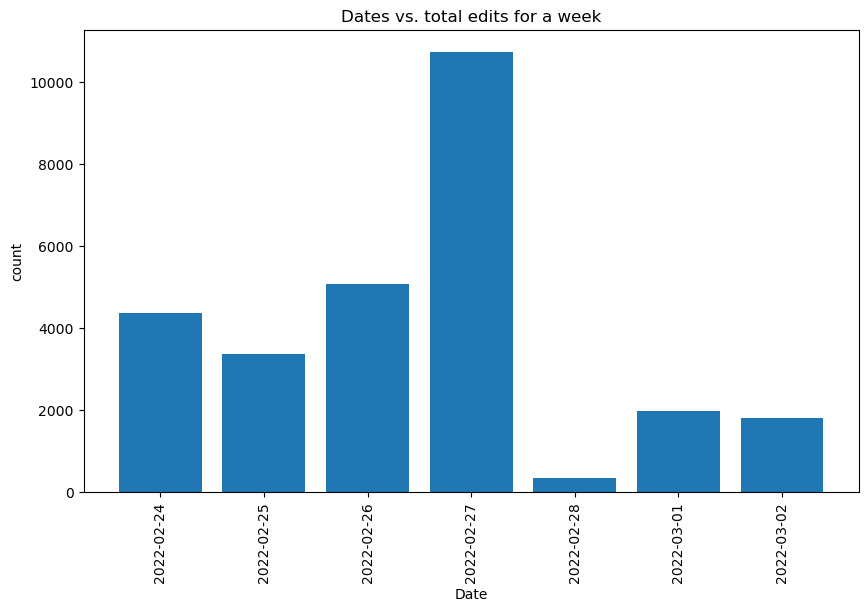

In [135]:
#using bar graph to plot the editing frequency

db6.index = pd.to_datetime(db6.index)
plt.figure(figsize=(10, 6))  
plt.bar(db6.index, db6['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for a week')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the month after the bombing*

In [136]:
#counting number of ediits per day for 1 month and plotting on bar graph
db7= kyiv4.loc[(kyiv4['date']>='2022-02-24') & (kyiv4['date']<'2022-03-26'),:]
db7=db7.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
db7=db7.groupby(['date']).count()
db7.head()

id
date             
2022-02-24   4371
2022-02-25   3352
2022-02-26   5080
2022-02-27  10725
2022-02-28    340

In [137]:
db7.describe() #statistic measures of edits

id
count     30.000000
mean    1652.500000
std     2127.740355
min       35.000000
25%      360.500000
50%      923.000000
75%     2107.000000
max    10725.000000

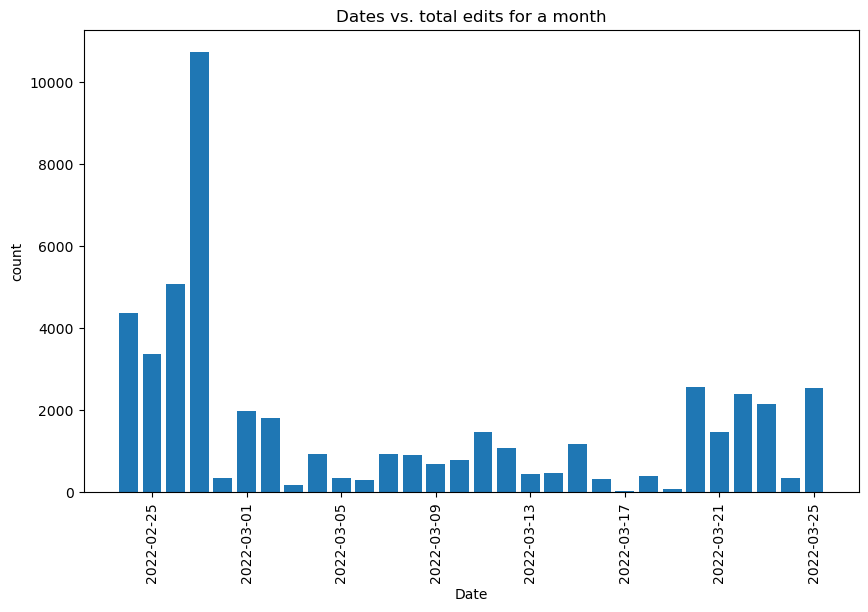

In [138]:
db7.index = pd.to_datetime(db7.index)
plt.figure(figsize=(10, 6))  
plt.bar(db7.index, db7['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for a month')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the 3 months after the bombing*

In [139]:
#counting number of ediits per day for the 3 months before bombing and plotting on bar graph
db8= kyiv4.loc[(kyiv4['date']>='2022-02-24') & (kyiv4['date']<'2022-05-26'),:]
db8=db8.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
db8=db8.groupby(['date']).count()
db8.head()

id
date             
2022-02-24   4371
2022-02-25   3352
2022-02-26   5080
2022-02-27  10725
2022-02-28    340

In [140]:
db8.describe() #statistic measures of edits

id
count     91.000000
mean    2188.395604
std     2168.393634
min       35.000000
25%      759.000000
50%     1653.000000
75%     3033.000000
max    10725.000000

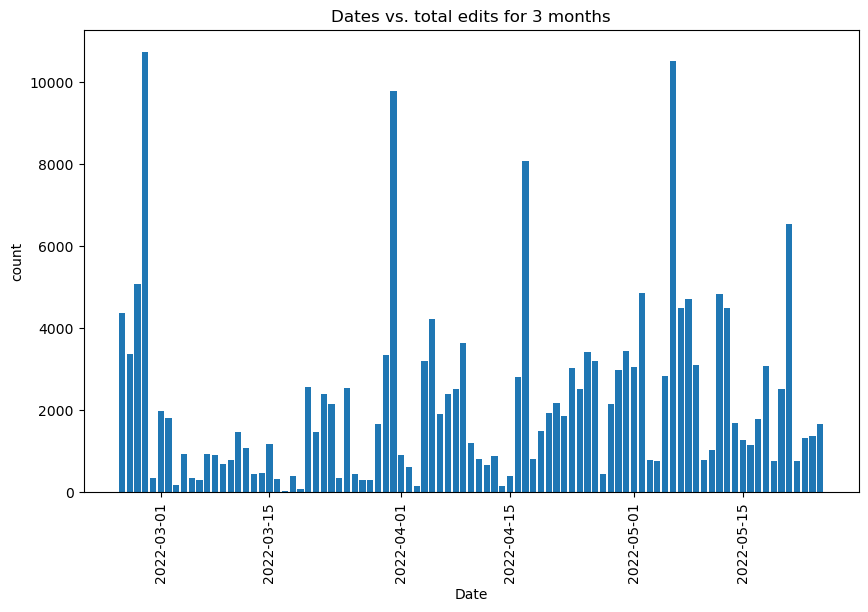

In [141]:
db8.index = pd.to_datetime(db8.index)
plt.figure(figsize=(10, 6))  
plt.bar(db8.index, db8['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for 3 months')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the 6 months after the bombing*

In [142]:
#counting number of ediits per day for the 6 months after bombing and plotting on bar graph
db9=kyiv4.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
db9=db9.groupby(['date']).count()
db9.describe()

id
count    183.000000
mean    2882.131148
std     2367.422195
min       35.000000
25%     1147.500000
50%     2359.000000
75%     4042.000000
max    13650.000000

In [143]:
#analysing frequency of edits for each month during these 6 months period
dbmar= kyiv4.loc[(kyiv4['date']>='2022-02-24') & (kyiv4['date']<'2022-03-26'),:]
dbmar=dbmar.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbmar=dbmar.groupby(['date']).count()
dbmar=dbmar.reset_index()

In [144]:
dbapr= kyiv4.loc[(kyiv4['date']>='2022-03-26') & (kyiv4['date']<'2022-04-26'),:]
dbapr=dbapr.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbapr=dbapr.groupby(['date']).count()
dbapr=dbapr.reset_index()

In [145]:
dbmay= kyiv4.loc[(kyiv4['date']>='2022-04-26') & (kyiv4['date']<'2022-05-26'),:]
dbmay=dbmay.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbmay=dbmay.groupby(['date']).count()
dbmay=dbmay.reset_index()

In [146]:
dbjun= kyiv4.loc[(kyiv4['date']>='2022-05-26') & (kyiv4['date']<'2022-06-26'),:]
dbjun=dbjun.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbjun=dbjun.groupby(['date']).count()
dbjun=dbjun.reset_index()

In [147]:
dbjul= kyiv4.loc[(kyiv4['date']>='2022-06-26') & (kyiv4['date']<'2022-07-26'),:]
dbjul=dbjul.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbjul=dbjul.groupby(['date']).count()
dbjul=dbjul.reset_index()


In [148]:
dbaug= kyiv4.loc[(kyiv4['date']>='2022-07-26') & (kyiv4['date']<'2022-08-26'),:]
dbaug=dbaug.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbaug=dbaug.groupby(['date']).count()
dbaug=dbaug.reset_index()


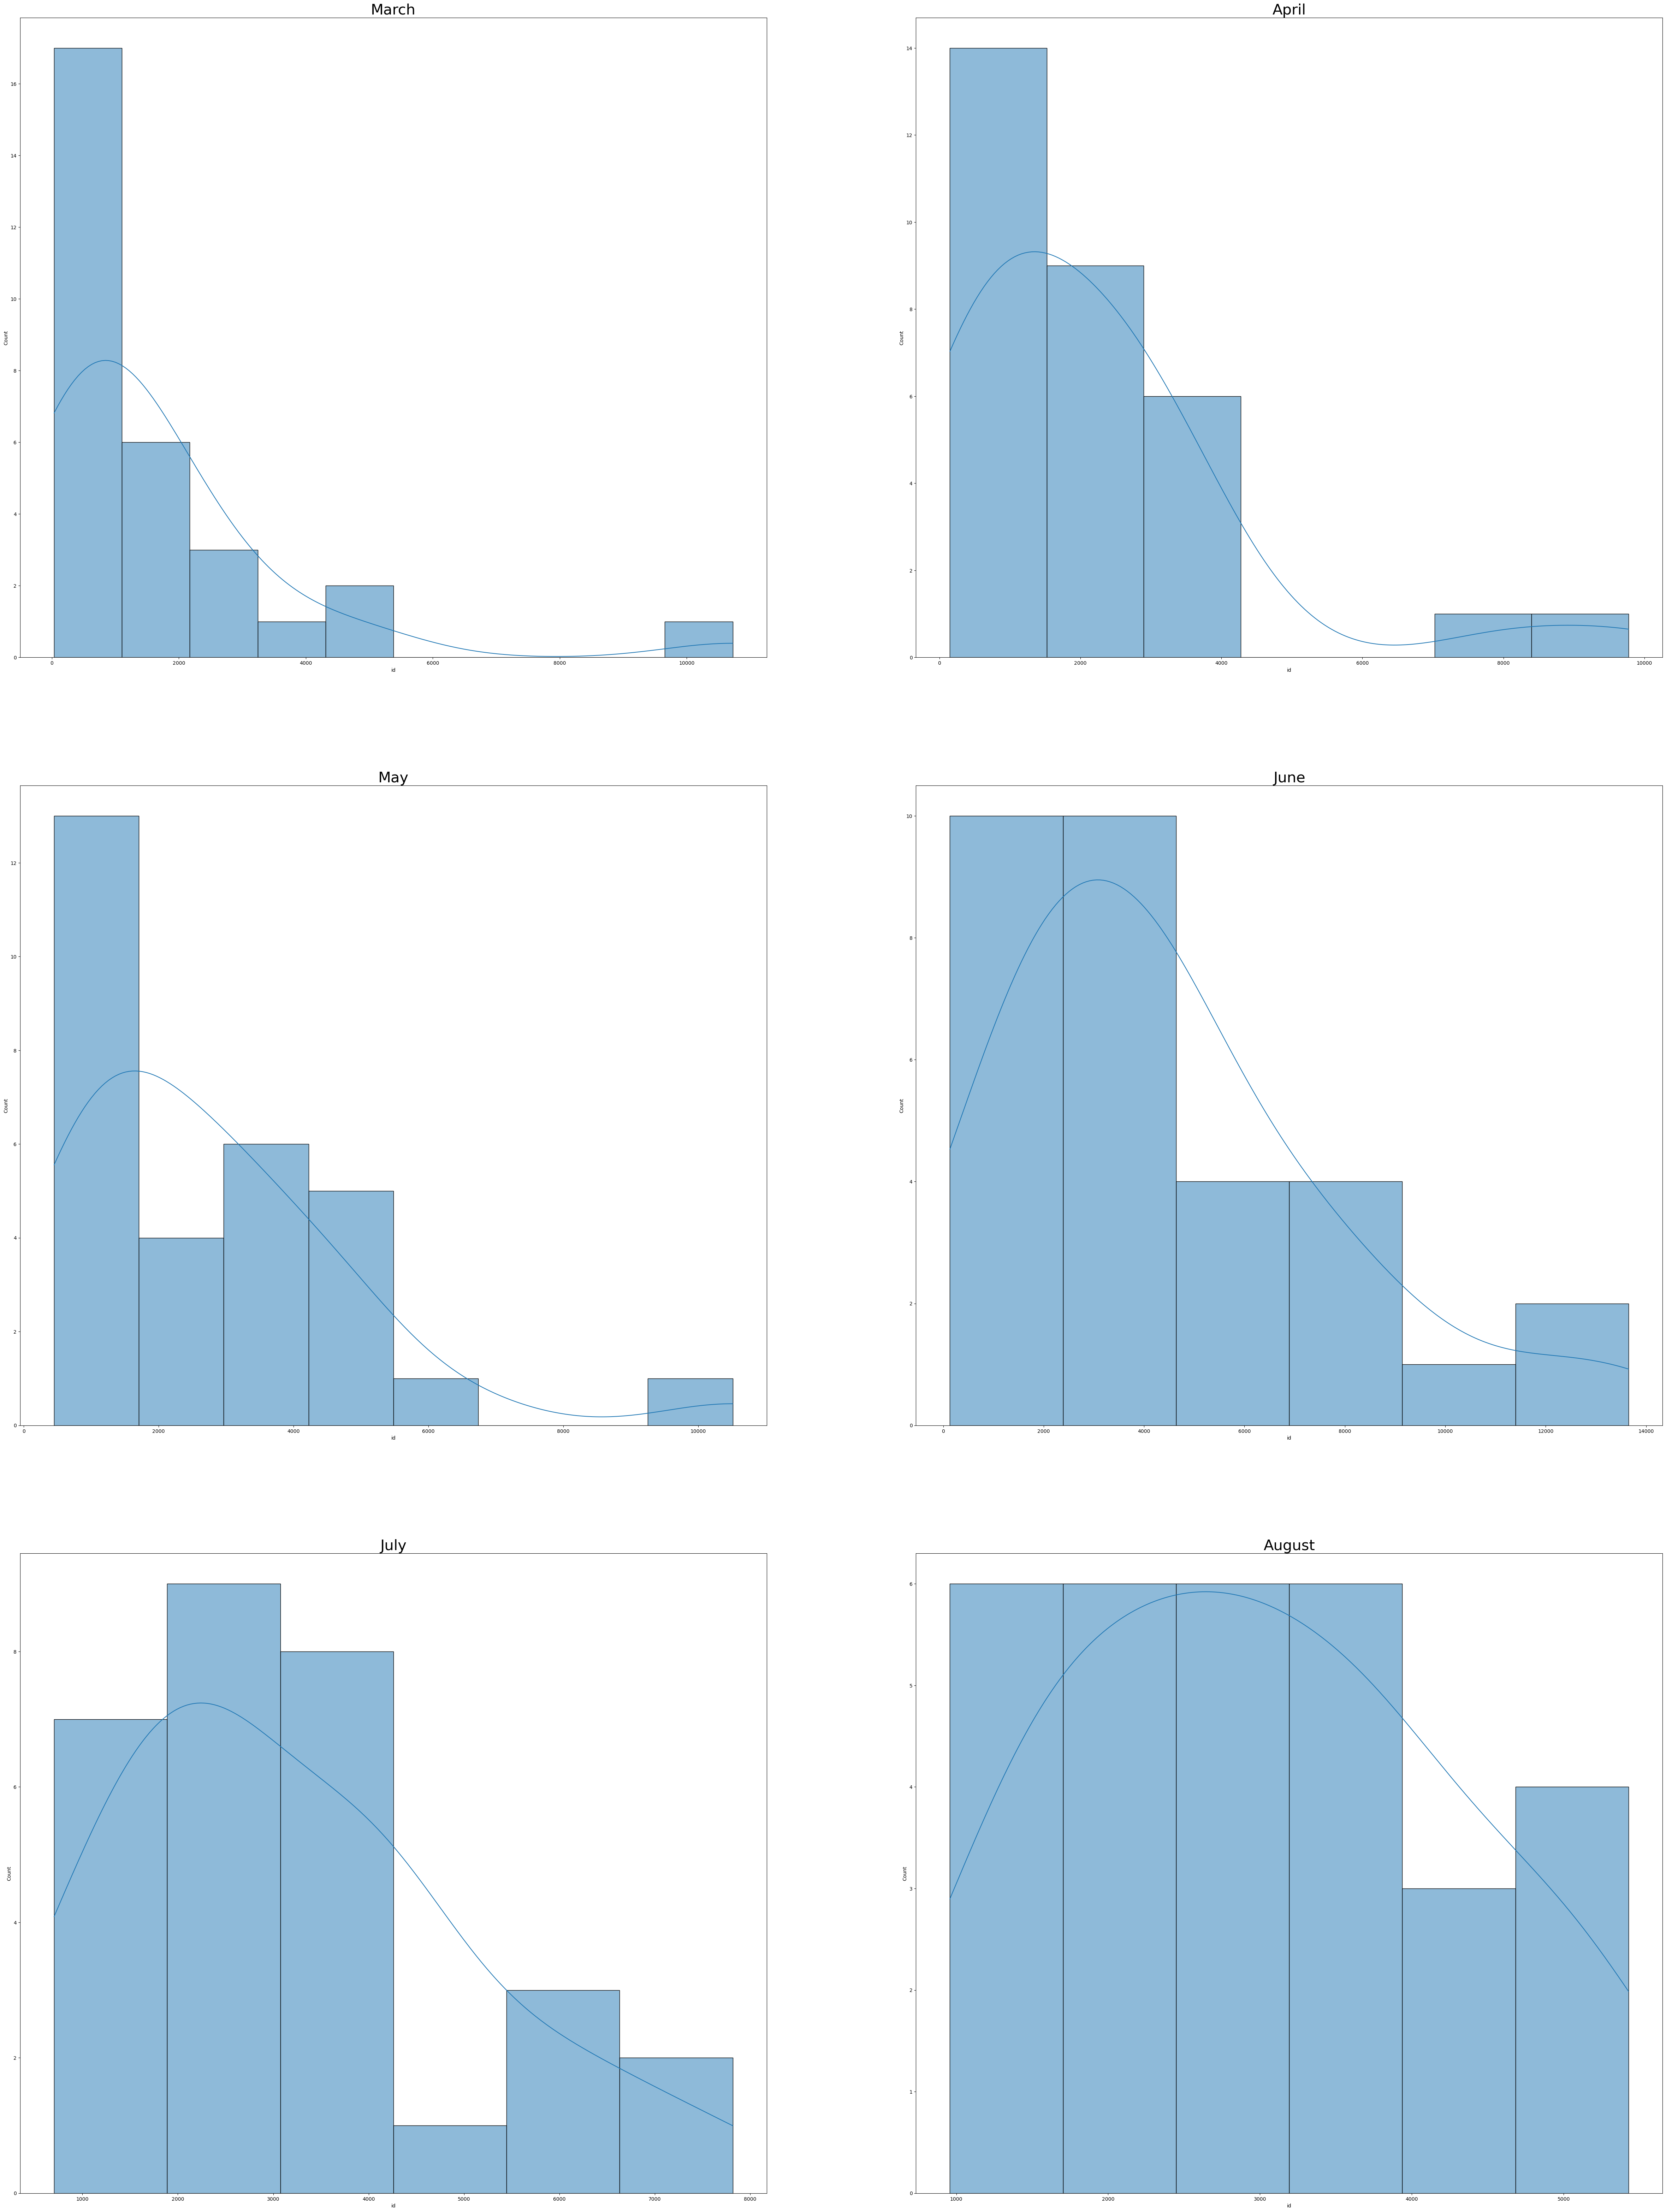

In [149]:
#histogram for frequency distributin 

fig,axes= plt.subplots(3,2,figsize=(60, 80))

axes = axes.flatten()

s=sb.histplot(data=dbmar, x='id',bins='auto',kde=True,ax=axes[0]).set_title('March',fontsize = 30)
s=sb.histplot(data=dbapr, x='id',bins='auto',kde=True,ax=axes[1]).set_title('April',fontsize = 30)
s=sb.histplot(data=dbmay, x='id',bins='auto',kde=True,ax=axes[2]).set_title('May',fontsize = 30)
s=sb.histplot(data=dbjun, x='id',bins='auto',kde=True,ax=axes[3]).set_title('June',fontsize = 30)
s=sb.histplot(data=dbjul, x='id',bins='auto',kde=True,ax=axes[4]).set_title('July',fontsize = 30)
s=sb.histplot(data=dbaug, x='id',bins='auto',kde=True,ax=axes[5]).set_title('August',fontsize = 30)

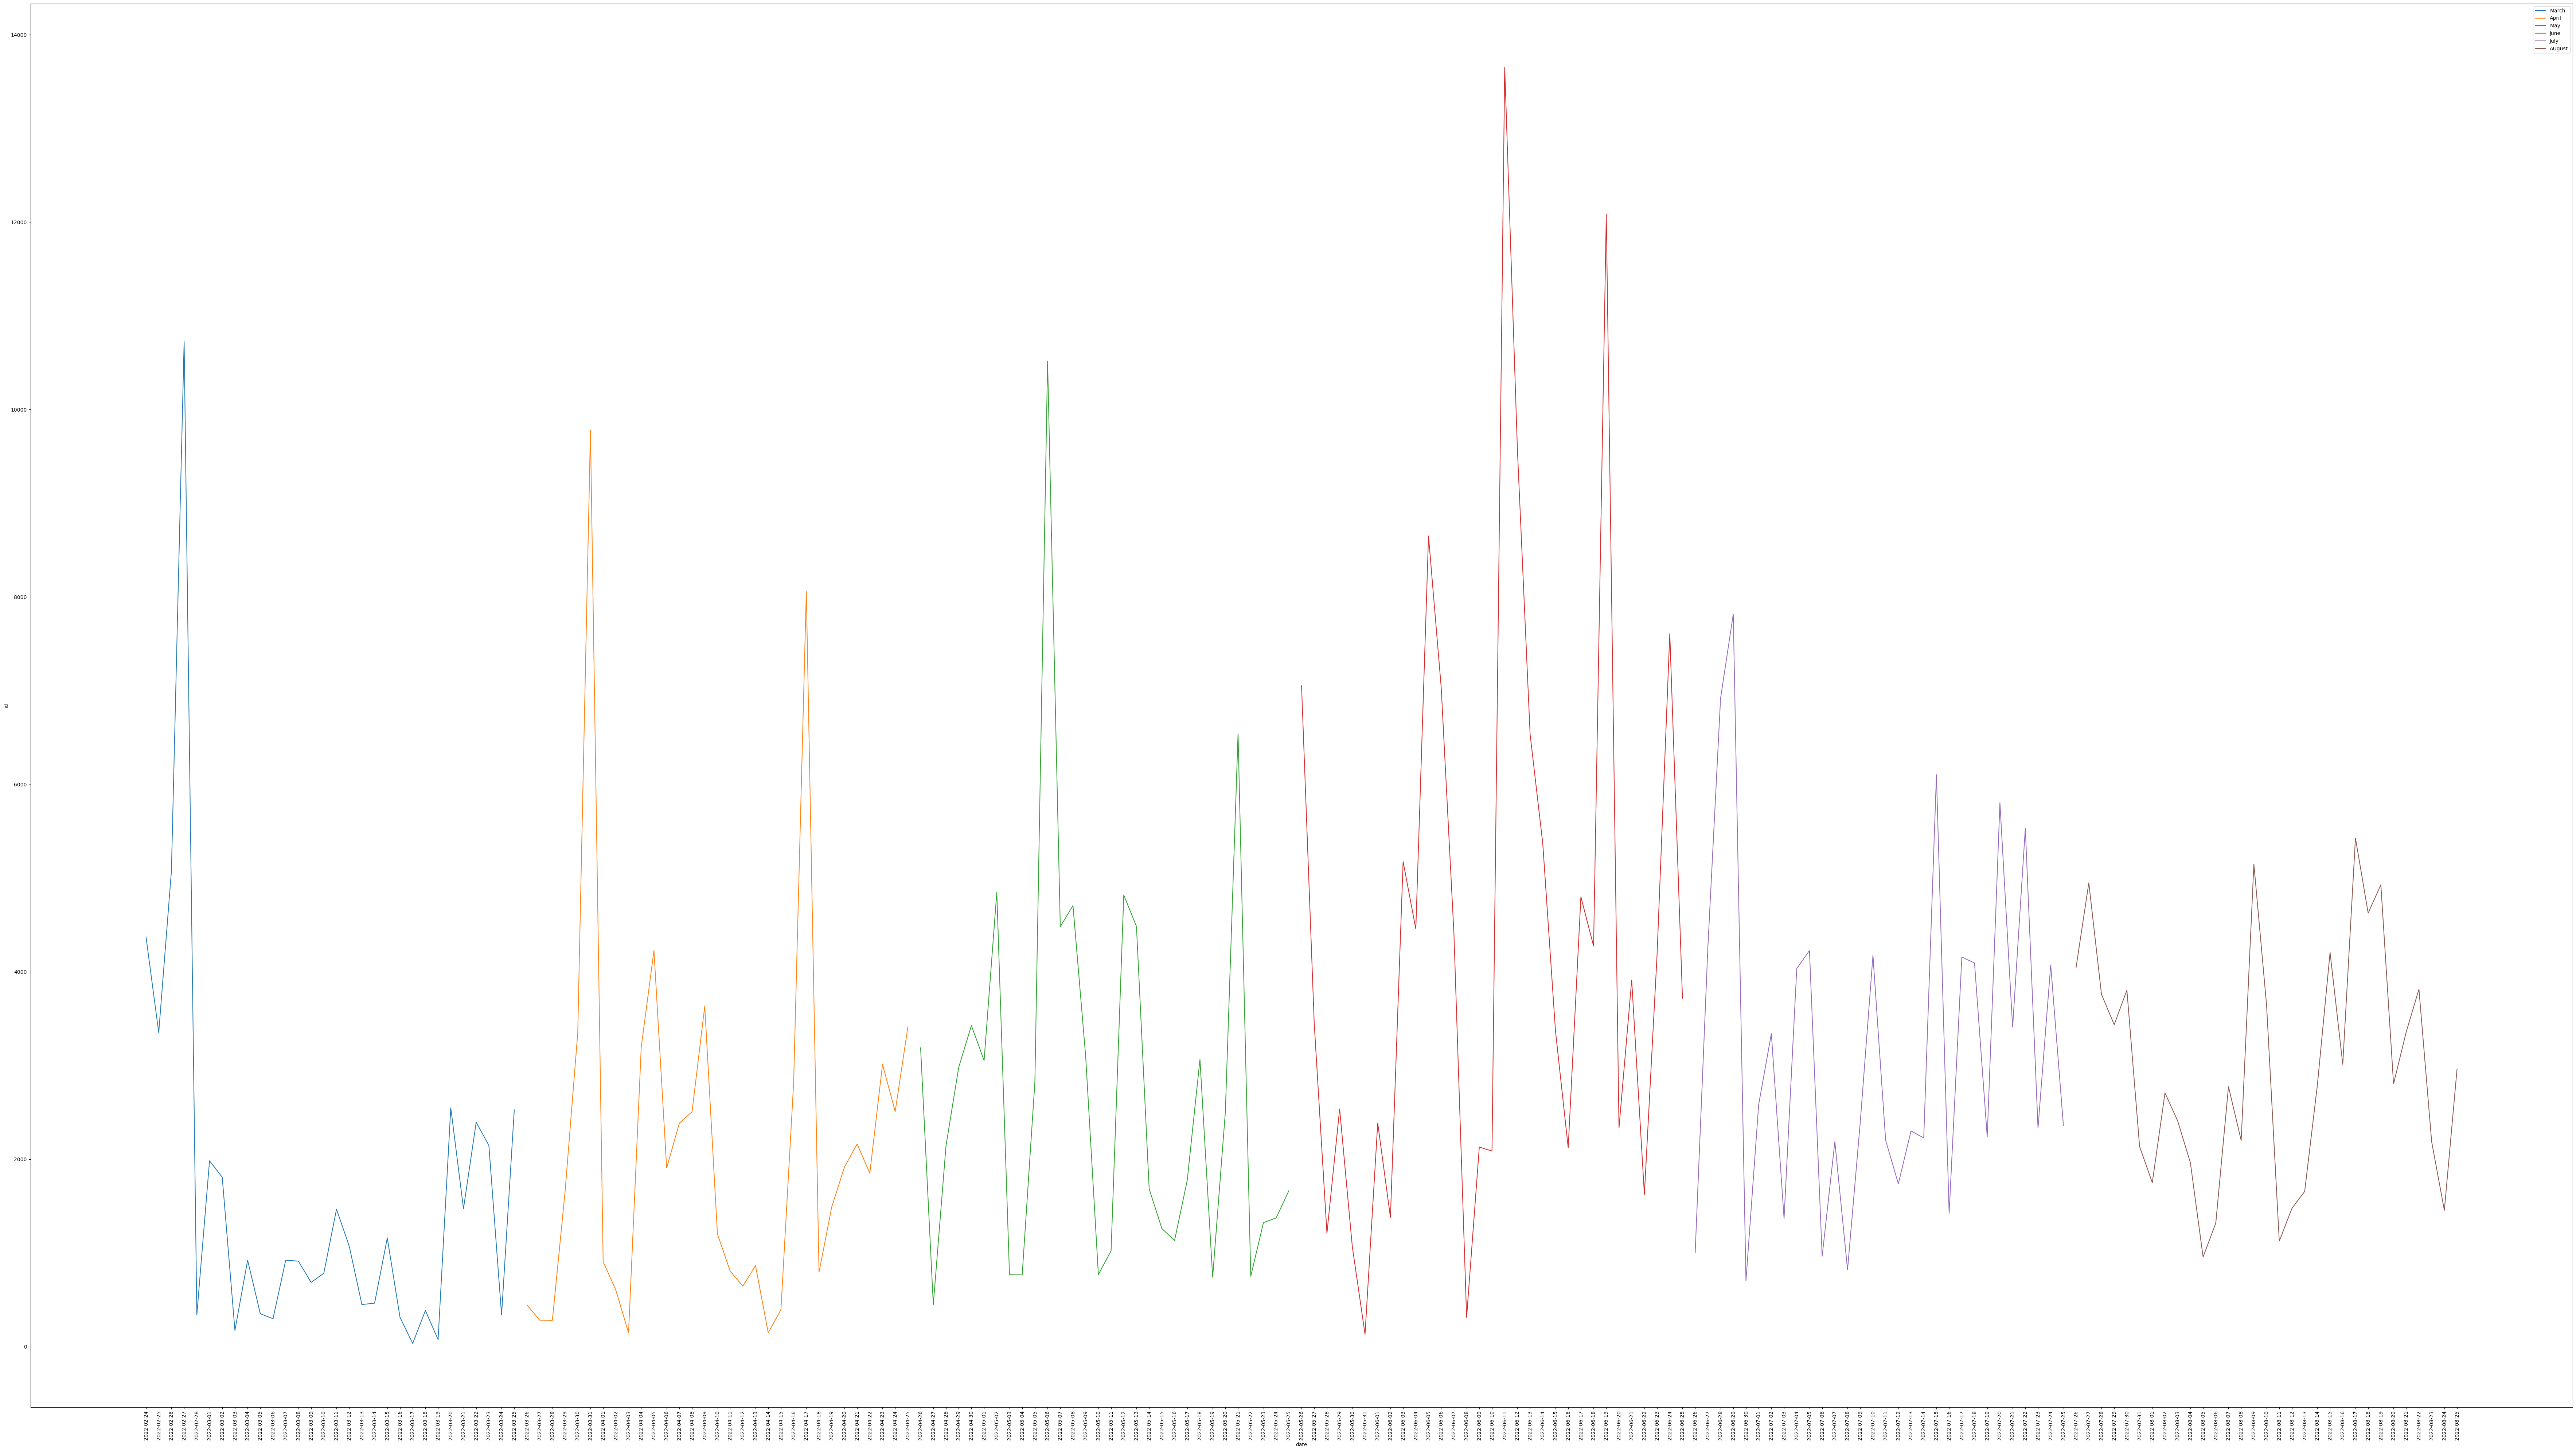

In [150]:
#trend chart to understand the editting pattern during 6 months befire bombing

fig = plt.subplots(figsize=(90, 50))
s=sb.lineplot(x='date', y='id', data=dbmar,label='March')
s=sb.lineplot(x='date', y='id', data=dbapr,label='April')
s=sb.lineplot(x='date', y='id', data=dbmay,label='May')
s=sb.lineplot(x='date', y='id', data=dbjun,label='June')
s=sb.lineplot(x='date', y='id', data=dbjul,label='July')
s=sb.lineplot(x='date', y='id', data=dbaug,label='AUgust')
plt.xticks(rotation=90)

plt.show()

### *Analysing editing frequency at contributor level*

In [151]:
#working on number of changesets and number of edits by each user during the 6 months

db10=kyiv4.loc[kyiv4['category']=='human']
db11=kyiv4.loc[kyiv4['category']=='bot']

db10=db10.drop(['deleted','timestamp','user','version','visibility','tp','date'], axis=1)
db11=db11.drop(['deleted','timestamp','user','version','visibility','tp','date'], axis=1)

In [152]:
#counting unique changesets added by each user during 6 months

db12=db10.groupby('uid')['changeset'].nunique()
db13=db11.groupby('uid')['changeset'].nunique()

In [153]:
#number of unique changesets posted by each contributors

changesets2 = db12.reset_index()
changesets2

uid  changeset
0        5359          4
1        6389          3
2       11238         42
3       12054          3
4       27454          1
..        ...        ...
509  16843498          1
510  16846372          1
511  16857313         10
512  16870063          1
513  16938152          1

[514 rows x 2 columns]

In [154]:
#counting the changesets added bu software bots during the period
changesets_bot2= db13.reset_index()
changesets_bot2

uid  changeset
0      94578          2
1     204049          2
2     224440          1
3     345544          2
4     481934          1
5    1538111         14
6    1778799          2
7    2021722          1
8    3249611          3
9    4473394          3
10   6344411          1
11   6518056          1
12   7272786         16
13   8372533          1
14  11425841         10
15  12050345          1
16  14770408          1
17  15301295          1
18  15530835          1
19  15836200          1

In [155]:

changesets_bot2['uid'].isin(changesets_bot2['uid']) #automated scripts were added by the same users as those listed in 'human' category 

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
Name: uid, dtype: bool

In [156]:
#grouping data on user and counting the total contribution made by each user during the whole period
db14=db10.drop(['changeset','category'],axis=1)
id_counts2=db14.groupby(['uid']).count()

id_counts2=id_counts2.reset_index()
id_counts2

uid     id
0        5359      4
1        6389      3
2       11238  14280
3       12054    458
4       27454    124
..        ...    ...
509  16843498     13
510  16846372      2
511  16857313   2459
512  16870063      5
513  16938152      1

[514 rows x 2 columns]

In [157]:
# Grouping users based on total contribution using the values of 25% and 75% values of quantiles 

id_counts2['contribution level']=id_counts2['id'].apply(lambda x: 'inactive' if x < 2000 else ('casual mapper' if 2000 <= x < 6000 else 'committed'))

id_counts2.head()

uid     id contribution level
0   5359      4           inactive
1   6389      3           inactive
2  11238  14280          committed
3  12054    458           inactive
4  27454    124           inactive

In [158]:
#count of contributors in each category

contribution2= id_counts2.drop('id', axis=1)

contribution2=contribution2.groupby('contribution level').count()

print(contribution2)

                    uid
contribution level     
casual mapper        20
committed            14
inactive            480


In [159]:
#adding contribution level to the dataframe 
temp=id_counts2.drop('id',axis=1)
temp=temp.set_index('uid')


kyiv4=kyiv4.merge(temp['contribution level'], on='uid', how='left')
kyiv4

id  changeset deleted                  timestamp       uid  \
0       7401758073  124180950    true  2022-07-28 12:10:23+01:00  11459624   
1       5911127049  122265129    true  2022-06-12 06:36:26+01:00  11425841   
2       1066228494  120940137   false  2022-05-13 15:44:37+01:00    345544   
3       2151758528  123853493   false  2022-07-20 15:13:48+01:00   3023916   
4       6364323505  122312814   false  2022-06-13 09:25:13+01:00   1538111   
...            ...        ...     ...                        ...       ...   
527425  9533313207  117827228   false  2022-02-24 20:42:50+00:00   9630102   
527426  9534478935  117846448   false  2022-02-25 11:52:47+00:00   6518056   
527427  9534479066  117846448   false  2022-02-25 11:52:47+00:00   6518056   
527428  9534479175  117846448   false  2022-02-25 11:52:47+00:00   6518056   
527429  9534734789  117850798   false  2022-02-25 14:09:53+00:00  14852793   

                      user  version visibility    tp        date category  \
0                 Kozinsky        2      false  node  2022-07-28    human   
1       BikeForestExplorer        2      false  node  2022-06-12    human   
2            Approksimator        3       true  node  2022-05-13    human   
3               neviksasha        4       true  node  2022-07-20    human   
4                avinet_ua        3       true  node  2022-06-13    human   
...                    ...      ...        ...   ...         ...      ...   
527425             muninnn        1       true  node  2022-02-24    human   
527426           RochellaD        1       true  node  2022-02-25    human   
527427           RochellaD        1       true  node  2022-02-25    human   
527428           RochellaD        1       true  node  2022-02-25    human   
527429       Hannah Newton        1       true  node  2022-02-25    human   

       contribution level  
0               committed  
1               committed  
2               committed  
3                inactive  
4               committed  
...                   ...  
527425      casual mapper  
527426           inactive  
527427           inactive  
527428           inactive  
527429           inactive  

[527430 rows x 12 columns]

In [160]:
#counting the number of deleted nodes for each user
df_deleted2=kyiv4.loc[:,['uid','deleted']]
df_deleted2=df_deleted2.groupby(['uid','deleted'])['deleted'].count()
df_del2=pd.DataFrame(df_deleted2)
df_del2= df_del2.rename(columns={'deleted': 'deleted nodes'})
df_del2=df_del2.reset_index()
df_del2=df_del2.loc[df_del2['deleted']=='true']


In [161]:
df_del2=df_del2.set_index('uid')
df_del2

deleted  deleted nodes
uid                            
5359        true              2
11238       true            191
12054       true             34
27454       true             17
44157       true              6
...          ...            ...
16751464    true             23
16807933    true              4
16817680    true              2
16826058    true              1
16832117    true              2

[227 rows x 2 columns]

### *Analysis of version history on contributor level*

In [162]:
#anaysing version history on contributor level
kyiv4=kyiv4.sort_values(['id', 'version'], ascending=[True,True])
kyiv4

id  changeset deleted                  timestamp       uid  \
392730    26051585  123735462   false  2022-07-17 22:01:38+01:00  12037361   
385840    26051992  124359626   false  2022-08-01 19:23:48+01:00  13998177   
326945    26052012  118709774   false  2022-03-20 20:26:30+00:00   1538111   
326946    26052012  118713795   false  2022-03-20 23:45:10+00:00   1373226   
326992    26052012  121259128    true  2022-05-20 20:50:41+01:00    204049   
...            ...        ...     ...                        ...       ...   
136518  9978539217  125378733   false  2022-08-25 21:38:19+01:00   1739740   
345965  9978539218  125378733   false  2022-08-25 21:38:19+01:00   1739740   
185372  9978539219  125378733   false  2022-08-25 21:38:19+01:00   1739740   
79094   9978539220  125378733   false  2022-08-25 21:38:19+01:00   1739740   
447686  9978665767  125381364   false  2022-08-25 23:07:11+01:00  16938152   

                  user  version visibility    tp        date category  \
392730  плигаюча жабка       15       true  node  2022-07-17    human   
385840          36mpxl        9       true   way  2022-08-01    human   
326945       avinet_ua        6       true  node  2022-03-20    human   
326946         Gorozan        7       true  node  2022-03-20    human   
326992           olehz        8      false  node  2022-05-20      bot   
...                ...      ...        ...   ...         ...      ...   
136518        андриано        1       true  node  2022-08-25    human   
345965        андриано        1       true  node  2022-08-25    human   
185372        андриано        1       true  node  2022-08-25    human   
79094         андриано        1       true  node  2022-08-25    human   
447686        Allexsay        1       true  node  2022-08-25    human   

       contribution level  
392730      casual mapper  
385840           inactive  
326945          committed  
326946           inactive  
326992           inactive  
...                   ...  
136518          committed  
345965          committed  
185372          committed  
79094           committed  
447686           inactive  

[527430 rows x 12 columns]

In [163]:
#Extract the list of editing version for each of the contributors 

version2=kyiv4.groupby('uid')['version'].apply(list)
version_list2=pd.DataFrame(version2)
version_list2.head()

version
uid                                 
5359                   [6, 10, 2, 2]
6389                    [18, 11, 13]
11238  [5, 4, 3, 4, 3, 3, 3, 3, 3...
12054  [2, 2, 2, 2, 3, 4, 2, 2, 2...
27454  [3, 3, 3, 3, 3, 3, 5, 2, 3...

In [164]:
# This will count the number of new nodes vs number of edits 
# Function to count the frequency of new nodes(version=1) in a list


# Apply the functions to the 'version' column
version_list2['new nodes'] = version_list2['version'].apply(count_ones)
version_list2['edited nodes'] = version_list2['version'].apply(edits)                                                    
version_list2.head(16)

version  new nodes  edited nodes
uid                                                          
5359                   [6, 10, 2, 2]          0             4
6389                    [18, 11, 13]          0             3
11238  [5, 4, 3, 4, 3, 3, 3, 3, 3...      12096          2184
12054  [2, 2, 2, 2, 3, 4, 2, 2, 2...        284           174
27454  [3, 3, 3, 3, 3, 3, 5, 2, 3...         70            54
29431    [8, 9, 9, 9, 9, 9, 9, 9, 9]          0             9
34198                         [3, 1]          1             1
39040  [1, 2, 3, 1, 2, 3, 1, 2, 1...         59            35
44157       [7, 5, 7, 5, 4, 3, 2, 2]          0             8
45270  [3, 2, 3, 2, 2, 2, 2, 7, 4...        286            10
47892                          [120]          0             1
53964  [10, 7, 7, 5, 5, 6, 2, 4, ...          0            53
61042  [2, 2, 2, 1, 2, 3, 1, 1, 1...         17             5
71862  [13, 13, 10, 8, 11, 7, 6, ...          3            38
79602                   [33, 15, 26]          0             3
85218                            [3]          0             1

### *Calculating the total active days for each user*

In [165]:
df_lifespan2= kyiv4.loc[:,['uid','date']]
df_lifespan2['date'] = df_lifespan2.date.astype('datetime64[ns]')
df_lifespan2=df_lifespan2.sort_values(['uid','date'],ascending=[True,True])
df_lifespan2

uid       date
526984      5359 2022-03-22
283414      5359 2022-04-14
46770       5359 2022-08-17
36471       5359 2022-08-17
344116      6389 2022-02-24
...          ...        ...
472002  16870063 2022-08-18
272181  16870063 2022-08-18
524902  16870063 2022-08-18
448298  16870063 2022-08-18
447686  16938152 2022-08-25

[527430 rows x 2 columns]

In [166]:
 
df_lifespan2=df_lifespan2.groupby('uid')
first_row= df_lifespan2.min()
last_row=df_lifespan2.max()

timeframe_1=pd.DataFrame(first_row).reset_index()
timeframe_2=pd.DataFrame(last_row).reset_index()

# first day when the conributor made an activty
timeframe_1.head(10)

uid       date
0   5359 2022-03-22
1   6389 2022-02-24
2  11238 2022-03-23
3  12054 2022-03-02
4  27454 2022-03-12
5  29431 2022-04-01
6  34198 2022-06-03
7  39040 2022-03-07
8  44157 2022-04-22
9  45270 2022-04-02

In [167]:
timeframe_2.head(10) # last day when the conributor made an activty

uid       date
0   5359 2022-08-17
1   6389 2022-03-27
2  11238 2022-06-26
3  12054 2022-03-02
4  27454 2022-03-12
5  29431 2022-04-02
6  34198 2022-06-03
7  39040 2022-03-07
8  44157 2022-04-22
9  45270 2022-08-21

In [168]:
#calculating the difference between two dats

result=(timeframe_2['date']-timeframe_1['date'])
day=pd.to_timedelta(1, unit='d')
timeframe_1['active days']=result+day
timeframe_1=timeframe_1.drop(['date'],axis=1)
timeframe_1.head(6)

uid active days
0   5359    149 days
1   6389     32 days
2  11238     96 days
3  12054      1 days
4  27454      1 days
5  29431      2 days

## *Importing and analysing tag data for the 6 months period*

In [169]:
#to fetch the tags data for all the nodes fetched in previous query for 6 months

query4 = "SELECT * FROM node_tags WHERE id IN (SELECT id FROM user_info WHERE id IN (SELECT id FROM node_locations WHERE latitude BETWEEN 49.1787440 AND 51.5531668 AND longitude BETWEEN 29.2675489 AND 32.1610264) AND timestamp >=TO_DATE('2022-02-24','yyyy-mm-dd') AND timestamp <TO_DATE('2022-08-26','yyyy-mm-dd'));"

In [170]:
kyiv5 = pd.read_sql(query4, con=engine)

In [171]:
pd.set_option('max_colwidth', None)
kyiv5

id  \
0         26201247   
1         26201247   
2         26201247   
3         26201247   
4         26201247   
...            ...   
814111  6454715681   
814112  6454715681   
814113  6457400291   
814114  6457400291   
814115  6457400291   

                                                                                          tags  
0                                                                                           {}  
1                                                               {'highway': 'traffic_signals'}  
2                                                               {'highway': 'traffic_signals'}  
3       {'crossing': 'traffic_signals', 'crossing_ref': 'zebra', 'highway': 'traffic_signals'}  
4       {'crossing': 'traffic_signals', 'crossing_ref': 'zebra', 'highway': 'traffic_signals'}  
...                                                                                        ...  
814111                                                                                      {}  
814112                                                                                      {}  
814113                                                                                      {}  
814114                                                                                      {}  
814115                                                                                      {}  

[814116 rows x 2 columns]

In [172]:
#count of empty tags

db15=kyiv5[kyiv5['tags']=='{}'].count()
db15

id      725470
tags    725470
dtype: int64

In [173]:
#only taking the records having non-null values in tags

db15=kyiv5[kyiv5['tags']!='{}']

db15

id  \
1         26201247   
2         26201247   
3         26201247   
4         26201247   
5         26201247   
...            ...   
813831  6372981886   
813939  6438998203   
813940  6438998203   
813945  6443076572   
813946  6443076572   

                                                                                                                                                                                                                                                                                                                                                                                                  tags  
1                                                                                                                                                                                                                                                                                                                                                                       {'highway': 'traffic_signals'}  
2                                                                                                                                                                                                                                                                                                                                                                       {'highway': 'traffic_signals'}  
3                                                                                                                                                                                                                                                                                                               {'crossing': 'traffic_signals', 'crossing_ref': 'zebra', 'highway': 'traffic_signals'}  
4                                                                                                                                                                                                                                                                                                               {'crossing': 'traffic_signals', 'crossing_ref': 'zebra', 'highway': 'traffic_signals'}  
5                                                                                                                                                                                                                                                                                                               {'crossing': 'traffic_signals', 'crossing_ref': 'zebra', 'highway': 'traffic_signals'}  
...                                                                                                                                                                                                                                                                                                                                                                                                ...  
813831  {'addr:housenumber': '1а к5', 'addr:postcode': '08129', 'addr:street': 'Львівська вулиця', 'contact:facebook': 'https://www.facebook.com/EVA.dp.ua', 'contact:instagram': 'https://www.instagram.com/eva_ua/', 'contact:website': 'https://eva.ua/', 'name': 'Eva', 'name:en': 'Eva', 'opening_hours': 'Mo-Su 09:00-22:00', 'operator': 'РУШ', 'phone:UA': '0 800 303 700', 'shop': 'chemist'}  
813939                                                                                                                                                                                                                                                                                                                                                                             {'natural': 'tree'}  
813940                                                                                                                                                                                                                

In [174]:
# append the tags column to previous dataframe having user details 
pd.set_option('max_colwidth', 30)
db16=db15.merge(kyiv4, on='id', how='left')
db16

id                           tags  changeset deleted  \
0         26201247  {'highway': 'traffic_signa...  121426977   false   
1         26201247  {'highway': 'traffic_signa...  121426977   false   
2         26201247  {'crossing': 'traffic_sign...  121426977   false   
3         26201247  {'crossing': 'traffic_sign...  121426977   false   
4         26201247  {'crossing': 'traffic_sign...  121426977   false   
...            ...                            ...        ...     ...   
107167  6372981886  {'addr:housenumber': '1а к...  121592505   false   
107168  6438998203            {'natural': 'tree'}  122426999    true   
107169  6438998203            {'natural': 'tree'}  122426999    true   
107170  6443076572            {'barrier': 'gate'}  122308748   false   
107171  6443076572  {'access': 'no', 'barrier'...  122308748   false   

                        timestamp       uid                user  version  \
0       2022-05-24 15:13:43+01:00   6110846  Poliakoff Mykhailo       12   
1       2022-05-24 15:13:43+01:00   6110846  Poliakoff Mykhailo       12   
2       2022-05-24 15:13:43+01:00   6110846  Poliakoff Mykhailo       12   
3       2022-05-24 15:13:43+01:00   6110846  Poliakoff Mykhailo       12   
4       2022-05-24 15:13:43+01:00   6110846  Poliakoff Mykhailo       12   
...                           ...       ...                 ...      ...   
107167  2022-05-27 21:17:51+01:00     94578             andygol       10   
107168  2022-06-15 17:40:37+01:00   9538613            lore9374        3   
107169  2022-06-15 17:40:37+01:00   9538613            lore9374        3   
107170  2022-06-13 07:45:50+01:00  11425841  BikeForestExplorer        2   
107171  2022-06-13 07:45:50+01:00  11425841  BikeForestExplorer        2   

       visibility    tp        date category contribution level  
0            true  node  2022-05-24    human      casual mapper  
1            true  node  2022-05-24    human      casual mapper  
2            true  node  2022-05-24    human      casual mapper  
3            true  node  2022-05-24    human      casual mapper  
4            true  node  2022-05-24    human      casual mapper  
...           ...   ...         ...      ...                ...  
107167       true  node  2022-05-27    human      casual mapper  
107168      false  node  2022-06-15    human          committed  
107169      false  node  2022-06-15    human          committed  
107170       true  node  2022-06-13    human          committed  
107171       true  node  2022-06-13    human          committed  

[107172 rows x 13 columns]

In [175]:
# convrting tags from dictionary format into table format where each column is a unique key and stores its value

from ast import literal_eval
db16['tags'] = db16['tags'].apply(literal_eval)
extracted_data=[]

for index, row in db16.iterrows():
    tag_dict = row['tags']
    extracted_row = {"id": row['id']}  
    extracted_row.update(tag_dict)  
    extracted_data.append(extracted_row)


pd.set_option('display.max_columns', None)

webhook_data = {'created_by': 'JOSM'}

def parse_webhook(webhook_data):
    data = ast.literal_eval(str(webhook_data))
    return data
db17 = pd.DataFrame(extracted_data)

In [176]:
id_to_value1 = db16.set_index('id')['uid'].to_dict()
db17['uid'] = db17['id'].map(id_to_value1) #adding uid column to the dataframe
db17.head()

id          highway         crossing crossing_ref lanes created_by  \
0  26201247  traffic_signals              NaN          NaN   NaN        NaN   
1  26201247  traffic_signals              NaN          NaN   NaN        NaN   
2  26201247  traffic_signals  traffic_signals        zebra   NaN        NaN   
3  26201247  traffic_signals  traffic_signals        zebra   NaN        NaN   
4  26201247  traffic_signals  traffic_signals        zebra   NaN        NaN   

  name place is_in is_in:country is_in:country_code is_in:province  \
0  NaN   NaN   NaN           NaN                NaN            NaN   
1  NaN   NaN   NaN           NaN                NaN            NaN   
2  NaN   NaN   NaN           NaN                NaN            NaN   
3  NaN   NaN   NaN           NaN                NaN            NaN   
4  NaN   NaN   NaN           NaN                NaN            NaN   

  is_in:state name:en name:ru population name:sr addr:postcode koatuu name:uk  \
0         NaN     NaN     NaN        NaN     NaN           NaN    NaN     NaN   
1         NaN     NaN     NaN        NaN     NaN           NaN    NaN     NaN   
2         NaN     NaN     NaN        NaN     NaN           NaN    NaN     NaN   
3         NaN     NaN     NaN        NaN     NaN           NaN    NaN     NaN   
4         NaN     NaN     NaN        NaN     NaN           NaN    NaN     NaN   

  wikipedia wikipedia:ru name:cs name:de name:pl name:ro name:fr name:lt  \
0       NaN          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1       NaN          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2       NaN          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3       NaN          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4       NaN          NaN     NaN     NaN     NaN     NaN     NaN     NaN   

  name:prefix is_in:district name:hu name:be name:eo wikidata name:et name:nl  \
0         NaN            NaN     NaN     NaN     NaN      NaN     NaN     NaN   
1         NaN            NaN     NaN     NaN     NaN      NaN     NaN     NaN   
2         NaN            NaN     NaN     NaN     NaN      NaN     NaN     NaN   
3         NaN            NaN     NaN     NaN     NaN      NaN     NaN     NaN   
4         NaN            NaN     NaN     NaN     NaN      NaN     NaN     NaN   

  name:ko katotth postal_code name:ckb name:ml name:he name:hr alt_name:cs  \
0     NaN     NaN         NaN      NaN     NaN     NaN     NaN         NaN   
1     NaN     NaN         NaN      NaN     NaN     NaN     NaN         NaN   
2     NaN     NaN         NaN      NaN     NaN     NaN     NaN         NaN   
3     NaN     NaN         NaN      NaN     NaN     NaN     NaN         NaN   
4     NaN     NaN         NaN      NaN     NaN     NaN     NaN         NaN   

  name:it name:es shop amenity cuisine phone website craft crossing:island  \
0     NaN     NaN  NaN     NaN     NaN   NaN     NaN   NaN             NaN   
1     NaN     NaN  NaN     NaN     NaN   NaN     NaN   NaN             NaN   
2     NaN     NaN  NaN     NaN     NaN   NaN     NaN   NaN             NaN   
3     NaN     NaN  NaN     NaN     NaN   NaN     NaN   NaN             NaN   
4     NaN     NaN  NaN     NaN     NaN   NaN     NaN   NaN             NaN   

  historic addr:city addr:street level addr:housenumber internet_access  \
0      NaN       NaN         NaN   NaN              NaN             NaN   
1      NaN       NaN         NaN   NaN              NaN             NaN   
2      NaN       NaN         NaN   NaN              NaN             NaN   
3      NaN       NaN         NaN   NaN              NaN             NaN   
4      NaN       NaN         NaN   NaN              NaN             NaN   

  opening_hours bench public_transport shelter trolleybus  bus email  \
0           NaN   NaN              NaN     NaN        NaN  NaN   NaN   
1           NaN   NaN              NaN     NaN        NaN  NaN   NaN   
2           NaN   NaN              NaN     NaN        NaN  NaN   NaN   
3    

In [177]:
db17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107172 entries, 0 to 107171
Columns: 1180 entries, id to uid
dtypes: int64(2), object(1178)
memory usage: 964.8+ MB


In [178]:
#counting total counts of each tags

non_null_counts = db17.count()
counts2=pd.DataFrame(non_null_counts)
counts2= counts2.reset_index()
counts2.columns = ["tags", "total counts"]
counts2=counts2.sort_values(['total counts'], ascending=False)
counts2.head(7)

tags  total counts
0                id        107172
1179            uid        107172
6              name         66291
59    opening_hours         35046
47          amenity         31390
19          name:uk         27595
49            phone         26090

In [179]:
#selecting the value of tags for further analysis, only tags having more than 5000 entries are considered

db18= counts2.loc[counts2['total counts']>5000]
db18

tags  total counts
0                    id        107172
1179                uid        107172
6                  name         66291
59        opening_hours         35046
47              amenity         31390
19              name:uk         27595
49                phone         26090
14              name:ru         24268
13              name:en         22654
55          addr:street         20956
57     addr:housenumber         20456
50              website         18481
46                 shop         18191
89             operator         14240
1               highway         14110
88      contact:website         10188
17        addr:postcode          9527
7                 place          8121
90     contact:facebook          8054
77                  ref          8012
72                brand          7996
80             entrance          7857
87        contact:phone          7426
91    contact:instagram          7402
73       brand:wikidata          7286
105         description          7170
20            wikipedia          7164
74      brand:wikipedia          6451
15           population          5983
18               koatuu          5886
65                email          5820
94               source          5473
109     contact:youtube          5297
61     public_transport          5093
86        contact:email          5074
92           wheelchair          5022

In [180]:
df_tg= df18.merge(db18, on='tags', how='outer')
df_tg

tags  total counts_x  total counts_y
0                   id        184008.0        107172.0
1                  uid        184008.0        107172.0
2                 name         89715.0         66291.0
3              highway         55947.0         14110.0
4              name:uk         48279.0         27595.0
5              name:ru         46476.0         24268.0
6              amenity         44946.0         31390.0
7              name:en         42556.0         22654.0
8        opening_hours         30717.0         35046.0
9             operator         25056.0         14240.0
10               place         24817.0          8121.0
11           wikipedia         20768.0          7164.0
12          population         19748.0          5983.0
13              koatuu         19552.0          5886.0
14       addr:postcode         16931.0          9527.0
15               brand         16383.0          7996.0
16                 ref         16251.0          8012.0
17         name:prefix         15830.0             NaN
18      brand:wikidata         15543.0          7286.0
19     brand:wikipedia         14952.0          6451.0
20        wikipedia:ru         14089.0             NaN
21         addr:street         13477.0         20956.0
22               phone         13354.0         26090.0
23               power         13349.0             NaN
24                shop         13048.0         18191.0
25            crossing         12745.0             NaN
26            brand:en         12743.0             NaN
27            wikidata         11878.0             NaN
28    addr:housenumber         11848.0         20456.0
29    public_transport         11595.0          5093.0
30         description         11344.0          7170.0
31     contact:website         11200.0         10188.0
32            brand:uk          9863.0             NaN
33             website          9411.0         18481.0
34              source          8936.0          5473.0
35    contact:facebook          8002.0          8054.0
36          wheelchair          7996.0          5022.0
37   contact:instagram          7899.0          7402.0
38   operator:wikidata          7639.0             NaN
39         operator:uk          7403.0             NaN
40  operator:wikipedia          7314.0             NaN
41             shelter          6774.0             NaN
42         source:pkey          6756.0             NaN
43         operator:ru          6666.0             NaN
44             barrier          6528.0             NaN
45     contact:youtube          6341.0          5297.0
46         postal_code          6208.0             NaN
47       contact:phone          5843.0          7426.0
48     contact:twitter          5567.0             NaN
49         operator:en          5474.0             NaN
50               bench          5470.0             NaN
51       contact:email          5378.0          5074.0
52                 bus          5166.0             NaN
53            entrance          5008.0          7857.0
54               email             NaN          5820.0

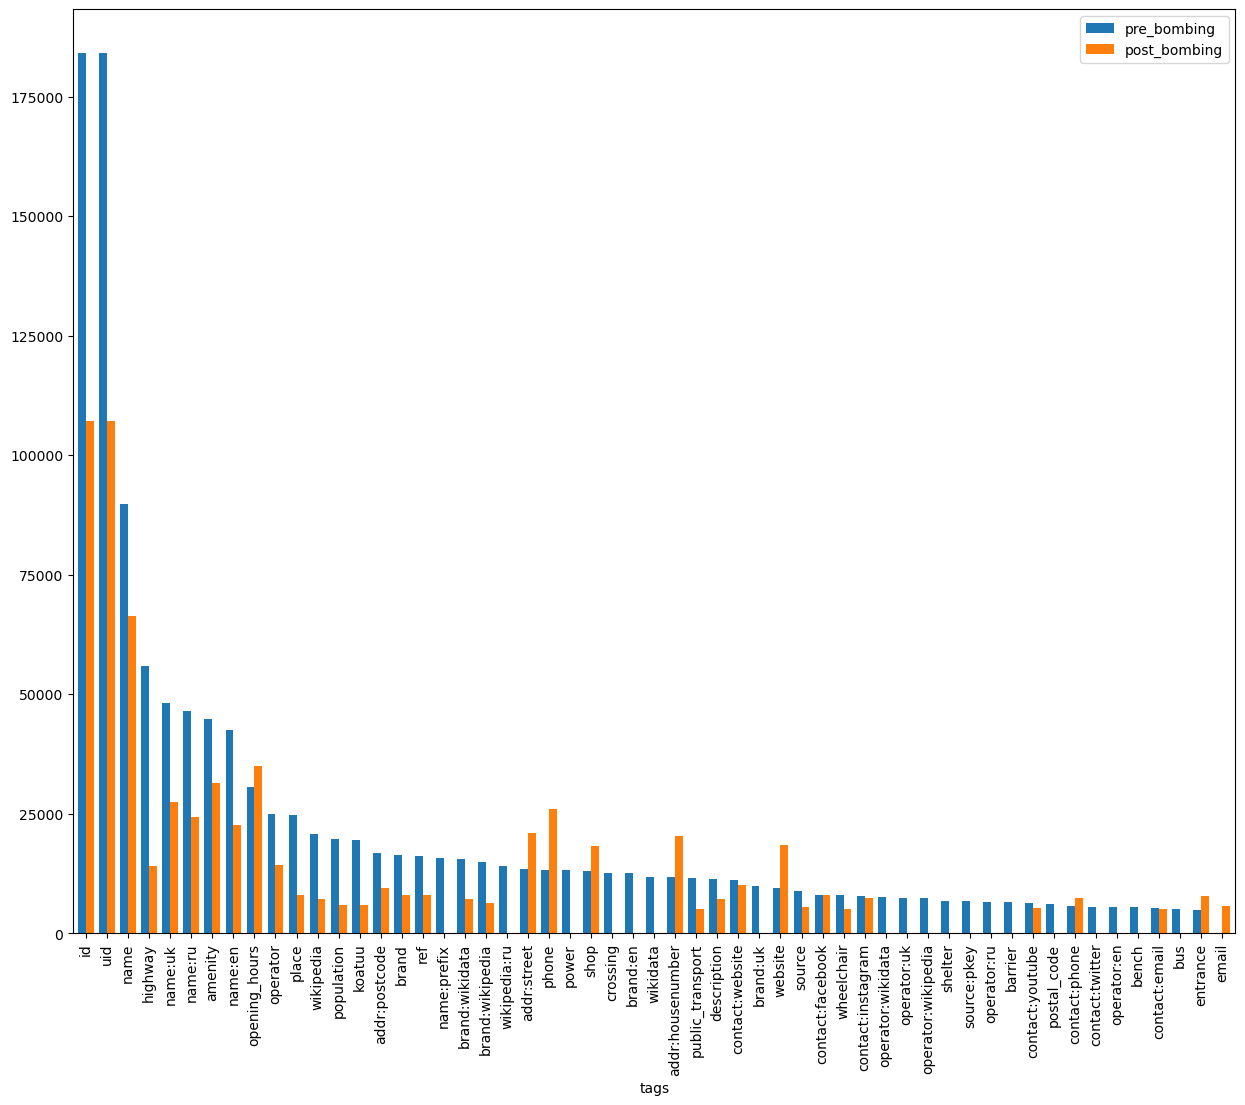

In [181]:
x= df_tg['tags']
y=df_tg['total counts_x']
z=df_tg['total counts_y']

df_tg = pd.DataFrame({
    'tags': x,
    'pre_bombing':y,
    'post_bombing':z
})

ax = df_tg.plot(x="tags", y=["pre_bombing", "post_bombing"],width=0.75, kind="bar", rot=90,figsize=(15, 12))
x_ticks = ax.get_xticks()
x_tick_labels = ax.get_xticklabels()
plt.show()

<Axes: xlabel='total counts', ylabel='Count'>

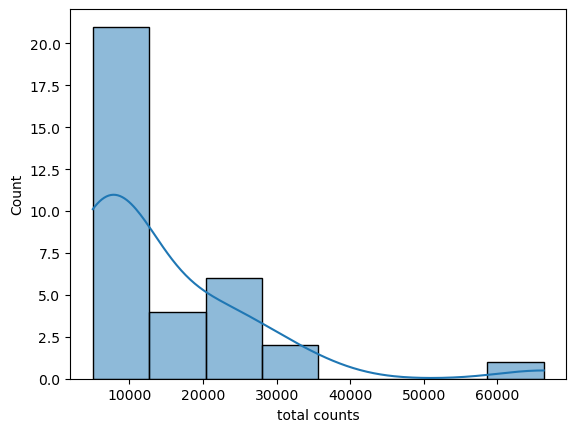

In [182]:
#frequency distribution of tag counts

db_plot=db18.loc[(db18['tags']!='id') & (db18['tags']!='uid'),:]
sb.histplot(data=db_plot, x='total counts',bins='auto',kde=True)

In [183]:
#list of tags for further analysis

column_keep2=db18["tags"].tolist()
column_keep2


['id',
 'uid',
 'name',
 'opening_hours',
 'amenity',
 'name:uk',
 'phone',
 'name:ru',
 'name:en',
 'addr:street',
 'addr:housenumber',
 'website',
 'shop',
 'operator',
 'highway',
 'contact:website',
 'addr:postcode',
 'place',
 'contact:facebook',
 'ref',
 'brand',
 'entrance',
 'contact:phone',
 'contact:instagram',
 'brand:wikidata',
 'description',
 'wikipedia',
 'brand:wikipedia',
 'population',
 'koatuu',
 'email',
 'source',
 'contact:youtube',
 'public_transport',
 'contact:email',
 'wheelchair']

In [184]:
db19=db17.loc[:,column_keep2]
db19.head()

id      uid name opening_hours amenity name:uk phone name:ru name:en  \
0  26201247  6110846  NaN           NaN     NaN     NaN   NaN     NaN     NaN   
1  26201247  6110846  NaN           NaN     NaN     NaN   NaN     NaN     NaN   
2  26201247  6110846  NaN           NaN     NaN     NaN   NaN     NaN     NaN   
3  26201247  6110846  NaN           NaN     NaN     NaN   NaN     NaN     NaN   
4  26201247  6110846  NaN           NaN     NaN     NaN   NaN     NaN     NaN   

  addr:street addr:housenumber website shop operator          highway  \
0         NaN              NaN     NaN  NaN      NaN  traffic_signals   
1         NaN              NaN     NaN  NaN      NaN  traffic_signals   
2         NaN              NaN     NaN  NaN      NaN  traffic_signals   
3         NaN              NaN     NaN  NaN      NaN  traffic_signals   
4         NaN              NaN     NaN  NaN      NaN  traffic_signals   

  contact:website addr:postcode place contact:facebook  ref brand entrance  \
0             NaN           NaN   NaN              NaN  NaN   NaN      NaN   
1             NaN           NaN   NaN              NaN  NaN   NaN      NaN   
2             NaN           NaN   NaN              NaN  NaN   NaN      NaN   
3             NaN           NaN   NaN              NaN  NaN   NaN      NaN   
4             NaN           NaN   NaN              NaN  NaN   NaN      NaN   

  contact:phone contact:instagram brand:wikidata description wikipedia  \
0           NaN               NaN            NaN         NaN       NaN   
1           NaN               NaN            NaN         NaN       NaN   
2           NaN               NaN            NaN         NaN       NaN   
3           NaN               NaN            NaN         NaN       NaN   
4           NaN               NaN            NaN         NaN       NaN   

  brand:wikipedia population koatuu email source contact:youtube  \
0             NaN        NaN    NaN   NaN    NaN             NaN   
1             NaN        NaN    NaN   NaN    NaN             NaN   
2             NaN        NaN    NaN   NaN    NaN             NaN   
3             NaN        NaN    NaN   NaN    NaN             NaN   
4             NaN        NaN    NaN   NaN    NaN             NaN   

  public_transport contact:email wheelchair  
0              NaN           NaN        NaN  
1              NaN           NaN        NaN  
2              NaN           NaN        NaN  
3              NaN           NaN        NaN  
4              NaN           NaN        NaN

In [185]:
#calculating the frequency of unique values under each tags column

remove=['id','uid']

dict1 = {}
for column_name in db19.columns:
    if column_name not in remove:
        unique_value_counts = db19[column_name].value_counts()
        dict1[column_name] = unique_value_counts

sorted(dict1.items())

[('addr:housenumber',
  1               715
  2               515
  3               489
  4               474
  6               432
                 ... 
  53, офис 565      1
  21-23 В           1
  10-А              1
  3Ð±               1
  1а, к5            1
  Name: addr:housenumber, Length: 1294, dtype: int64),
 ('addr:postcode',
  01000-06999    442
  01001          375
  03150          360
  14000          336
  02000          282
                ... 
  19617            1
  03045            1
  09109            1
  15552-53         1
  030150           1
  Name: addr:postcode, Length: 648, dtype: int64),
 ('addr:street',
  Шевченка вулиця                664
  Велика Васильківська вулиця    414
  Антоновича вулиця              341
  Миру проспект                  322
  Центральна вулиця              285
                                ... 
  Бульвар Дружбы Народов           1
  Nyzhnii Val                      1
  8-го Березня вулиця              1
  Єлізавети Чавдар            

In [186]:
uniquevalues=pd.DataFrame.from_dict(dict1)
uniquevalues

name  opening_hours  amenity  name:uk  phone  \
                                 NaN            NaN      NaN      NaN    NaN   
\n                               NaN            NaN      NaN      NaN    NaN   
\n\n                             NaN            NaN      NaN      NaN    NaN   
\nDjuice 098 783 14 34\nМТС...   NaN            NaN      NaN      NaN    NaN   
\rÃ\rEvroHata                   1.0            NaN      NaN      NaN    NaN   
...                              ...            ...      ...      ...    ...   
MASTER Lagoda - repair iPh...   NaN            NaN      NaN      NaN    NaN   
MASTER Lagoda - ремонт iPhone   NaN            NaN      NaN      2.0    NaN   
💎 Diamond 💎\n💎Мережа танцюв...   NaN            NaN      NaN      NaN    NaN   
💎 Diamond 💎 (Центр)              2.0            NaN      NaN      NaN    NaN   
💎 Diamond 💎 💎Мережа танцюва...   NaN            NaN      NaN      NaN    NaN   

                                name:ru  name:en  addr:street  \
                                    NaN      NaN          NaN   
\n                                  NaN      NaN          NaN   
\n\n                                NaN      NaN          NaN   
\nDjuice 098 783 14 34\nМТС...      NaN      NaN          NaN   
\rÃ\rEvroHata                      NaN      NaN          NaN   
...                                 ...      ...          ...   
MASTER Lagoda - repair iPh...      NaN      2.0          NaN   
MASTER Lagoda - ремонт iPhone      2.0      NaN          NaN   
💎 Diamond 💎\n💎Мережа танцюв...      NaN      NaN          NaN   
💎 Diamond 💎 (Центр)                 NaN      NaN          NaN   
💎 Diamond 💎 💎Мережа танцюва...      NaN      NaN          NaN   

                                addr:housenumber  website  shop  operator  \
                                             NaN     44.0   NaN       NaN   
\n                                           NaN      NaN   NaN       NaN   
\n\n                                         NaN      NaN   NaN       NaN   
\nDjuice 098 783 14 34\nМТС...               NaN      NaN   NaN       NaN   
\rÃ\rEvroHata                               NaN      NaN   NaN       NaN   
...                                          ...      ...   ...       ...   
MASTER Lagoda - repair iPh...               NaN      NaN   NaN       NaN   
MASTER Lagoda - ремонт iPhone               NaN      NaN   NaN       NaN   
💎 Diamond 💎\n💎Мережа танцюв...               NaN      NaN   NaN       NaN   
💎 Diamond 💎 (Центр)                          NaN      NaN   NaN       NaN   
💎 Diamond 💎 💎Мережа танцюва...               NaN      NaN   NaN       NaN   

                                highway  contact:website  addr:postcode  \
                                    NaN              NaN            NaN   
\n                                  NaN              NaN            NaN   
\n\n                                NaN              NaN            NaN   
\nDjuice 098 783 14 34\nМТС...      NaN              NaN            NaN   
\rÃ\rEvroHata                      NaN              NaN            NaN   
...                                 ...              ...            ...   
MASTER Lagoda - repair iPh...      NaN              NaN            NaN   
MASTER Lagoda - ремонт iPhone      NaN              NaN            NaN   
💎 Diamond 💎\n💎Мережа танцюв...      NaN              NaN            NaN   
💎 Diamond 💎 (Центр)                 NaN              NaN            NaN   
💎 Diamond 💎 💎Мережа танцюва...      NaN              NaN            NaN   

                                place  contact:facebook  ref  brand  entrance  \
                                  NaN               NaN  NaN    NaN       NaN   
\n                                NaN               NaN  NaN    NaN       NaN   
\n\n                              NaN               NaN  NaN    NaN       NaN   
\nDjuice 098 783 14 34\nМТС...    NaN               NaN  NaN    NaN       NaN   
\rÃ\rEvroHata                    NaN               NaN  Na

In [187]:
#displayong the list of unique tags stored by each contributor 

uid_column_name = 'uid'
grouped = db19.groupby(uid_column_name)

# Initialize an empty dictionary to store the results
dict2 = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in db19.columns:
    if column_name != uid_column_name:
        # Apply the unique() function to the current column within each group
        unique_values = grouped[column_name].unique().apply(list)
        
        # Store the unique values in the result_dict with the column_name as the key
        dict2[column_name] = unique_values

        
#storing dictionary into table 
uniquetags2=pd.DataFrame.from_dict(dict2)
uniquetags2=uniquetags2.drop(['id'],axis=1)
uniquetags2.head()

name                  opening_hours  \
uid                                                                   
5359   [BFCC Start Location, Сільпо]  [nan, Mo-Su 00:00-24:00, 2...   
11238  [nan, Остановка автобуса 1...                    [nan, 24/7]   
12054                          [nan]                          [nan]   
29431  [Застарое, урочище Застаро...                          [nan]   
34198       [Аврора, nan, Святковий]                          [nan]   

                             amenity                        name:uk  phone  \
uid                                                                          
5359                           [nan]                  [nan, Сільпо]  [nan]   
11238  [nan, shelter, fuel, parki...  [nan, Вулиця Івана Франка,...  [nan]   
12054                          [nan]                          [nan]  [nan]   
29431                          [nan]                          [nan]  [nan]   
34198                          [nan]                          [nan]  [nan]   

                             name:ru                name:en  \
uid                                                           
5359                           [nan]           [nan, Silpo]   
11238  [nan, Улица Ивана Франко, ...  [nan, 866 km, Liubka]   
12054                          [nan]                  [nan]   
29431  [Застарое, урочище Застаро...                  [nan]   
34198                          [nan]                  [nan]   

                         addr:street               addr:housenumber website  \
uid                                                                           
5359                           [nan]                          [nan]   [nan]   
11238  [nan, Івана Франка провуло...  [nan, 17, 3, 34, 9, 22, 12...   [nan]   
12054                          [nan]                          [nan]   [nan]   
29431                          [nan]                          [nan]   [nan]   
34198                          [nan]                          [nan]   [nan]   

                           shop             operator  \
uid                                                    
5359         [nan, supermarket]                [nan]   
11238        [nan, convenience]  [nan, Укрзалізниця]   
12054                     [nan]                [nan]   
29431                     [nan]                [nan]   
34198  [houseware, convenience]                [nan]   

                             highway          contact:website addr:postcode  \
uid                                                                           
5359                           [nan]  [nan, https://silpo.ua]         [nan]   
11238  [nan, crossing, street_lam...                    [nan]  [nan, 09641]   
12054                          [nan]                    [nan]         [nan]   
29431                          [nan]                    [nan]         [nan]   
34198                          [nan]                    [nan]         [nan]   

                        place               contact:facebook  \
uid                                                            
5359                    [nan]  [nan, https://www.facebook...   
11238  [nan, village, hamlet]                          [nan]   
12054                   [nan]                          [nan]   
29431         [nan, locality]                          [nan]   
34198                   [nan]                          [nan]   

                                 ref          brand     entrance  \
uid                                                                
5359                           [nan]  [nan, Сільпо]        [nan]   
11238  [nan, 17, 7, 8, 4, 6, 5, 1...          [nan]  [nan, main]   
12054                          [nan]          [nan]        [nan]   
29431                          [nan]          [nan]        [nan]   
34198                          [nan]          [nan]        [nan]   

                 contact:phone              contact:instagram  \
uid                                                  

In [188]:
#count unique values for each of these tags that are added by contributors 
uid_column_name = 'uid'
dict_re = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in db19.columns:
    if column_name != uid_column_name:
        # Get the unique values for the current column within each group
        unique_values = grouped[column_name].unique()
        
        #  count the total number of unique values
        total_unique_count = len(set([item for sublist in unique_values for item in sublist]))
        
        # Store the total unique count in the dict_re with the column_name as the key
        dict_re[column_name] = total_unique_count
        
dict_re

{'id': 31473,
 'name': 9752,
 'opening_hours': 2402,
 'amenity': 127,
 'name:uk': 4921,
 'phone': 8874,
 'name:ru': 2904,
 'name:en': 2501,
 'addr:street': 1471,
 'addr:housenumber': 1295,
 'website': 3774,
 'shop': 163,
 'operator': 669,
 'highway': 20,
 'contact:website': 334,
 'addr:postcode': 649,
 'place': 16,
 'contact:facebook': 258,
 'ref': 651,
 'brand': 281,
 'entrance': 14,
 'contact:phone': 980,
 'contact:instagram': 247,
 'brand:wikidata': 156,
 'description': 1485,
 'wikipedia': 801,
 'brand:wikipedia': 155,
 'population': 371,
 'koatuu': 383,
 'email': 1011,
 'source': 75,
 'contact:youtube': 29,
 'public_transport': 6,
 'contact:email': 96,
 'wheelchair': 9}

In [189]:
# countinng the frequency of each tags added by each of the contributors 

grouped = db19.groupby(uid_column_name)
dict3 = {}

for column_name in db19.columns:
    if column_name != uid_column_name:
        unique_values = grouped[column_name].nunique()
        dict3[column_name] = unique_values

In [190]:
#converting the resulting dictionary into dataframe

contributor_base2=pd.DataFrame.from_dict(dict3)
contributor_base2.reset_index()
contributor_base2=contributor_base2.drop(['id'],axis=1)
contributor_base2

name  opening_hours  amenity  name:uk  phone  name:ru  name:en  \
uid                                                                        
5359         2              3        0        1      0        0        1   
11238       13              1        5        8      0        5        2   
12054        0              0        0        0      0        0        0   
29431       20              0        0        0      0       14        0   
34198        2              0        0        0      0        0        0   
...        ...            ...      ...      ...    ...      ...      ...   
16826058     0              0        1        0      0        0        0   
16846372     1              0        0        0      0        0        0   
16857313     1              0        1        0      0        0        0   
16870063     1              0        0        0      0        0        0   
16938152     1              1        0        0      1        0        0   

          addr:street  addr:housenumber  website  shop  operator  highway  \
uid                                                                         
5359                0                 0        0     1         0        0   
11238               3                22        0     1         1        6   
12054               0                 0        0     0         0        0   
29431               0                 0        0     0         0        0   
34198               0                 0        0     2         0        0   
...               ...               ...      ...   ...       ...      ...   
16826058            0                 0        0     0         0        1   
16846372            0                 0        0     1         0        0   
16857313            0                 0        0     0         0        1   
16870063            0                 0        0     0         0        1   
16938152            1                 1        1     0         0        0   

          contact:website  addr:postcode  place  contact:facebook  ref  brand  \
uid                                                                             
5359                    1              0      0                 1    0      1   
11238                   0              1      2                 0   11      0   
12054                   0              0      0                 0    0      0   
29431                   0              0      1                 0    0      0   
34198                   0              0      0                 0    0      0   
...                   ...            ...    ...               ...  ...    ...   
16826058                0              0      0                 0    3      0   
16846372                0              0      0                 0    0      0   
16857313                0              0      0                 0    0      0   
16870063                0              0      0                 0    0      0   
16938152                0              1      0                 0    0      0   

          entrance  contact:phone  contact:instagram  brand:wikidata  \
uid                                                                    
5359             0              1                  1               1   
11238            1              0                  0               0   
12054            0              0                  0               0   
29431            0              0                  0               0   
34198            0              0                  0               0   
...            ...            ...                ...             ...   
16826058         1              0                  0               0   
16846372         0              0                  0               0   
16857313         0              0                  0               0   
16870063         0              0                  0               0   
16938152         0              0                  0               0   

          description  wikip

In [191]:
#creating user profile based on previously derived features of all contributors

contributor_base2=timeframe_1.merge(contributor_base2, how='left',on='uid')
contributor_base2=changesets2.merge(contributor_base2, how='left',on='uid')
contributor_base2=version_list2.merge(contributor_base2, how='left',on='uid')
contributor_base2['version'] = contributor_base2['version'].str[:6]
contributor_base2=contributor_base2.merge(df_del2.loc[:,'deleted nodes'], how='left',on='uid')
contributor_base2=id_counts2.merge(contributor_base2, how='left',on='uid')

In [192]:
#final contributor_base that contributed during the 6 months before bombing

contributor_base2

uid     id contribution level             version  new nodes  \
0        5359      4           inactive       [6, 10, 2, 2]          0   
1        6389      3           inactive        [18, 11, 13]          0   
2       11238  14280          committed  [5, 4, 3, 4, 3, 3]      12096   
3       12054    458           inactive  [2, 2, 2, 2, 3, 4]        284   
4       27454    124           inactive  [3, 3, 3, 3, 3, 3]         70   
..        ...    ...                ...                 ...        ...   
509  16843498     13           inactive  [1, 1, 1, 1, 1, 1]         13   
510  16846372      2           inactive              [1, 1]          2   
511  16857313   2459      casual mapper  [2, 3, 4, 3, 4, 2]       2453   
512  16870063      5           inactive     [5, 1, 1, 1, 1]          4   
513  16938152      1           inactive                 [1]          1   

     edited nodes  changeset active days  name  opening_hours  amenity  \
0               4          4    149 days   2.0            3.0      0.0   
1               3          3     32 days   NaN            NaN      NaN   
2            2184         42     96 days  13.0            1.0      5.0   
3             174          3      1 days   0.0            0.0      0.0   
4              54          1      1 days   NaN            NaN      NaN   
..            ...        ...         ...   ...            ...      ...   
509             0          1      1 days   NaN            NaN      NaN   
510             0          1      1 days   1.0            0.0      0.0   
511             6         10      4 days   1.0            0.0      1.0   
512             1          1      1 days   1.0            0.0      0.0   
513             0          1      1 days   1.0            1.0      0.0   

     name:uk  phone  name:ru  name:en  addr:street  addr:housenumber  website  \
0        1.0    0.0      0.0      1.0          0.0               0.0      0.0   
1        NaN    NaN      NaN      NaN          NaN               NaN      NaN   
2        8.0    0.0      5.0      2.0          3.0              22.0      0.0   
3        0.0    0.0      0.0      0.0          0.0               0.0      0.0   
4        NaN    NaN      NaN      NaN          NaN               NaN      NaN   
..       ...    ...      ...      ...          ...               ...      ...   
509      NaN    NaN      NaN      NaN          NaN               NaN      NaN   
510      0.0    0.0      0.0      0.0          0.0               0.0      0.0   
511      0.0    0.0      0.0      0.0          0.0               0.0      0.0   
512      0.0    0.0      0.0      0.0          0.0               0.0      0.0   
513      0.0    1.0      0.0      0.0          1.0               1.0      1.0   

     shop  operator  highway  contact:website  addr:postcode  place  \
0     1.0       0.0      0.0              1.0            0.0    0.0   
1     NaN       NaN      NaN              NaN            NaN    NaN   
2     1.0       1.0      6.0              0.0            1.0    2.0   
3     0.0       0.0      0.0              0.0            0.0    0.0   
4     NaN       NaN      NaN              NaN            NaN    NaN   
..    ...       ...      ...              ...            ...    ...   
509   NaN       NaN      NaN              NaN            NaN    NaN   
510   1.0       0.0      0.0              0.0            0.0    0.0   
511   0.0       0.0      1.0              0.0            0.0    0.0   
512   0.0       0.0      1.0              0.0            0.0    0.0   
513   0.0       0.0      0.0              0.0            1.0    0.0   

     contact:facebook   ref  brand  entrance  contact:phone  \
0                 1.0   0.0    1.0       0.0            1.0   
1                 NaN   NaN    NaN       NaN            NaN   
2                 0.0  11.0    0.0       1.0            0.0   
3                 0.0   0.0    0.0       0.0            0.0   
4                 NaN   NaN    NaN       NaN            NaN   
..                ...   ... 

In [193]:
contributor_base2

uid     id contribution level             version  new nodes  \
0        5359      4           inactive       [6, 10, 2, 2]          0   
1        6389      3           inactive        [18, 11, 13]          0   
2       11238  14280          committed  [5, 4, 3, 4, 3, 3]      12096   
3       12054    458           inactive  [2, 2, 2, 2, 3, 4]        284   
4       27454    124           inactive  [3, 3, 3, 3, 3, 3]         70   
..        ...    ...                ...                 ...        ...   
509  16843498     13           inactive  [1, 1, 1, 1, 1, 1]         13   
510  16846372      2           inactive              [1, 1]          2   
511  16857313   2459      casual mapper  [2, 3, 4, 3, 4, 2]       2453   
512  16870063      5           inactive     [5, 1, 1, 1, 1]          4   
513  16938152      1           inactive                 [1]          1   

     edited nodes  changeset active days  name  opening_hours  amenity  \
0               4          4    149 days   2.0            3.0      0.0   
1               3          3     32 days   NaN            NaN      NaN   
2            2184         42     96 days  13.0            1.0      5.0   
3             174          3      1 days   0.0            0.0      0.0   
4              54          1      1 days   NaN            NaN      NaN   
..            ...        ...         ...   ...            ...      ...   
509             0          1      1 days   NaN            NaN      NaN   
510             0          1      1 days   1.0            0.0      0.0   
511             6         10      4 days   1.0            0.0      1.0   
512             1          1      1 days   1.0            0.0      0.0   
513             0          1      1 days   1.0            1.0      0.0   

     name:uk  phone  name:ru  name:en  addr:street  addr:housenumber  website  \
0        1.0    0.0      0.0      1.0          0.0               0.0      0.0   
1        NaN    NaN      NaN      NaN          NaN               NaN      NaN   
2        8.0    0.0      5.0      2.0          3.0              22.0      0.0   
3        0.0    0.0      0.0      0.0          0.0               0.0      0.0   
4        NaN    NaN      NaN      NaN          NaN               NaN      NaN   
..       ...    ...      ...      ...          ...               ...      ...   
509      NaN    NaN      NaN      NaN          NaN               NaN      NaN   
510      0.0    0.0      0.0      0.0          0.0               0.0      0.0   
511      0.0    0.0      0.0      0.0          0.0               0.0      0.0   
512      0.0    0.0      0.0      0.0          0.0               0.0      0.0   
513      0.0    1.0      0.0      0.0          1.0               1.0      1.0   

     shop  operator  highway  contact:website  addr:postcode  place  \
0     1.0       0.0      0.0              1.0            0.0    0.0   
1     NaN       NaN      NaN              NaN            NaN    NaN   
2     1.0       1.0      6.0              0.0            1.0    2.0   
3     0.0       0.0      0.0              0.0            0.0    0.0   
4     NaN       NaN      NaN              NaN            NaN    NaN   
..    ...       ...      ...              ...            ...    ...   
509   NaN       NaN      NaN              NaN            NaN    NaN   
510   1.0       0.0      0.0              0.0            0.0    0.0   
511   0.0       0.0      1.0              0.0            0.0    0.0   
512   0.0       0.0      1.0              0.0            0.0    0.0   
513   0.0       0.0      0.0              0.0            1.0    0.0   

     contact:facebook   ref  brand  entrance  contact:phone  \
0                 1.0   0.0    1.0       0.0            1.0   
1                 NaN   NaN    NaN       NaN            NaN   
2                 0.0  11.0    0.0       1.0            0.0   
3                 0.0   0.0    0.0       0.0            0.0   
4                 NaN   NaN    NaN       NaN            NaN   
..                ...   ... 

In [194]:
uidlist2=contributor_base2['uid'].to_list()
list_activeuid=set(uid_list).intersection(uidlist2)
n=len(list_activeuid)

print('Number of users active after bombing: ',n)

Number of users active after bombing:  153


In [195]:
result = [item for item in uidlist2 if item not in list_activeuid]

In [196]:
print(len(result))

361


## *Analysing location data for the 6 months period*


In [197]:
#fetching locations to analyse spatial data
kyiv6=kyiv_2.drop(['deleted','version','visibility','tp','extra'],axis=1)
kyiv6

id  changeset                  timestamp       uid  \
0       7401758073  124180950  2022-07-28 12:10:23+01:00  11459624   
1       5911127049  122265129  2022-06-12 06:36:26+01:00  11425841   
2       1066228494  120940137  2022-05-13 15:44:37+01:00    345544   
3       2151758528  123853493  2022-07-20 15:13:48+01:00   3023916   
4       6364323505  122312814  2022-06-13 09:25:13+01:00   1538111   
...            ...        ...                        ...       ...   
527425  9533313207  117827228  2022-02-24 20:42:50+00:00   9630102   
527426  9534478935  117846448  2022-02-25 11:52:47+00:00   6518056   
527427  9534479066  117846448  2022-02-25 11:52:47+00:00   6518056   
527428  9534479175  117846448  2022-02-25 11:52:47+00:00   6518056   
527429  9534734789  117850798  2022-02-25 14:09:53+00:00  14852793   

                      user   latitude  longitude        date  
0                 Kozinsky  50.418986  30.437151  2022-07-28  
1       BikeForestExplorer  49.936620  31.416376  2022-06-12  
2            Approksimator  50.527111  30.618546  2022-05-13  
3               neviksasha  49.637283  31.393785  2022-07-20  
4                avinet_ua  49.460965  31.320250  2022-06-13  
...                    ...        ...        ...         ...  
527425             muninnn  49.862075  30.361949  2022-02-24  
527426           RochellaD  51.034889  30.647597  2022-02-25  
527427           RochellaD  51.033119  30.654225  2022-02-25  
527428           RochellaD  51.029443  30.654557  2022-02-25  
527429       Hannah Newton  50.489471  30.576308  2022-02-25  

[527430 rows x 8 columns]

In [198]:
# grouing by uid and calculating mean value of latitudes
db20=kyiv6.groupby(['uid'])['latitude'].mean()
db20=db20.reset_index()
db20

uid   latitude
0        5359  50.468795
1        6389  50.371113
2       11238  50.156371
3       12054  50.225177
4       27454  50.518197
..        ...        ...
509  16843498  50.412008
510  16846372  49.939906
511  16857313  50.773108
512  16870063  50.507007
513  16938152  50.530695

[514 rows x 2 columns]

In [199]:
# grouing by uid and calculating mean value of longitude

db21=kyiv6.groupby(['uid'])['longitude'].mean()
db21=db21.reset_index()
db20

uid   latitude
0        5359  50.468795
1        6389  50.371113
2       11238  50.156371
3       12054  50.225177
4       27454  50.518197
..        ...        ...
509  16843498  50.412008
510  16846372  49.939906
511  16857313  50.773108
512  16870063  50.507007
513  16938152  50.530695

[514 rows x 2 columns]

In [200]:
mean_loc2=db20.merge(db21, on='uid')

In [201]:
mean_loc2

uid   latitude  longitude
0        5359  50.468795  30.502204
1        6389  50.371113  30.510480
2       11238  50.156371  30.854348
3       12054  50.225177  30.653697
4       27454  50.518197  30.769392
..        ...        ...        ...
509  16843498  50.412008  30.627868
510  16846372  49.939906  31.268790
511  16857313  50.773108  30.767409
512  16870063  50.507007  30.777663
513  16938152  50.530695  30.630225

[514 rows x 3 columns]

In [202]:
#Finding the locations of the first node contributed by each user

db22=kyiv6.sort_values(['uid', 'date'], ascending=[True,True])
db22

id  changeset                  timestamp       uid  \
526984  4362299789  118764612  2022-03-22 07:10:42+00:00      5359   
283414  8761588374  119699837  2022-04-14 09:07:11+01:00      5359   
36471   9950851518  125005983  2022-08-17 09:40:05+01:00      5359   
46770   9950838724  125006029  2022-08-17 09:41:00+01:00      5359   
344116    26150796  117802940  2022-02-24 09:10:40+00:00      6389   
...            ...        ...                        ...       ...   
272181  9961676251  125064586  2022-08-18 15:16:12+01:00  16870063   
448298  9961676253  125064586  2022-08-18 15:16:12+01:00  16870063   
472002  9961676250  125064586  2022-08-18 15:16:12+01:00  16870063   
524902  9961676252  125064586  2022-08-18 15:16:12+01:00  16870063   
447686  9978665767  125381364  2022-08-25 23:07:11+01:00  16938152   

               user   latitude  longitude        date  
526984    user_5359  50.508520  30.607553  2022-03-22  
283414    user_5359  50.442857  30.495434  2022-04-14  
36471     user_5359  50.457313  30.381246  2022-08-17  
46770     user_5359  50.466491  30.524583  2022-08-17  
344116  Jesús Gómez  50.351210  30.950770  2022-02-24  
...             ...        ...        ...         ...  
272181    kramaha75  50.506226  30.777133  2022-08-18  
448298    kramaha75  50.506192  30.776732  2022-08-18  
472002    kramaha75  50.510615  30.780545  2022-08-18  
524902    kramaha75  50.505920  30.776896  2022-08-18  
447686     Allexsay  50.530695  30.630225  2022-08-25  

[527430 rows x 8 columns]

In [203]:
db23=db22.groupby('uid')

first_row= db23.first()
first_record2=pd.DataFrame(first_row).reset_index()
first_record2

uid          id  changeset                  timestamp  \
0        5359  4362299789  118764612  2022-03-22 07:10:42+00:00   
1        6389    26150796  117802940  2022-02-24 09:10:40+00:00   
2       11238  9599789990  118821742  2022-03-23 13:25:36+00:00   
3       12054  9550435626  118031180  2022-03-02 19:24:58+00:00   
4       27454  9573903309  118415268  2022-03-12 23:26:27+00:00   
..        ...         ...        ...                        ...   
509  16843498  9955520063  124942221  2022-08-15 20:15:42+01:00   
510  16846372  9956115917  124951929  2022-08-16 05:42:29+01:00   
511  16857313  9958839674  125008174  2022-08-17 10:29:07+01:00   
512  16870063   412520583  125064586  2022-08-18 15:16:12+01:00   
513  16938152  9978665767  125381364  2022-08-25 23:07:11+01:00   

              user   latitude  longitude        date  
0        user_5359  50.508520  30.607553  2022-03-22  
1      Jesús Gómez  50.351210  30.950770  2022-02-24  
2          fahrrad  50.355554  30.673296  2022-03-23  
3    Martin Sauter  50.161344  30.537993  2022-03-02  
4          Popolon  50.520239  30.766804  2022-03-12  
..             ...        ...        ...         ...  
509      SanChen88  50.411972  30.627754  2022-08-15  
510        Самарук  49.464300  31.878508  2022-08-16  
511         FaiFul  50.773082  30.764780  2022-08-17  
512      kramaha75  50.506082  30.777012  2022-08-18  
513       Allexsay  50.530695  30.630225  2022-08-25  

[514 rows x 8 columns]

In [204]:
#finding the median value of the latitude and longitude contributed by each user


db25=kyiv6.groupby(['uid'])['latitude'].median()
db26=kyiv6.groupby(['uid'])['longitude'].median()

In [205]:
db25=db25.reset_index()
db26=db26.reset_index()
median_loc2=db25.merge(db26, on='uid')

In [206]:
median_loc2

uid   latitude  longitude
0        5359  50.461902  30.510008
1        6389  50.351210  30.321580
2       11238  50.328022  30.697990
3       12054  50.166634  30.554754
4       27454  50.519710  30.768030
..        ...        ...        ...
509  16843498  50.411972  30.627754
510  16846372  49.939906  31.268790
511  16857313  50.773022  30.766568
512  16870063  50.506192  30.777012
513  16938152  50.530695  30.630225

[514 rows x 3 columns]

### *Plotting all three measures of location data to understand the activity*


C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

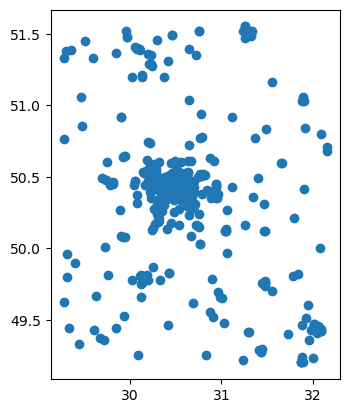

In [207]:
crs={'init':'epsg:4326'}
geometry4=[Point(xy) for xy in zip(first_record2["longitude"], first_record2["latitude"])]
geodata4=gpd.GeoDataFrame(first_record2,crs=crs, geometry=geometry4)
geodata4.plot()

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

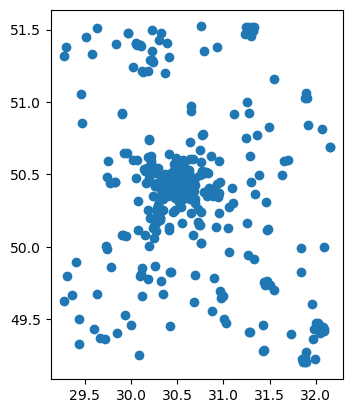

In [208]:
#plotting the median value location of nodes created by each usercrs={'init':'epsg:4326'}
geometry5=[Point(xy) for xy in zip(median_loc2["longitude"], median_loc2["latitude"])]
geodata5=gpd.GeoDataFrame(median_loc2,crs=crs, geometry=geometry5)
geodata5.plot()

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

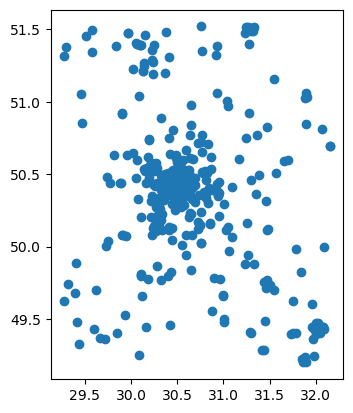

In [209]:
#plotting the mean value of locations

crs={'init':'epsg:4326'}
geometry6=[Point(xy) for xy in zip(mean_loc2["longitude"], mean_loc2["latitude"])]
geodata6=gpd.GeoDataFrame(mean_loc2,crs=crs, geometry=geometry6)
geodata6.plot()

Text(0.5, 0.98, 'kyiv mapping pattern')

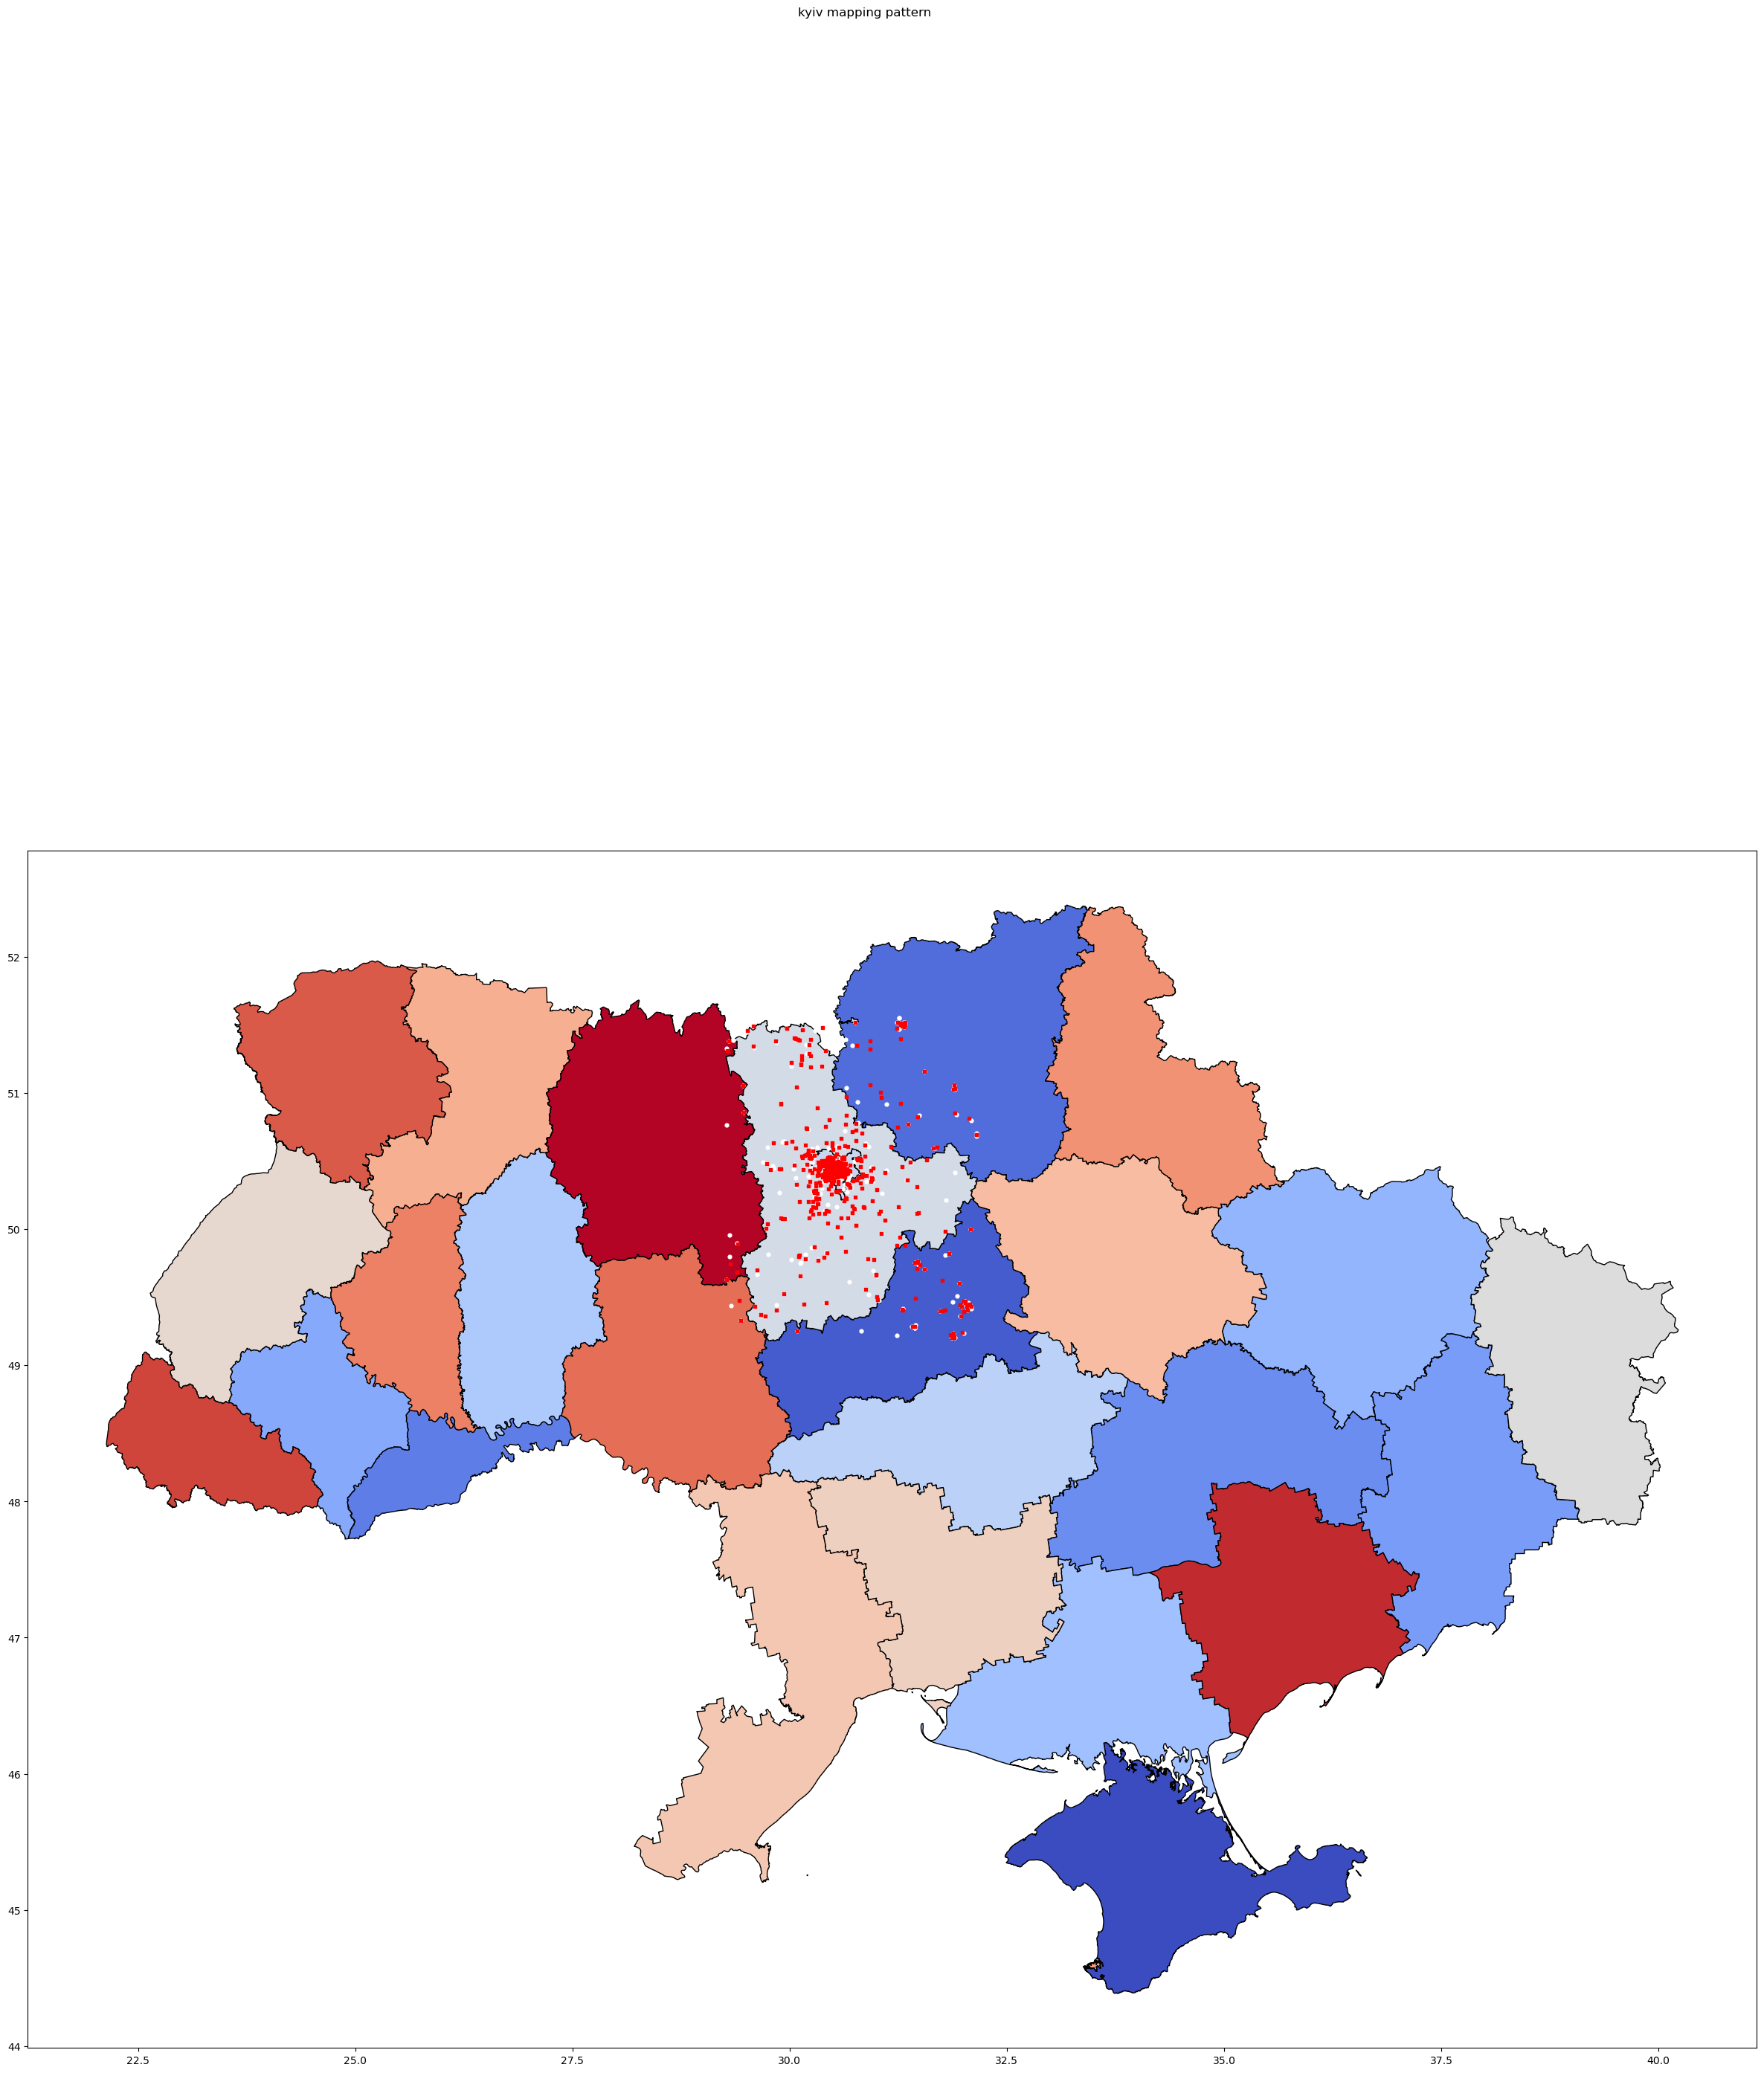

In [210]:
#creating plot with Ukraine's map to understand mapping pattern of the contributors

fig,ax = plt.subplots(figsize=(30, 40))


color = 'blue'

cmapblue = LinearSegmentedColormap.from_list('custom_cmap', [(0, color), (1, color)], N=256)
shapefile.plot(facecolor='white', edgecolor='k',alpha=1,linewidth=1,cmap='coolwarm',ax=ax)


g=geodata4.plot(ax=ax,color='white', marker='o',markersize=12,legend=True);
g=geodata6.plot(ax=ax,color='red',marker='s',markersize=12,legend=True);

fig.suptitle('kyiv mapping pattern', fontsize=12)



### *Analysing dispersion of mapping using Statistical measure*

In [211]:
db27=kyiv6.loc[:,['uid','latitude','longitude']]
db27.head()

uid   latitude  longitude
0  11459624  50.418986  30.437151
1  11425841  49.936620  31.416376
2    345544  50.527111  30.618546
3   3023916  49.637283  31.393785
4   1538111  49.460965  31.320250

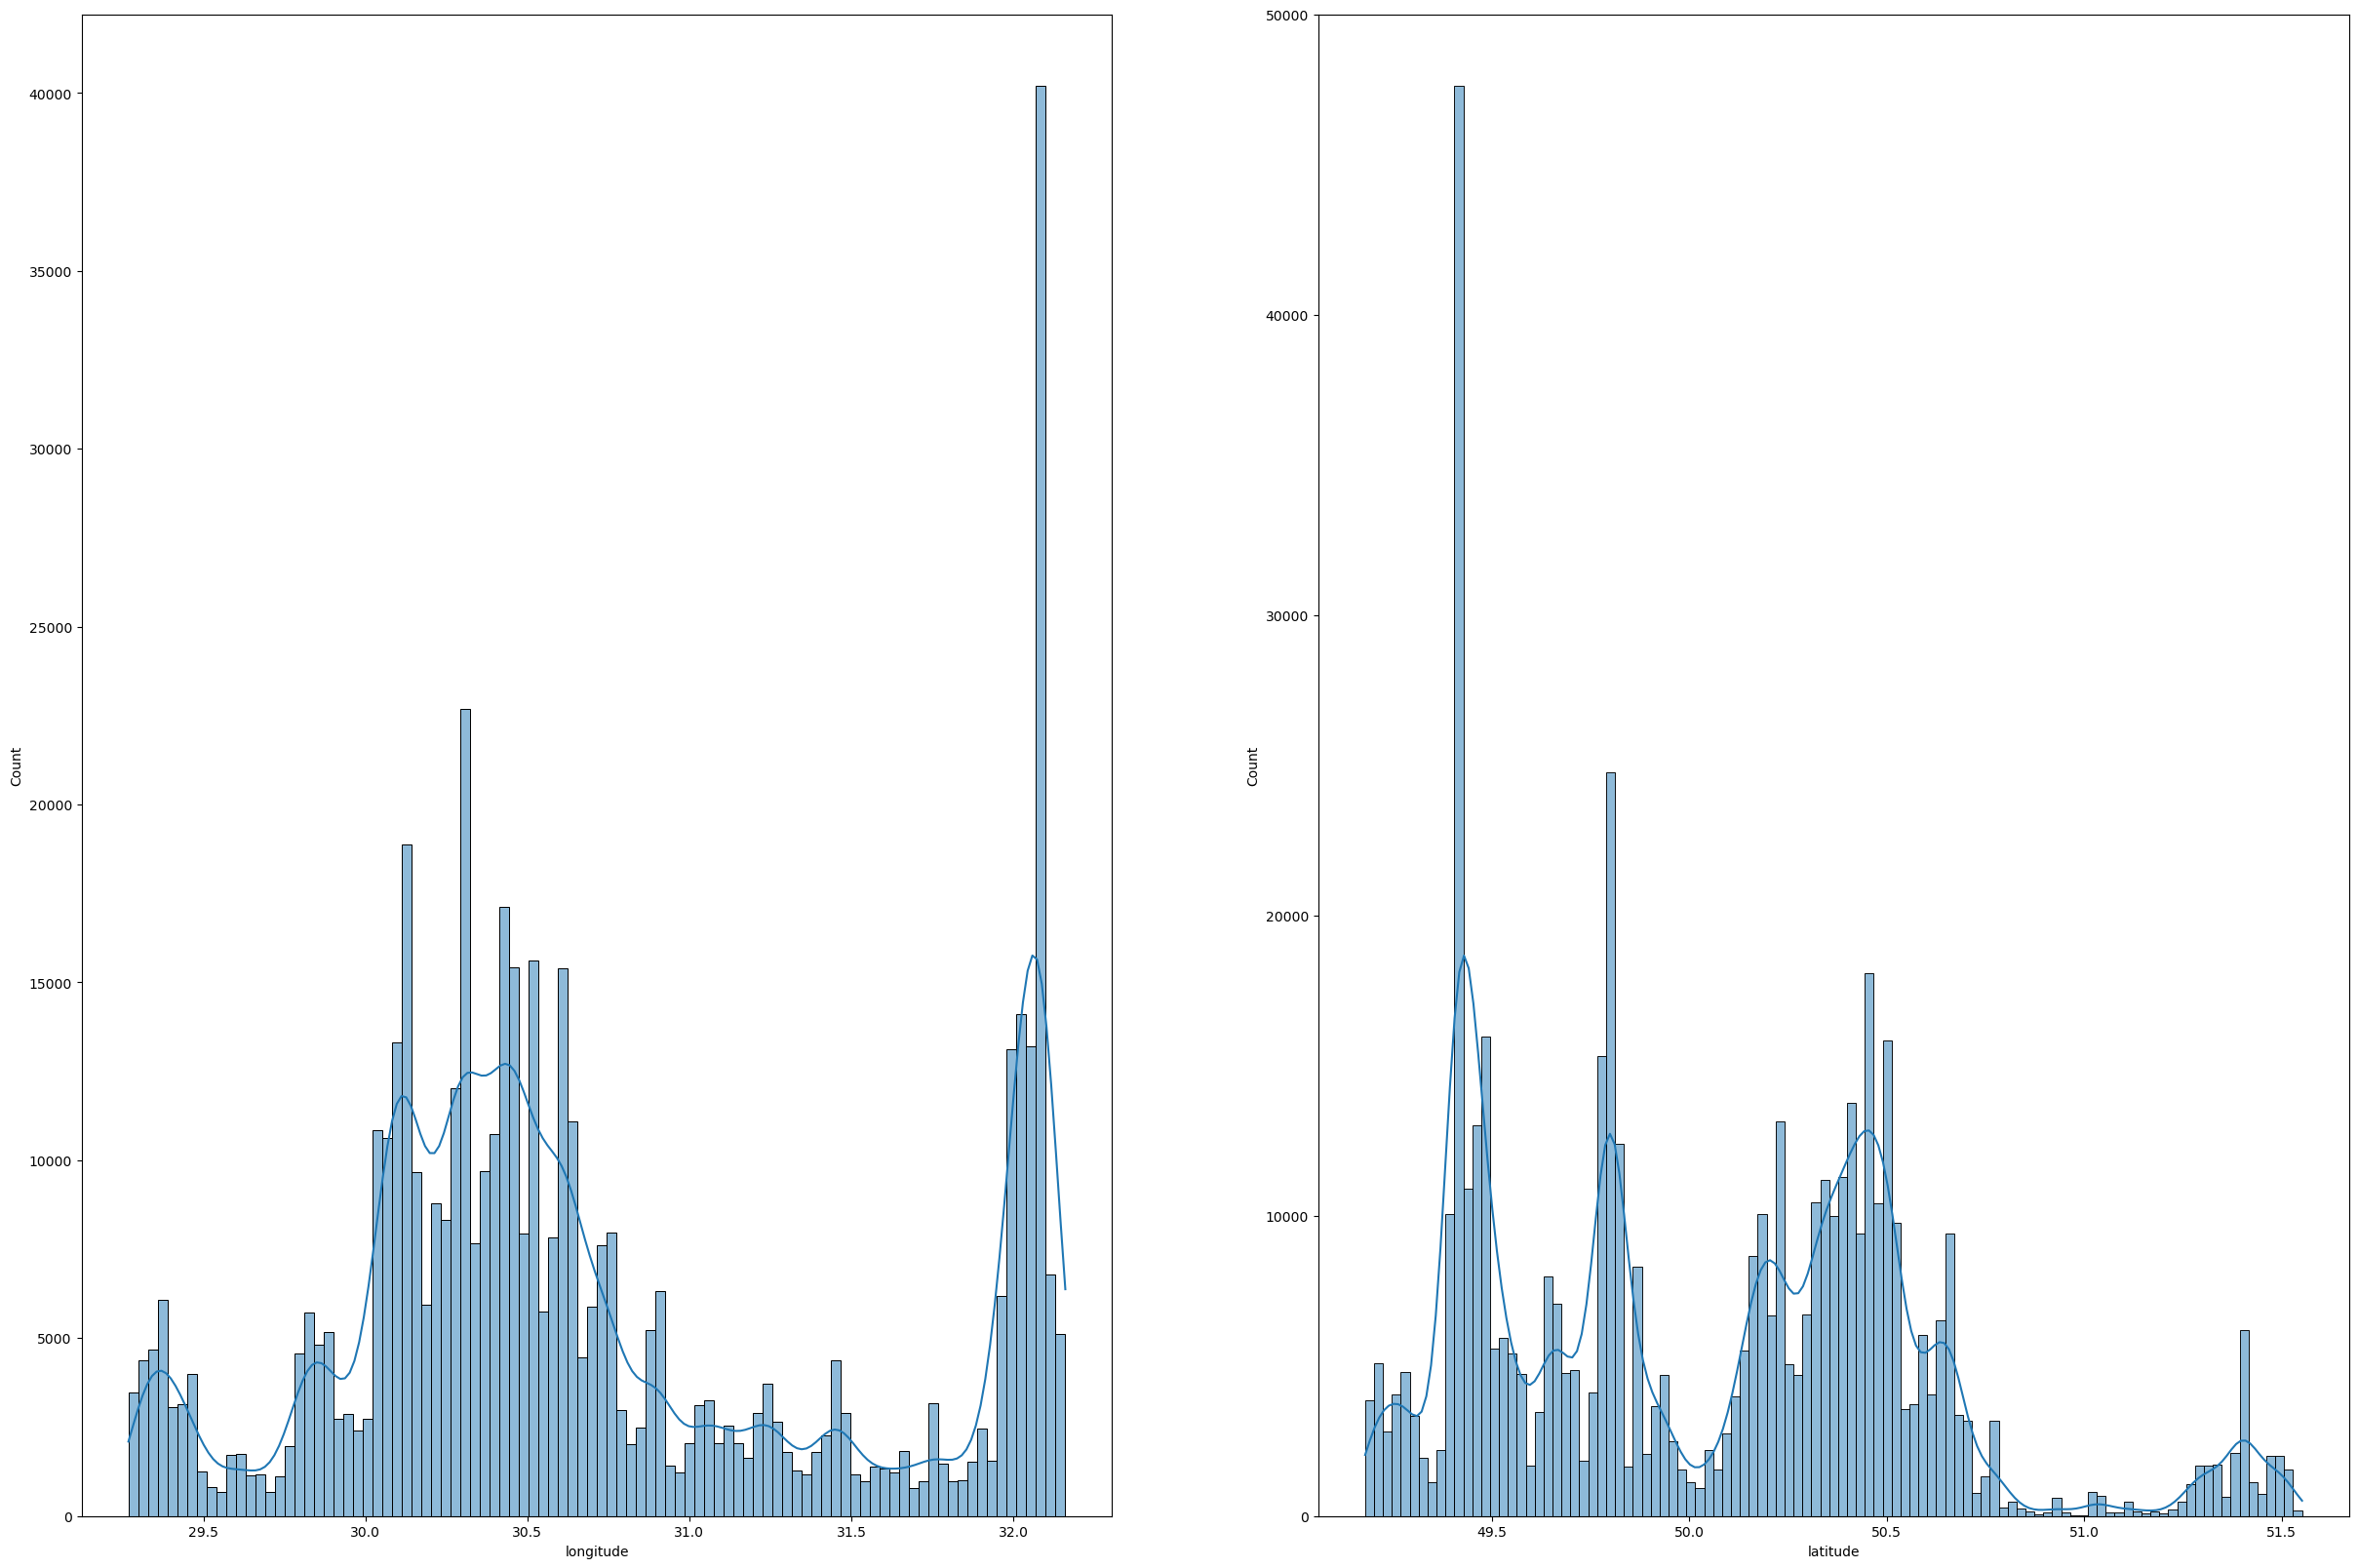

In [212]:
# frequency distribution of latitude and longitude measures

fig,axes= plt.subplots(1,2,figsize=(30, 20))

axes = axes.flatten()

s=sb.histplot(data=db27, x='longitude',bins='auto',kde=True,ax=axes[0])
s=sb.histplot(data=db27, x='latitude',bins='auto',kde=True,ax=axes[1])

In [213]:
#calculating standard deviation of complete dataset 

p_std_lat2=st.pstdev(db27['latitude'])
p_std_lon2=st.pstdev(db27['longitude'])
print('Population std for latitude: ',p_std_lat2)
print('Population std for longitude: ',p_std_lon2)

Population std for latitude:  0.535974333462139
Population std for longitude:  0.8103020506495925


In [214]:
#calculation foe mean value

p_mean_lat2=db27['latitude'].mean()
p_mean_lon2=db27['longitude'].mean()

print('Population mean for latitude: ',p_mean_lat2)
print('Population mean for latitude: ',p_mean_lon2)

Population mean for latitude:  50.038122772204645
Population mean for latitude:  30.733760382612676


In [215]:
#calculation for Coefficient of variance to understand the variability in mapping

cv_lat2=(p_std_lat2/p_mean_lat2)*100
cv_lon2=(p_std_lon2/p_mean_lon2)*100
print('CV for latitude: ',cv_lat2)
print('CV for longitude: ',cv_lon2)

CV for latitude:  1.07113197651744
CV for longitude:  2.636521013250344


In [216]:
#calculating std for each contributor group

db28=db27.groupby('uid').agg('std',numeric_only='True')
db28=db28.reset_index()#
db28

uid  latitude  longitude
0        5359  0.028214   0.093587
1        6389  0.207911   0.382580
2       11238  0.336545   0.424134
3       12054  0.078779   0.130250
4       27454  0.002977   0.003450
..        ...       ...        ...
509  16843498  0.000513   0.000456
510  16846372  0.672608   0.862271
511  16857313  0.002717   0.005467
512  16870063  0.002020   0.001617
513  16938152       NaN        NaN

[514 rows x 3 columns]

In [217]:
db29=db28.merge(mean_loc2,on='uid',how='left')
db29= db29.rename(columns={'latitude_x': 'latitude'})
db29= db29.rename(columns={'longitude_x': 'longitude'})
db29= db29.rename(columns={'latitude_y': 'mean_lat'})
db29= db29.rename(columns={'longitude_y': 'mean_long'})
db29

uid  latitude  longitude   mean_lat  mean_long
0        5359  0.028214   0.093587  50.468795  30.502204
1        6389  0.207911   0.382580  50.371113  30.510480
2       11238  0.336545   0.424134  50.156371  30.854348
3       12054  0.078779   0.130250  50.225177  30.653697
4       27454  0.002977   0.003450  50.518197  30.769392
..        ...       ...        ...        ...        ...
509  16843498  0.000513   0.000456  50.412008  30.627868
510  16846372  0.672608   0.862271  49.939906  31.268790
511  16857313  0.002717   0.005467  50.773108  30.767409
512  16870063  0.002020   0.001617  50.507007  30.777663
513  16938152       NaN        NaN  50.530695  30.630225

[514 rows x 5 columns]

In [218]:
#calculation for CV applied to each group

db29['CV_lat']=(db29['latitude']/db29['mean_lat']*100)
db29['CV_lon']=(db29['longitude']/db29['mean_long'])*100
db29

uid  latitude  longitude   mean_lat  mean_long    CV_lat    CV_lon
0        5359  0.028214   0.093587  50.468795  30.502204  0.055903  0.306822
1        6389  0.207911   0.382580  50.371113  30.510480  0.412758  1.253931
2       11238  0.336545   0.424134  50.156371  30.854348  0.670992  1.374634
3       12054  0.078779   0.130250  50.225177  30.653697  0.156851  0.424909
4       27454  0.002977   0.003450  50.518197  30.769392  0.005894  0.011213
..        ...       ...        ...        ...        ...       ...       ...
509  16843498  0.000513   0.000456  50.412008  30.627868  0.001017  0.001490
510  16846372  0.672608   0.862271  49.939906  31.268790  1.346835  2.757610
511  16857313  0.002717   0.005467  50.773108  30.767409  0.005352  0.017768
512  16870063  0.002020   0.001617  50.507007  30.777663  0.004000  0.005255
513  16938152       NaN        NaN  50.530695  30.630225       NaN       NaN

[514 rows x 7 columns]

In [219]:
db29.sort_values('CV_lon',ascending=True)

uid  latitude  longitude   mean_lat  mean_long  CV_lat  CV_lon
469  16335840       0.0        0.0  50.469966  30.514545     0.0     0.0
296  10080656       0.0        0.0  50.472036  30.696498     0.0     0.0
273   8796736       0.0        0.0  50.520099  30.243754     0.0     0.0
412  15398501       0.0        0.0  49.329591  29.438138     0.0     0.0
177   3281808       0.0        0.0  50.442857  30.495434     0.0     0.0
..        ...       ...        ...        ...        ...     ...     ...
495  16650646       NaN        NaN  50.122734  31.482034     NaN     NaN
496  16657435       NaN        NaN  50.406065  30.502760     NaN     NaN
499  16703675       NaN        NaN  50.456059  30.504583     NaN     NaN
504  16813303       NaN        NaN  50.388756  30.462985     NaN     NaN
513  16938152       NaN        NaN  50.530695  30.630225     NaN     NaN

[514 rows x 7 columns]

In [220]:

df_ts1= kyiv1.loc[:,['date','id']]
df_ts1=df_ts1.groupby('date').count()
df_ts1=df_ts1.reset_index()
df_ts1['date']=pd.to_datetime(df_ts1['date'])
df_ts1 = df_ts1.set_index('date')

In [221]:
df_ts2= kyiv4.loc[:,['date','id']]
df_ts2=df_ts2.groupby('date').count()
df_ts2=df_ts2.reset_index()
df_ts2['date']=pd.to_datetime(df_ts2['date'])
df_ts2 = df_ts2.set_index('date')

In [222]:
df_ts=df_ts1.append(df_ts2)
df_ts

C:\Users\Shruti\AppData\Local\Temp\ipykernel_8576\1232277424.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ts=df_ts1.append(df_ts2)


id
date            
2021-08-24  2554
2021-08-25  1214
2021-08-26  1472
2021-08-27  1222
2021-08-28  3532
...          ...
2022-08-21  3360
2022-08-22  3815
2022-08-23  2188
2022-08-24  1456
2022-08-25  2963

[367 rows x 1 columns]

In [223]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Additive Decomposition
add_result = seasonal_decompose(df_ts, model='additive', period=30)


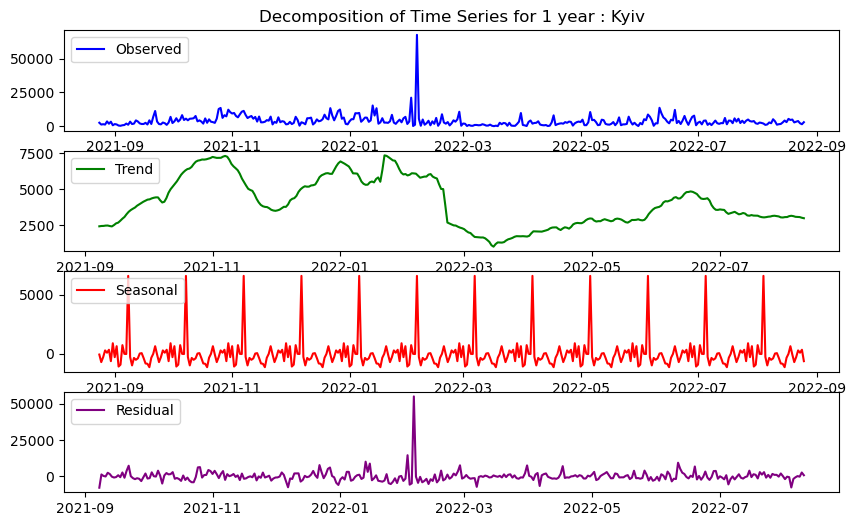

In [224]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 6))
axes[0].set_title('Decomposition of Time Series for 1 year : Kyiv')
axes[0].plot(df_ts.index, add_result.observed, label='Observed', color='blue')
axes[1].plot(df_ts.index, add_result.trend, label='Trend', color='green')
axes[2].plot(df_ts.index, add_result.seasonal, label='Seasonal', color='red')
axes[3].plot(df_ts.index, add_result.resid, label='Residual', color='purple')
axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')
axes[2].legend(loc='upper left')
axes[3].legend(loc='upper left')

In [225]:
week1 = seasonal_decompose(df6, model='additive',period=2)
week2 = seasonal_decompose(db6, model='additive',period=2)

In [226]:
month1 = seasonal_decompose(df7, model='additive',period=7)
month2 = seasonal_decompose(db7, model='additive',period=7)

In [227]:
sixmonth1 = seasonal_decompose(df_ts1, model='additive',period=7)
sixmonth2 = seasonal_decompose(df_ts2, model='additive',period=7)


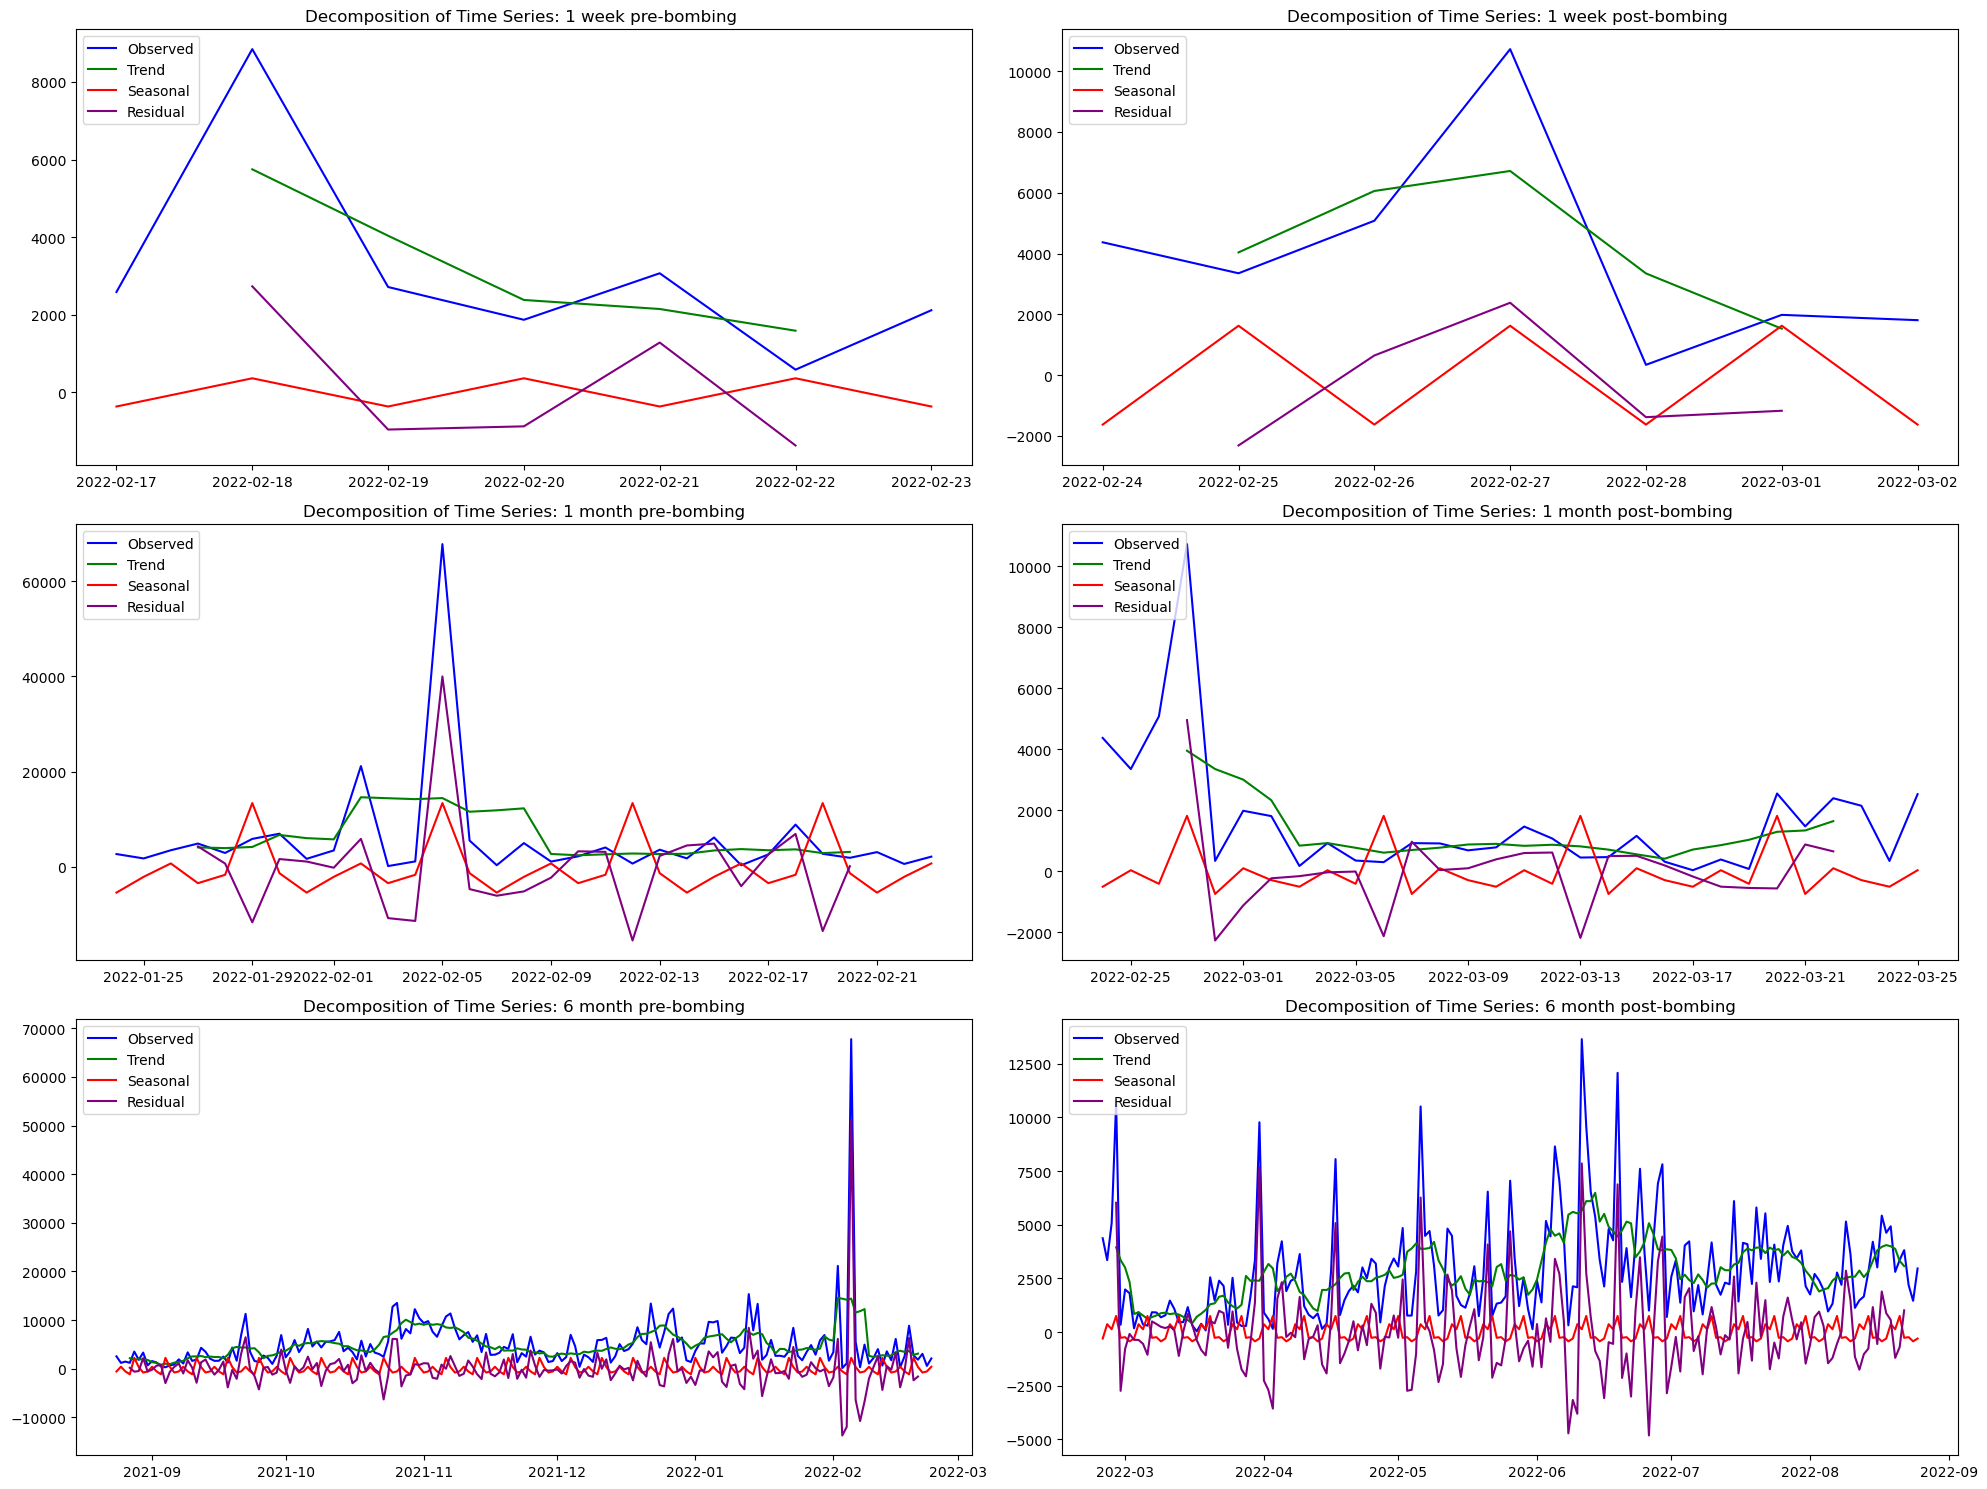

In [228]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

axes[0,0].set_title('Decomposition of Time Series: 1 week pre-bombing ')
axes[0,0].plot(df6.index, week1.observed, label='Observed', color='blue')
axes[0,0].plot(df6.index, week1.trend, label='Trend', color='green')
axes[0,0].plot(df6.index, week1.seasonal, label='Seasonal', color='red')
axes[0,0].plot(df6.index, week1.resid, label='Residual', color='purple')
axes[0,0].legend(loc='upper left')
axes[0,1].set_title('Decomposition of Time Series: 1 week post-bombing ')
axes[0,1].plot(db6.index, week2.observed, label='Observed', color='blue')
axes[0,1].plot(db6.index, week2.trend, label='Trend', color='green')
axes[0,1].plot(db6.index, week2.seasonal, label='Seasonal', color='red')
axes[0,1].plot(db6.index, week2.resid, label='Residual', color='purple')
axes[0,1].legend(loc='upper left')

axes[1,0].set_title('Decomposition of Time Series: 1 month pre-bombing')
axes[1,0].plot(df7.index, month1.observed, label='Observed', color='blue')
axes[1,0].plot(df7.index, month1.trend, label='Trend', color='green')
axes[1,0].plot(df7.index, month1.seasonal, label='Seasonal', color='red')
axes[1,0].plot(df7.index, month1.resid, label='Residual', color='purple')
axes[1,0].legend(loc='upper left')
axes[1,1].set_title('Decomposition of Time Series: 1 month post-bombing ')
axes[1,1].plot(db7.index, month2.observed, label='Observed', color='blue')
axes[1,1].plot(db7.index, month2.trend, label='Trend', color='green')
axes[1,1].plot(db7.index, month2.seasonal, label='Seasonal', color='red')
axes[1,1].plot(db7.index, month2.resid, label='Residual', color='purple')
axes[1,1].legend(loc='upper left')


axes[2,0].set_title('Decomposition of Time Series: 6 month pre-bombing')
axes[2,0].plot(df_ts1.index, sixmonth1.observed, label='Observed', color='blue')
axes[2,0].plot(df_ts1.index, sixmonth1.trend, label='Trend', color='green')
axes[2,0].plot(df_ts1.index, sixmonth1.seasonal, label='Seasonal', color='red')
axes[2,0].plot(df_ts1.index, sixmonth1.resid, label='Residual', color='purple')
axes[2,0].legend(loc='upper left')
axes[2,1].set_title('Decomposition of Time Series: 6 month post-bombing')
axes[2,1].plot(df_ts2.index, sixmonth2.observed, label='Observed', color='blue')
axes[2,1].plot(df_ts2.index, sixmonth2.trend, label='Trend', color='green')
axes[2,1].plot(df_ts2.index, sixmonth2.seasonal, label='Seasonal', color='red')
axes[2,1].plot(df_ts2.index, sixmonth2.resid, label='Residual', color='purple')
axes[2,1].legend(loc='upper left')

plt.tight_layout()